finds the ideal clustering count

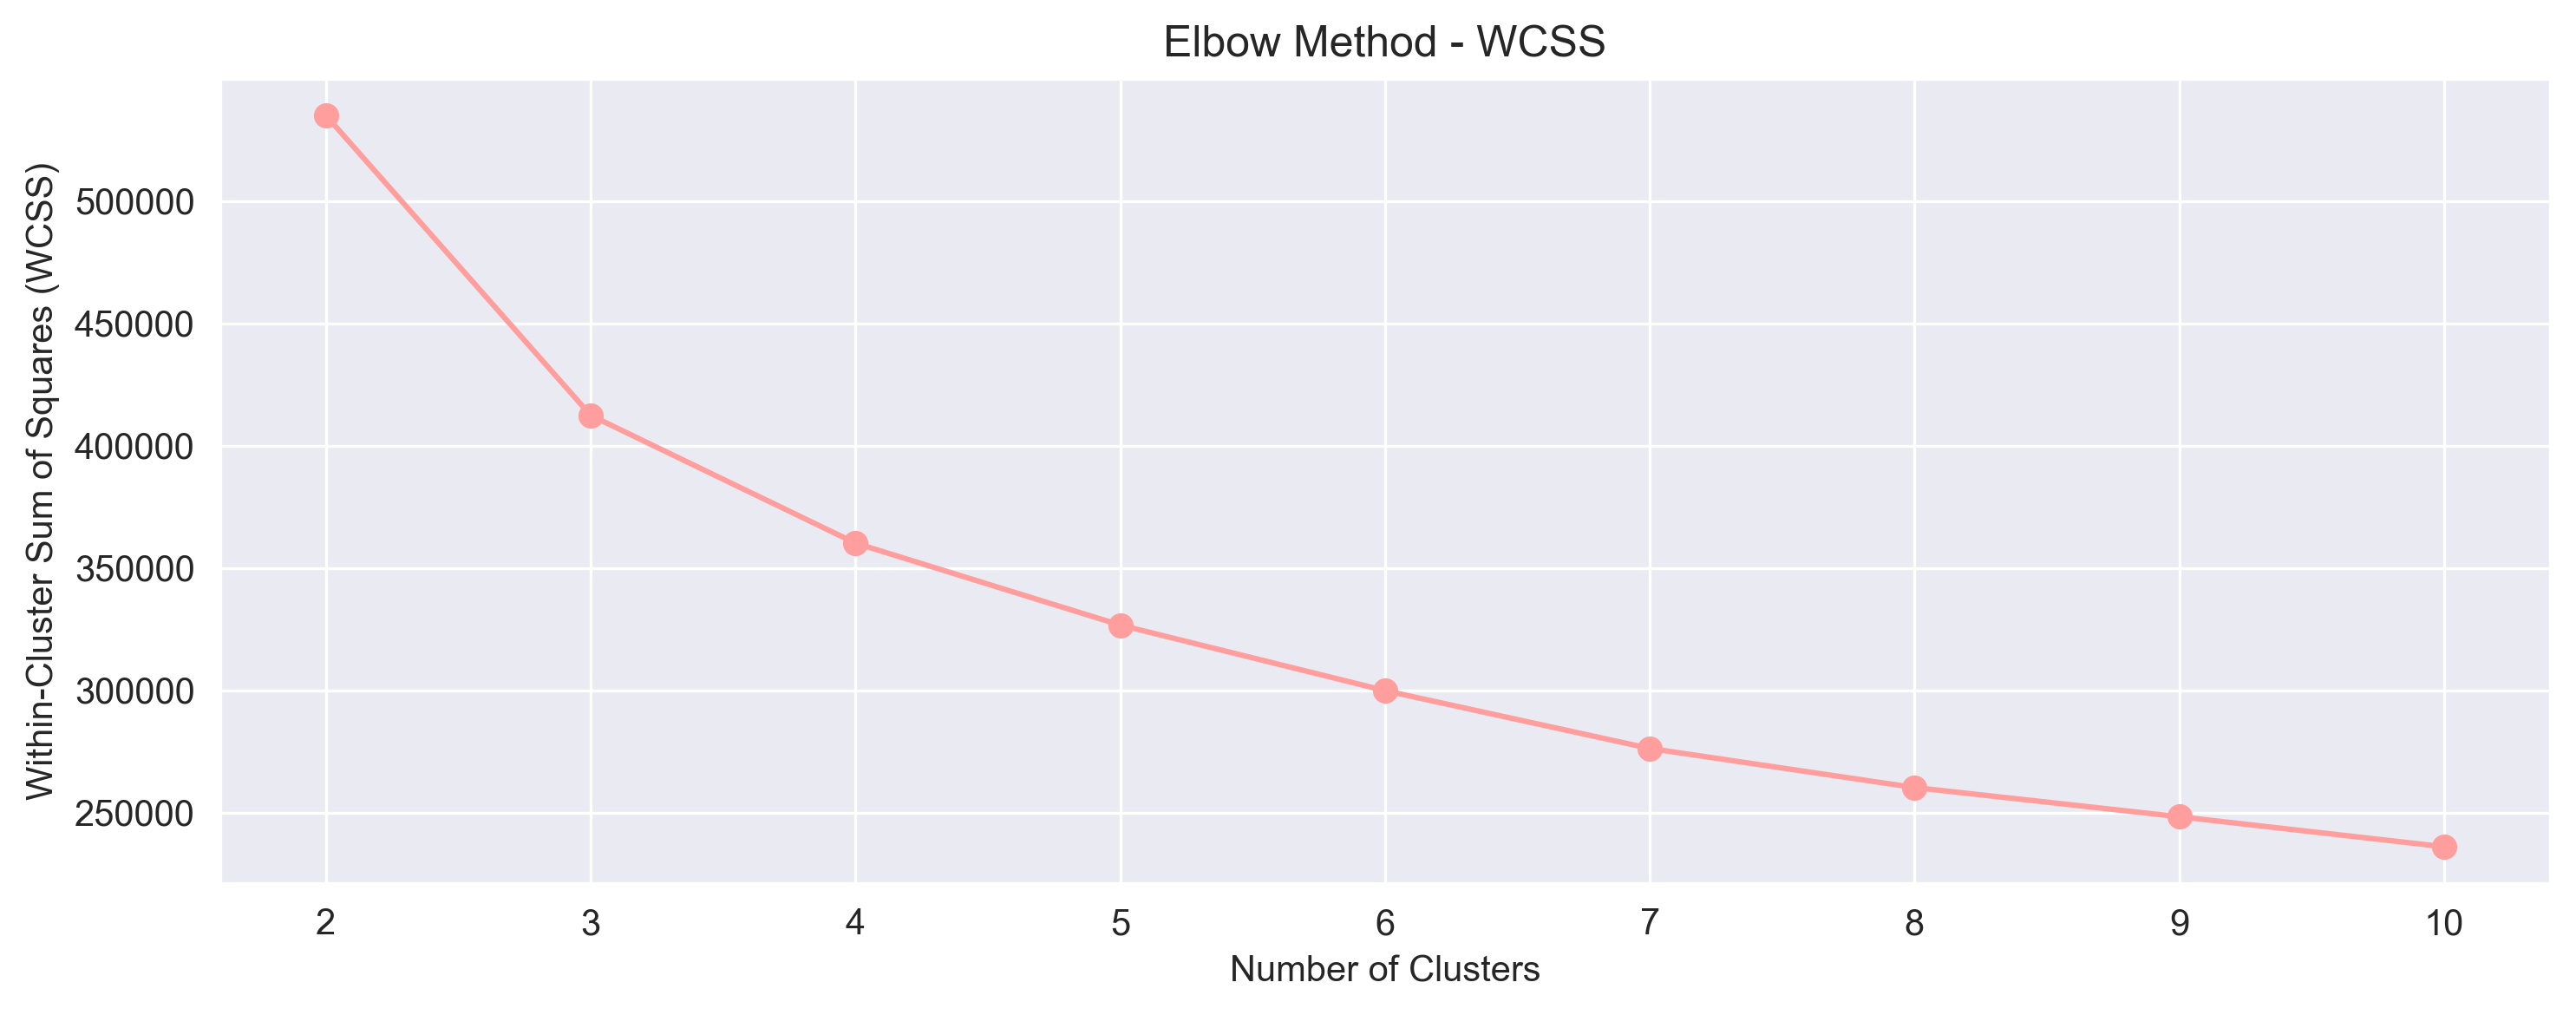

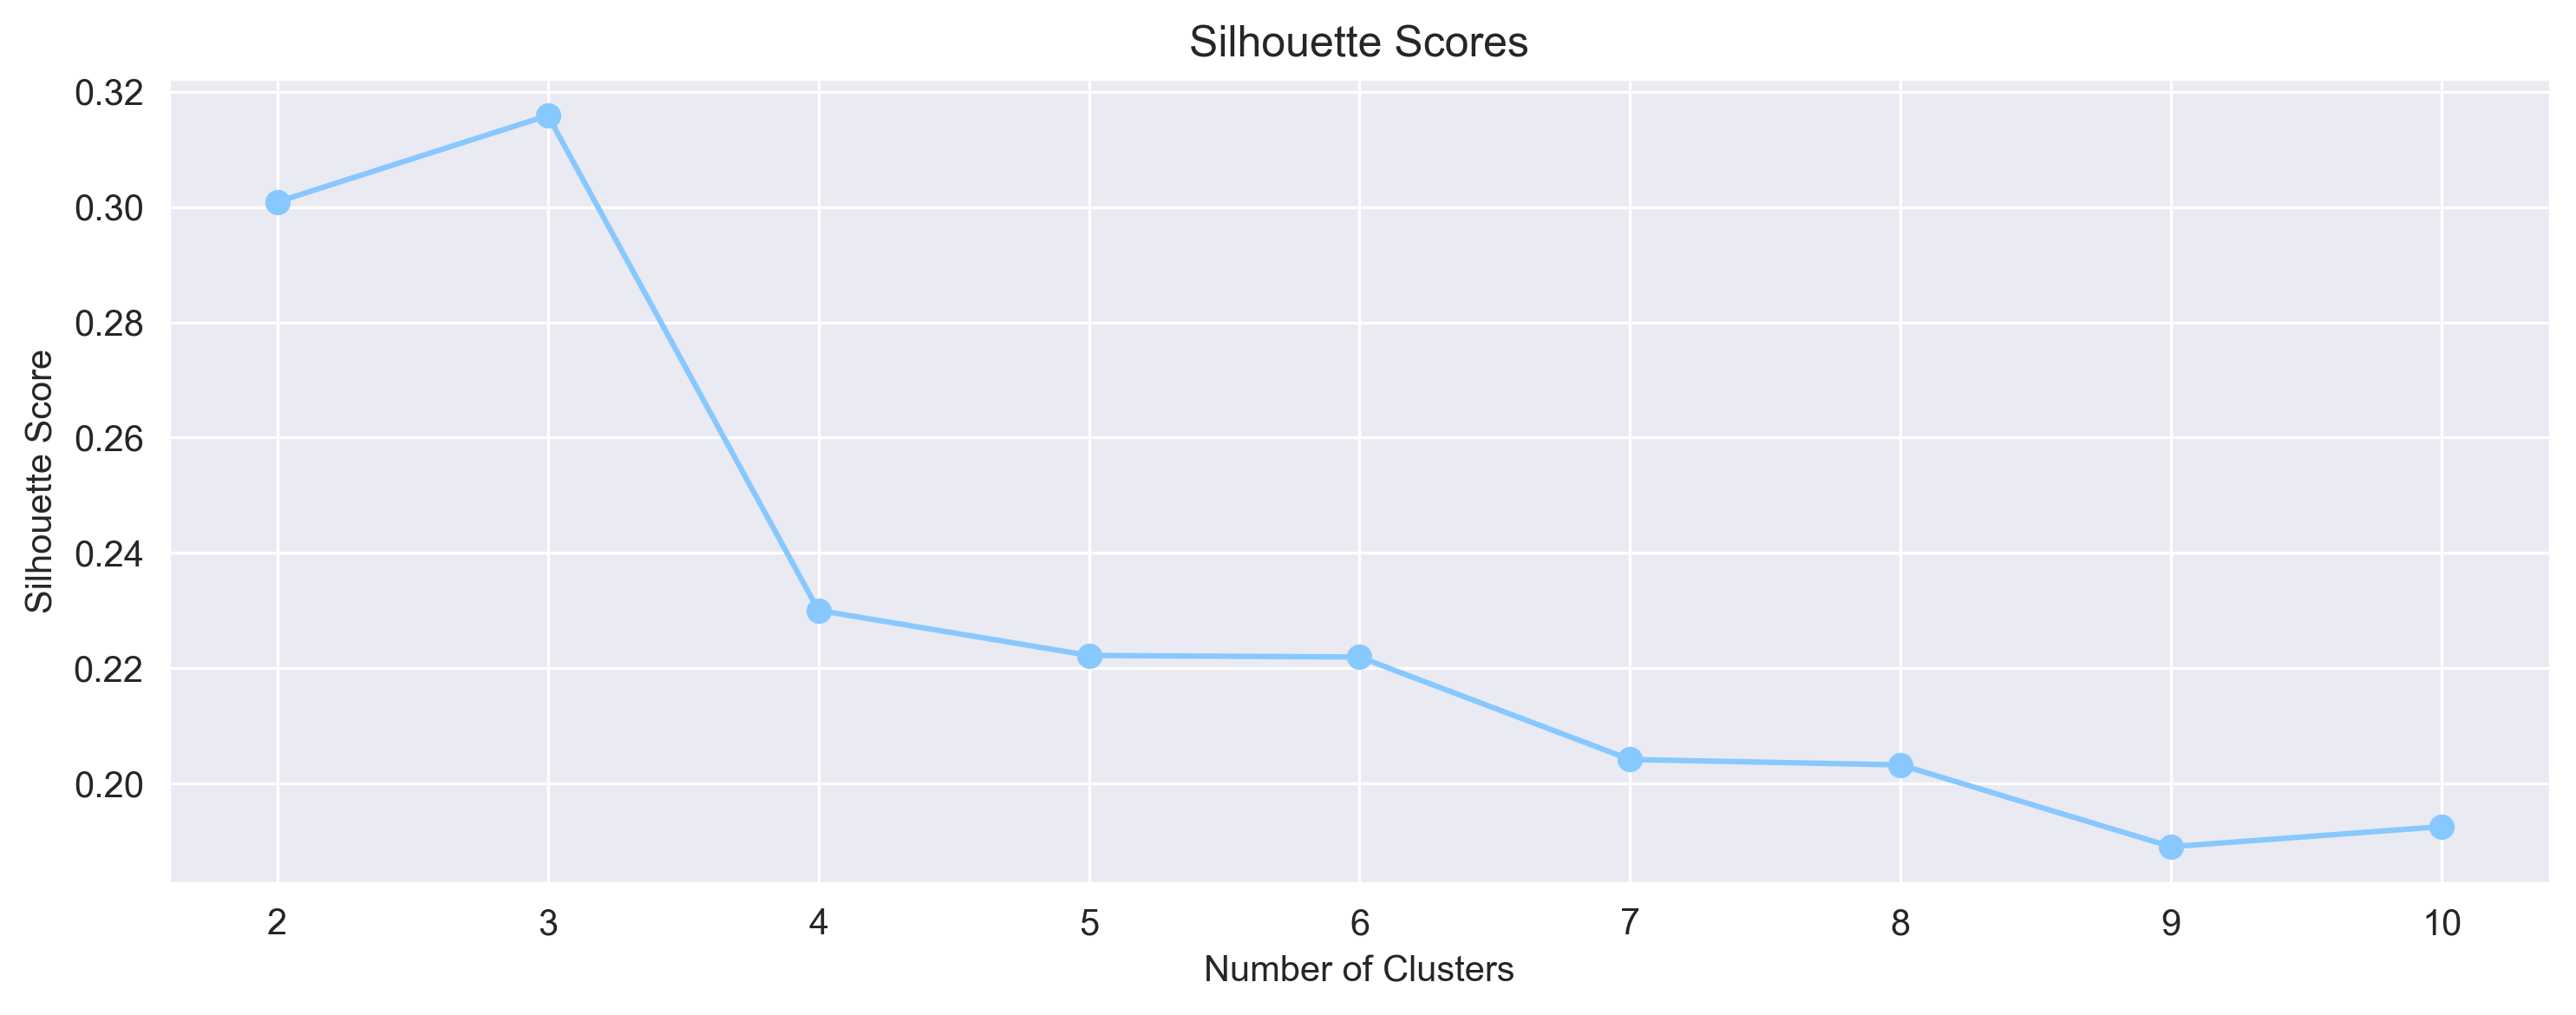

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load PCA-reduced dataset (v21)
df_pca = pd.read_csv("../datasets/customer_shopping_data_v21.csv")

wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_pca, labels))

# Plot WCSS (Elbow)
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(K, wcss, marker='o', color='#FF9E9D')
plt.title("Elbow Method - WCSS")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.tight_layout()
plt.savefig("dataset_clustering_figures/elbow_method.png", dpi=300)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(K, sil_scores, marker='o', color='#87C8FF')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("dataset_clustering_figures/silhouette_scores.png", dpi=300)
plt.show()


creates segmented dataset

In [11]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df_pca["cluster"] = kmeans.fit_predict(df_pca)

df_pca.to_csv("../datasets/customer_shopping_data_v22.csv", index=False)


draws 2d pca projection

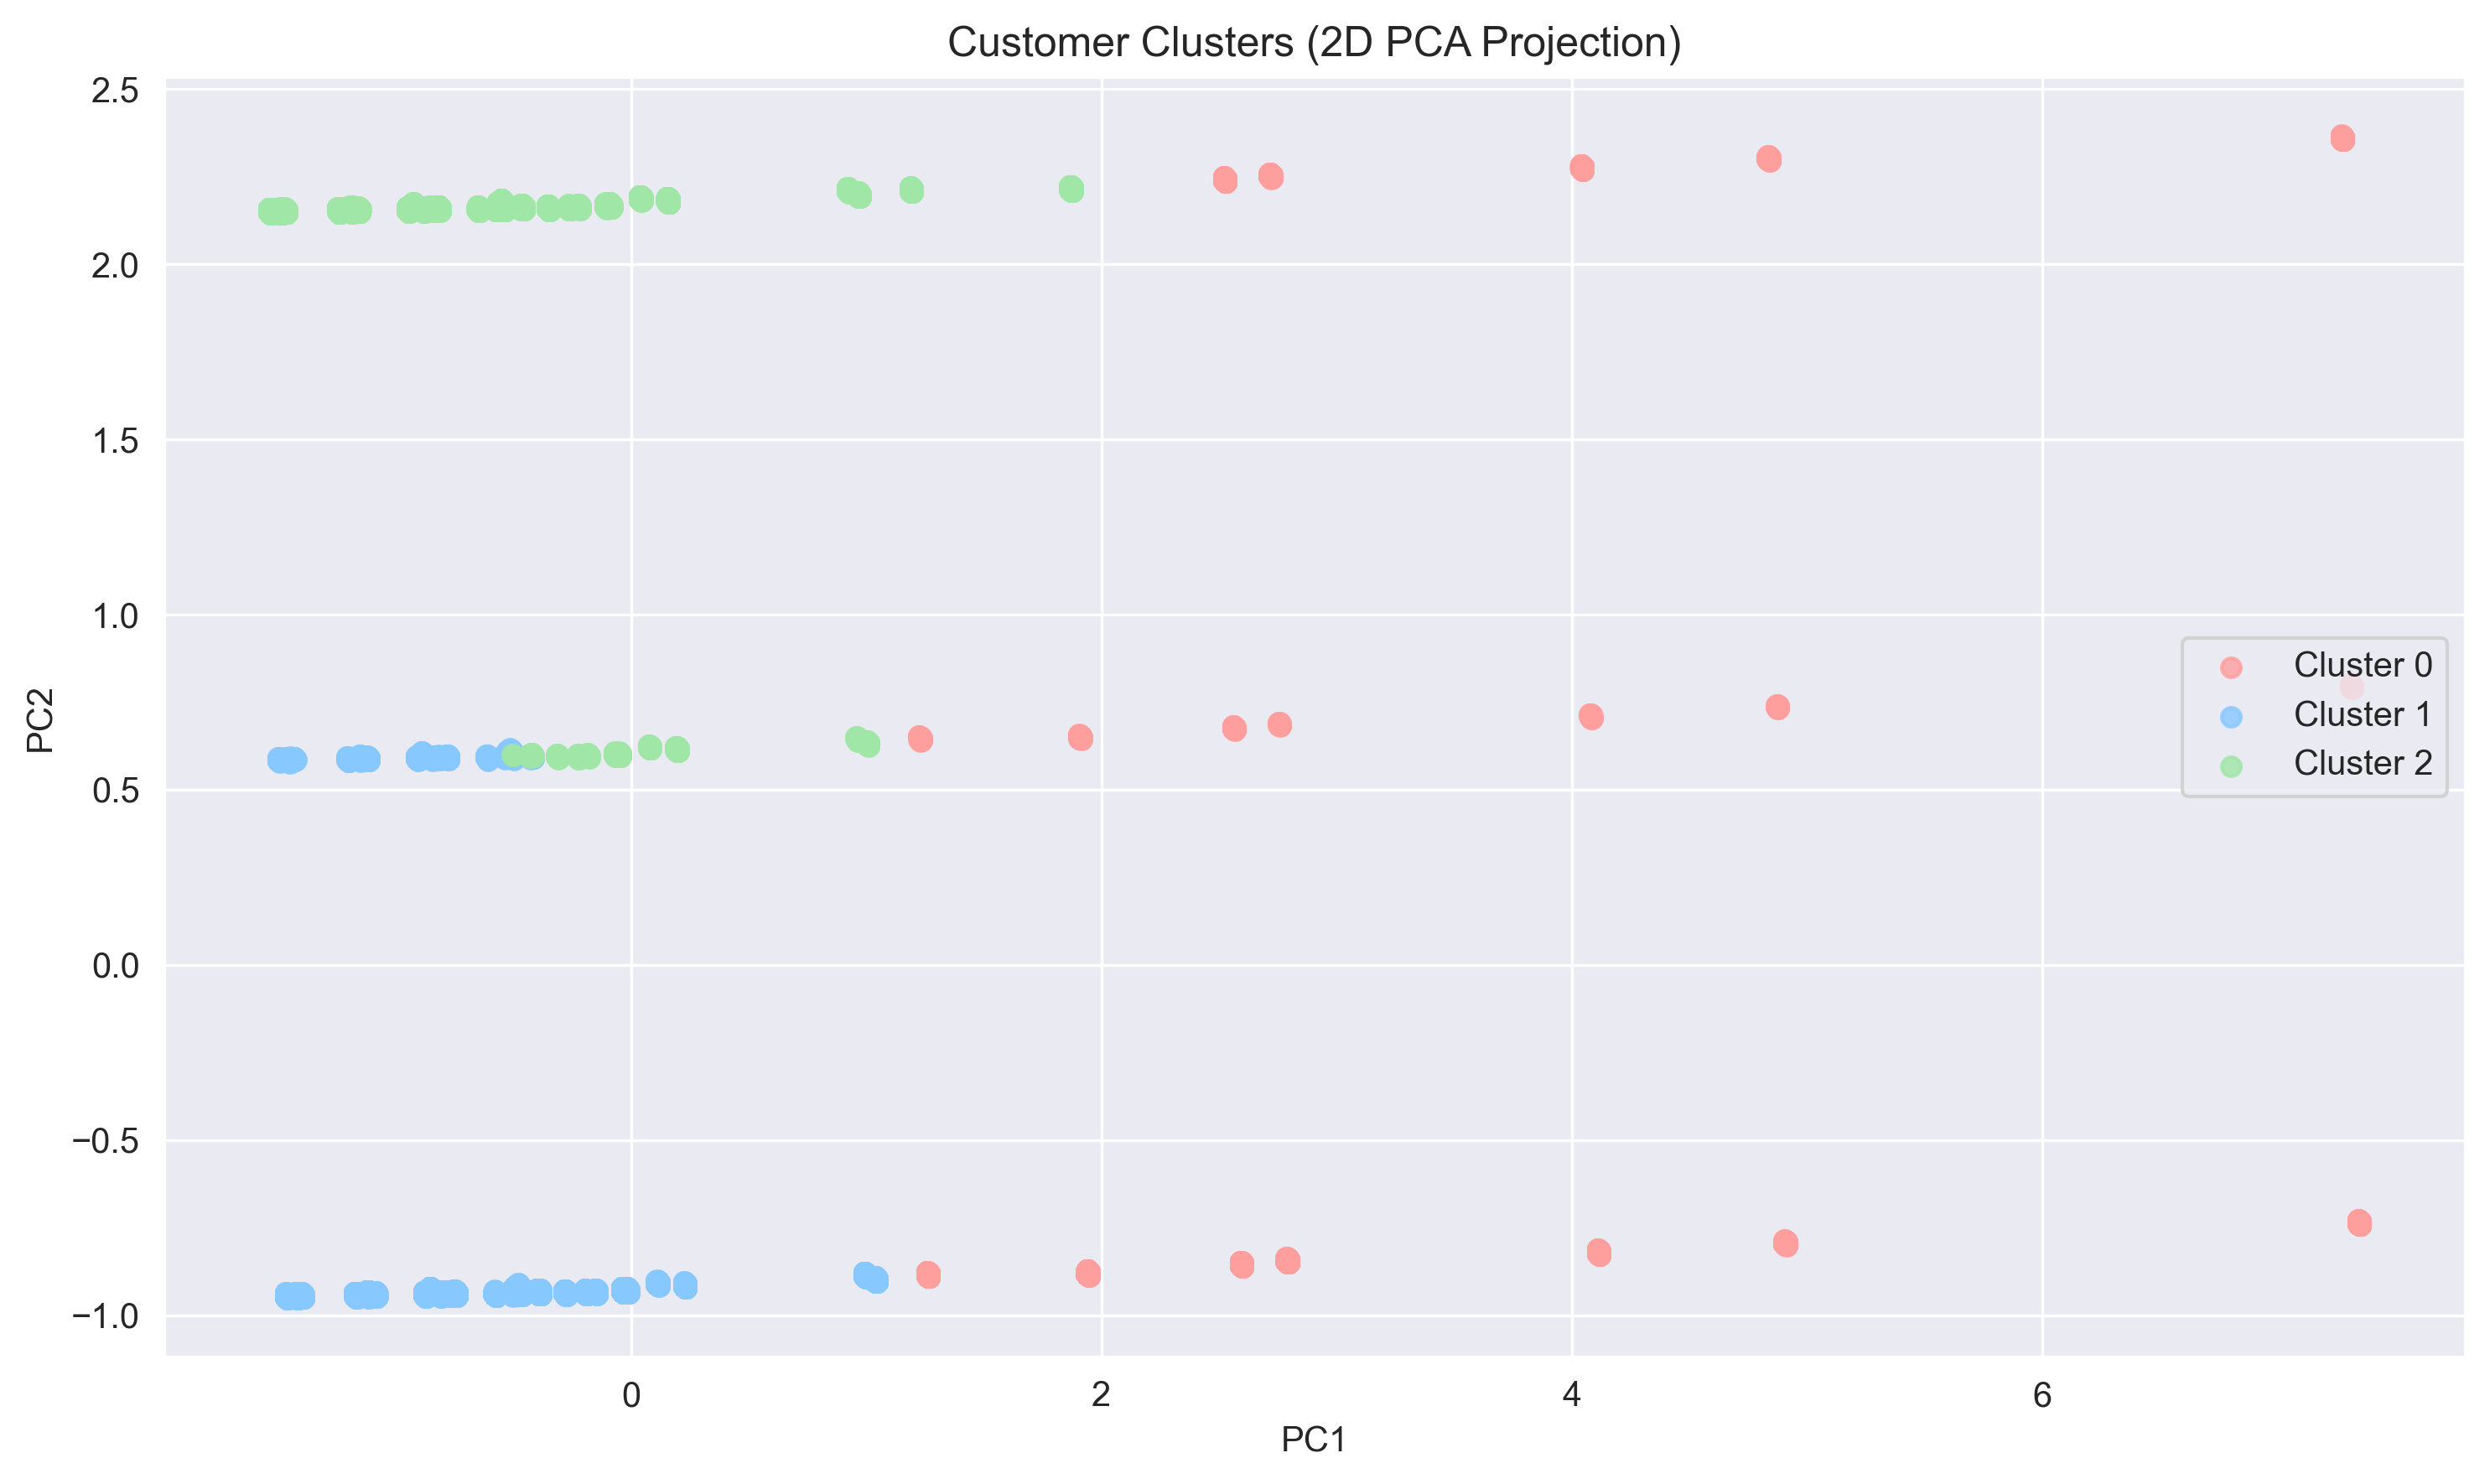

In [19]:
import matplotlib.pyplot as plt

color1 = '#FF9E9D'  # Coral Pink
color2 = '#87C8FF'  # Sky Blue
color3 = '#A0E6A6'  # Mint Green

plt.figure(figsize=(10, 6), dpi=300)
for cluster_label, color in zip([0, 1, 2], [color1, color2, color3]):
    cluster_data = df_pca[df_pca["cluster"] == cluster_label]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f"Cluster {cluster_label}", s=30, color=color, alpha=0.8)

plt.title("Customer Clusters (2D PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dataset_clustering_figures/final_clusters_pca2d.png", dpi=300)
plt.show()


cluster etiketleri orijinal dataya eklendi

In [21]:
# Load both
df_original = pd.read_csv("../datasets/customer_shopping_data_v19.csv")
df_clustered = pd.read_csv("../datasets/customer_shopping_data_v22.csv")

# Add cluster column to original
df_original["cluster"] = df_clustered["cluster"]

df_original.to_csv("../datasets/customer_shopping_data_v23.csv", index=False)


In [23]:
# STEP 8: Cluster-wise mean values with real features (v23)
df = pd.read_csv("../datasets/customer_shopping_data_v23.csv")

# Real-valued features + encoded binaries
feature_cols = [
    "age", "quantity", "total_price",
    "is_weekday", "is_holiday",
    "gender_Male",
    "payment_method_Credit Card", "payment_method_Debit Card",
    "category_Clothing", "category_Cosmetics", "category_Food & Beverage",
    "category_Shoes", "category_Souvenir", "category_Technology", "category_Toys",
    "season_Spring", "season_Summer", "season_Winter"
]

summary_real = df.groupby("cluster")[feature_cols].mean().round(2)
print("\nCluster-wise Feature Means (Real Values):\n")
print(summary_real)



Cluster-wise Feature Means (Real Values):

           age  quantity  total_price  is_weekday  is_holiday  gender_Male  \
cluster                                                                      
0        43.47      4.41     10918.51        0.85        0.18         0.41   
1        43.43      2.72      1023.30        1.00        0.02         0.40   
2        43.39      2.91      1598.39        0.03        1.00         0.40   

         payment_method_Credit Card  payment_method_Debit Card  \
cluster                                                          
0                              0.35                        0.2   
1                              0.35                        0.2   
2                              0.35                        0.2   

         category_Clothing  category_Cosmetics  category_Food & Beverage  \
cluster                                                                    
0                     0.37                0.00                      0.00   
1     

In [24]:
import pandas as pd

df = pd.read_csv("../datasets/customer_shopping_data_v23.csv")

# Count number of records per cluster
cluster_counts = df["cluster"].value_counts().sort_index()

print("Cluster Sizes:")
print(cluster_counts)


Cluster Sizes:
cluster
0    13564
1    58918
2    26975
Name: count, dtype: int64


## Cluster 0 – Lüks Tüketiciler

- **Harcama Miktarı**: Ortalama **₺10.918**, tüm segmentler içinde en yüksek  
- **Satın Alınan Ürün Sayısı**: Ortalama **4.41** ürün – yüksek hacimli alışveriş  
- **Zaman Tercihi**:  
  - %85 oranında **hafta içi** alışveriş  
  - %18 oranında **resmî tatillerde** alışveriş  
- **Kategori Tercihleri**:  
  - **Ayakkabı (%40)** ve **teknoloji (%22)** ürünlerine yüksek ilgi  
  - Kozmetik, gıda, oyuncak gibi ürünlere neredeyse hiç ilgi yok  
- **Demografi**:  
  - %59 **kadın**, %41 **erkek**  
- **Yorum**:  
  - Bu segment, **yüksek bütçeli ve planlı alışveriş yapan bireyleri** temsil eder.  
  - Muhtemelen **çalışan yetişkinler**, alışverişlerini bilinçli şekilde hafta içi gerçekleştiriyorlar.  

---

## Cluster 1 – Temel İhtiyaççılar

- **Harcama Miktarı**: Ortalama **₺1.023** – en düşük seviyede  
- **Satın Alınan Ürün Sayısı**: Ortalama **2.72** ürün  
- **Zaman Tercihi**:  
  - **%100 hafta içi**  
  - Tatillerde neredeyse hiç alışveriş yapmıyorlar  
- **Kategori Tercihleri**:  
  - **Kozmetik (%18)**, **gıda (%18)** ve **oyuncak (%12)** kategorilerinde alışveriş yapıyorlar  
  - Ayakkabı ve teknoloji neredeyse hiç tercih edilmiyor  
- **Demografi**:  
  - %60 **kadın**, %40 **erkek**  
- **Yorum**:  
  - Bu segment **düşük bütçeli ama çok çeşitli ihtiyaçlara hitap eden** bireylerden oluşur.  
  - Muhtemelen **tasarruf odaklı ve çalışan bireyler**; günlük temel ihtiyaçlarını karşılıyorlar.  

---

## Cluster 2 – Tatil Alışverişçileri

- **Harcama Miktarı**: Ortalama **₺1.598** – orta düzey  
- **Satın Alınan Ürün Sayısı**: Ortalama **2.91** ürün  
- **Zaman Tercihi**:  
  - **%100 tatil zamanı** (is_holiday = 1.00)  
  - Hafta içi alışveriş neredeyse hiç yapılmıyor  
- **Kategori Tercihleri**:  
  - **Oyuncak (%11)** ve **hediyelik eşya (%5)** kategorileri ön planda  
  - Ayakkabı ve teknoloji ürünlerine ilgi düşük  
- **Demografi**:  
  - %60 **kadın**, %40 **erkek**  
- **Yorum**:  
  - Bu segment alışveriş merkezine **özellikle özel günlerde gelen**, **hediye veya çocuk ürünü odaklı** bireyleri temsil eder.  
  - Muhtemelen turistler, şehir dışından gelenler veya sadece özel zamanlarda alışveriş yapanlar.


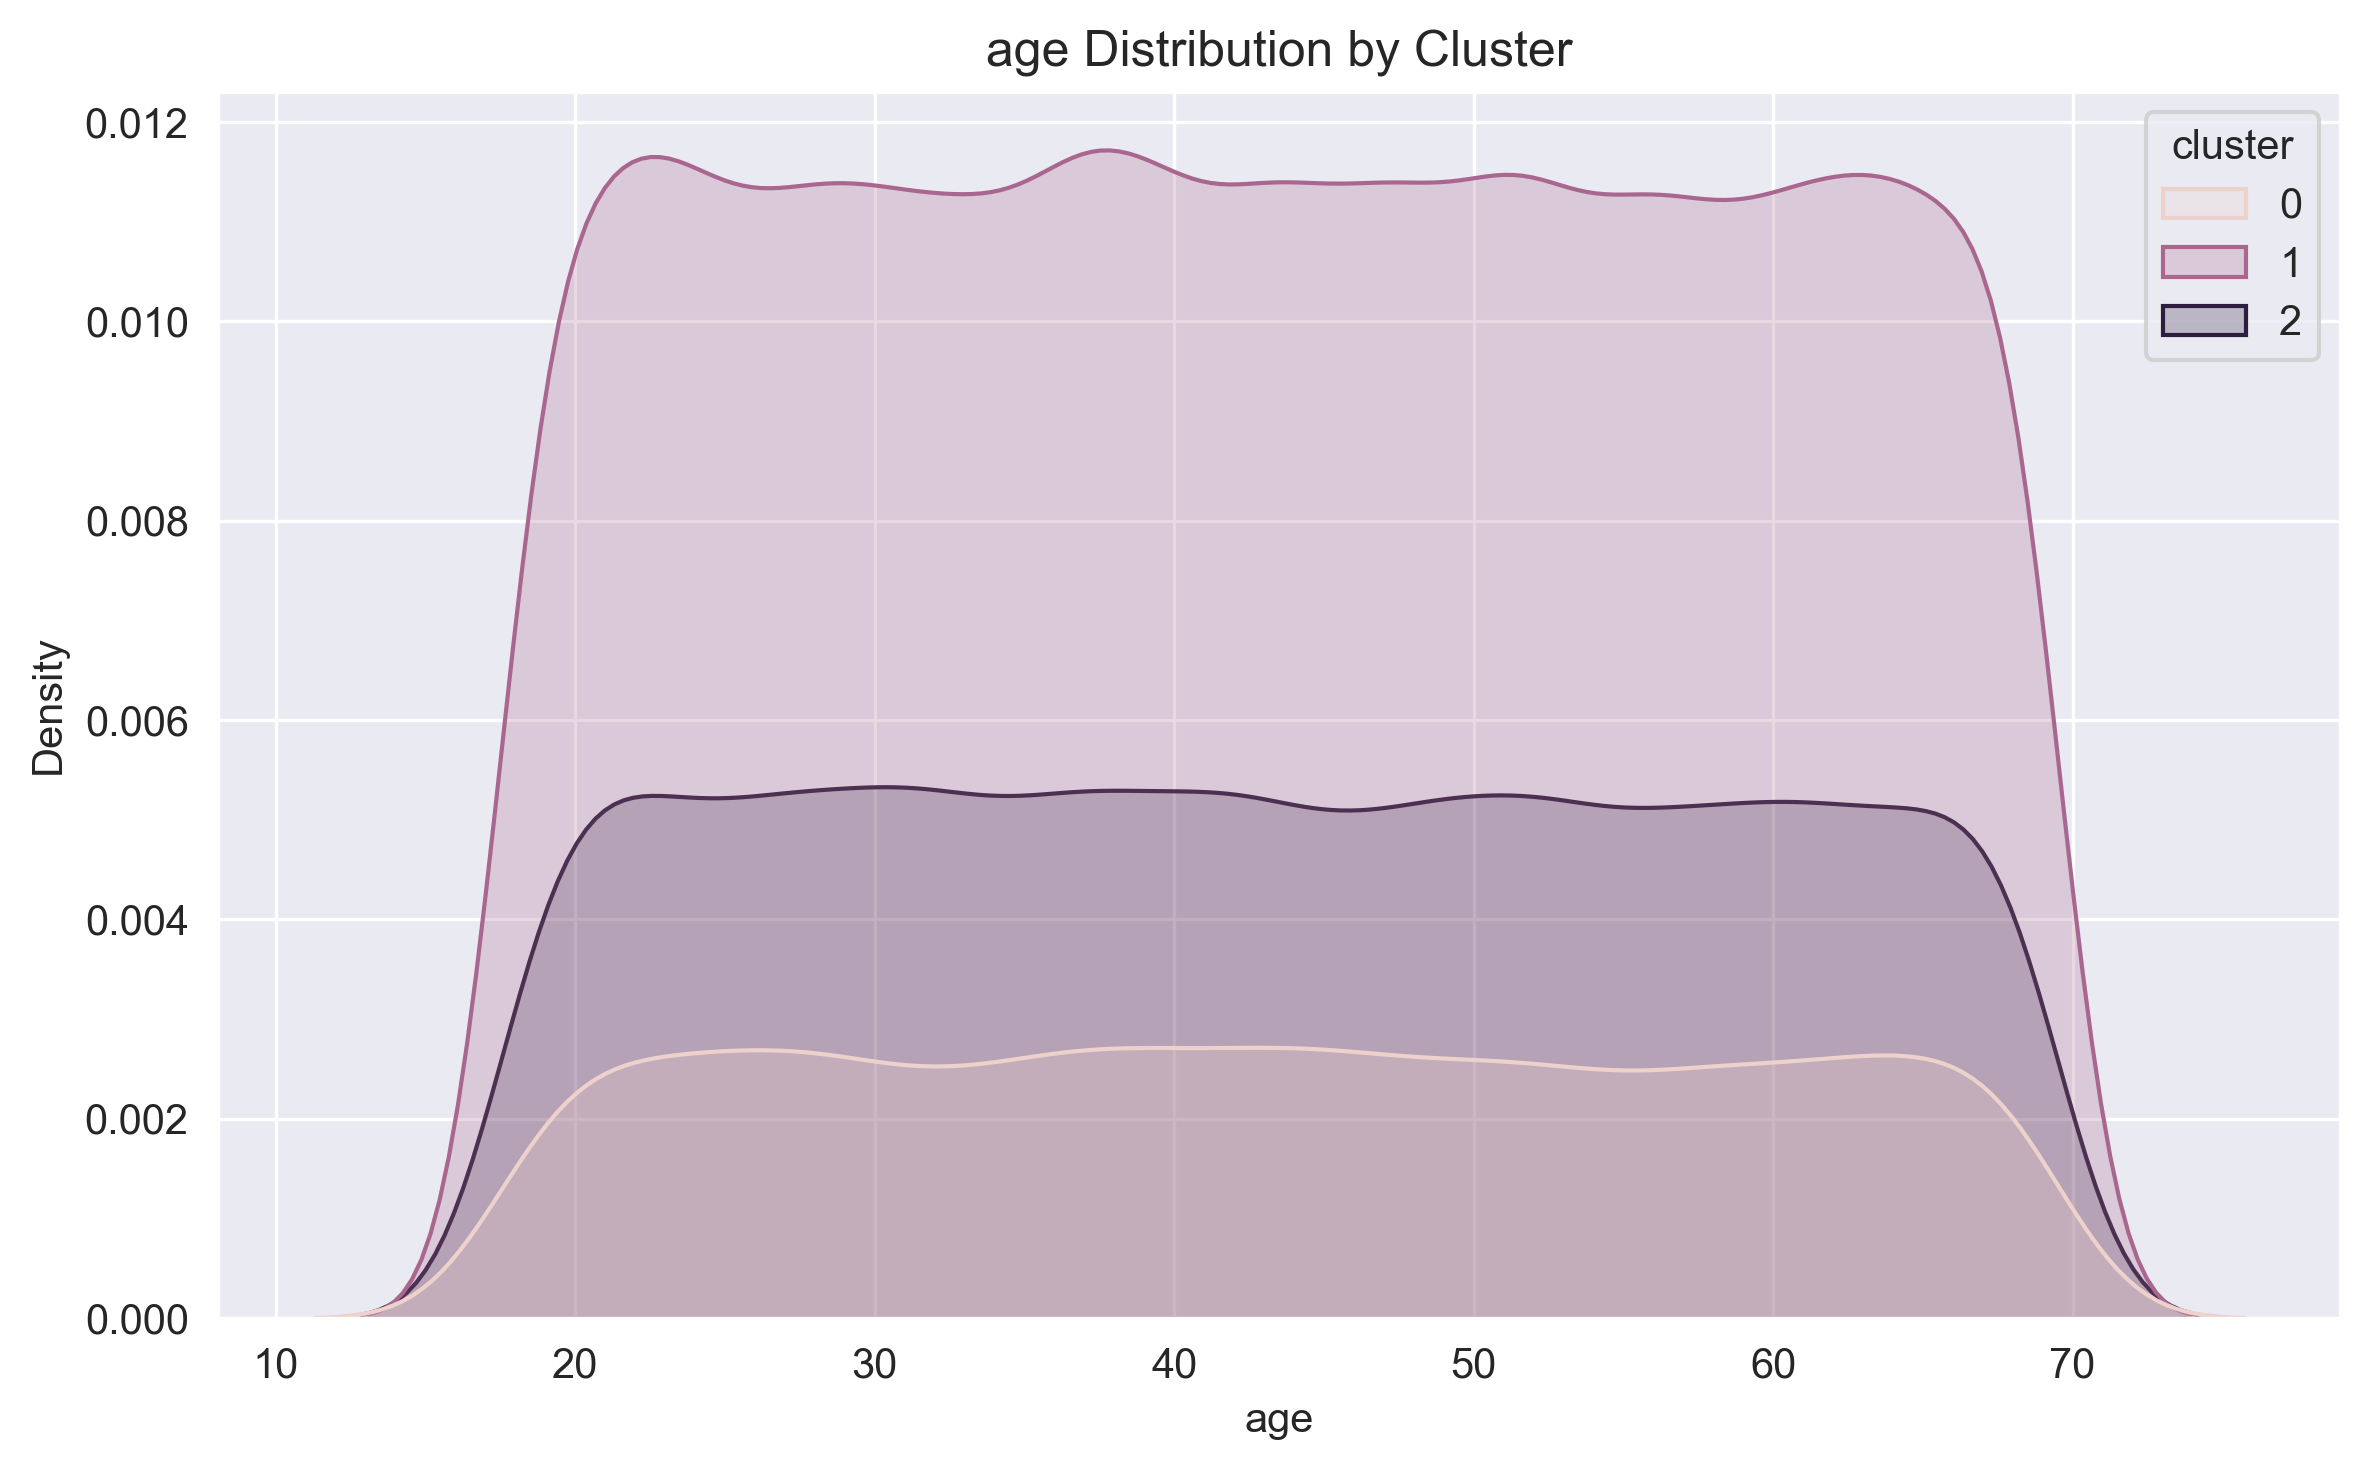

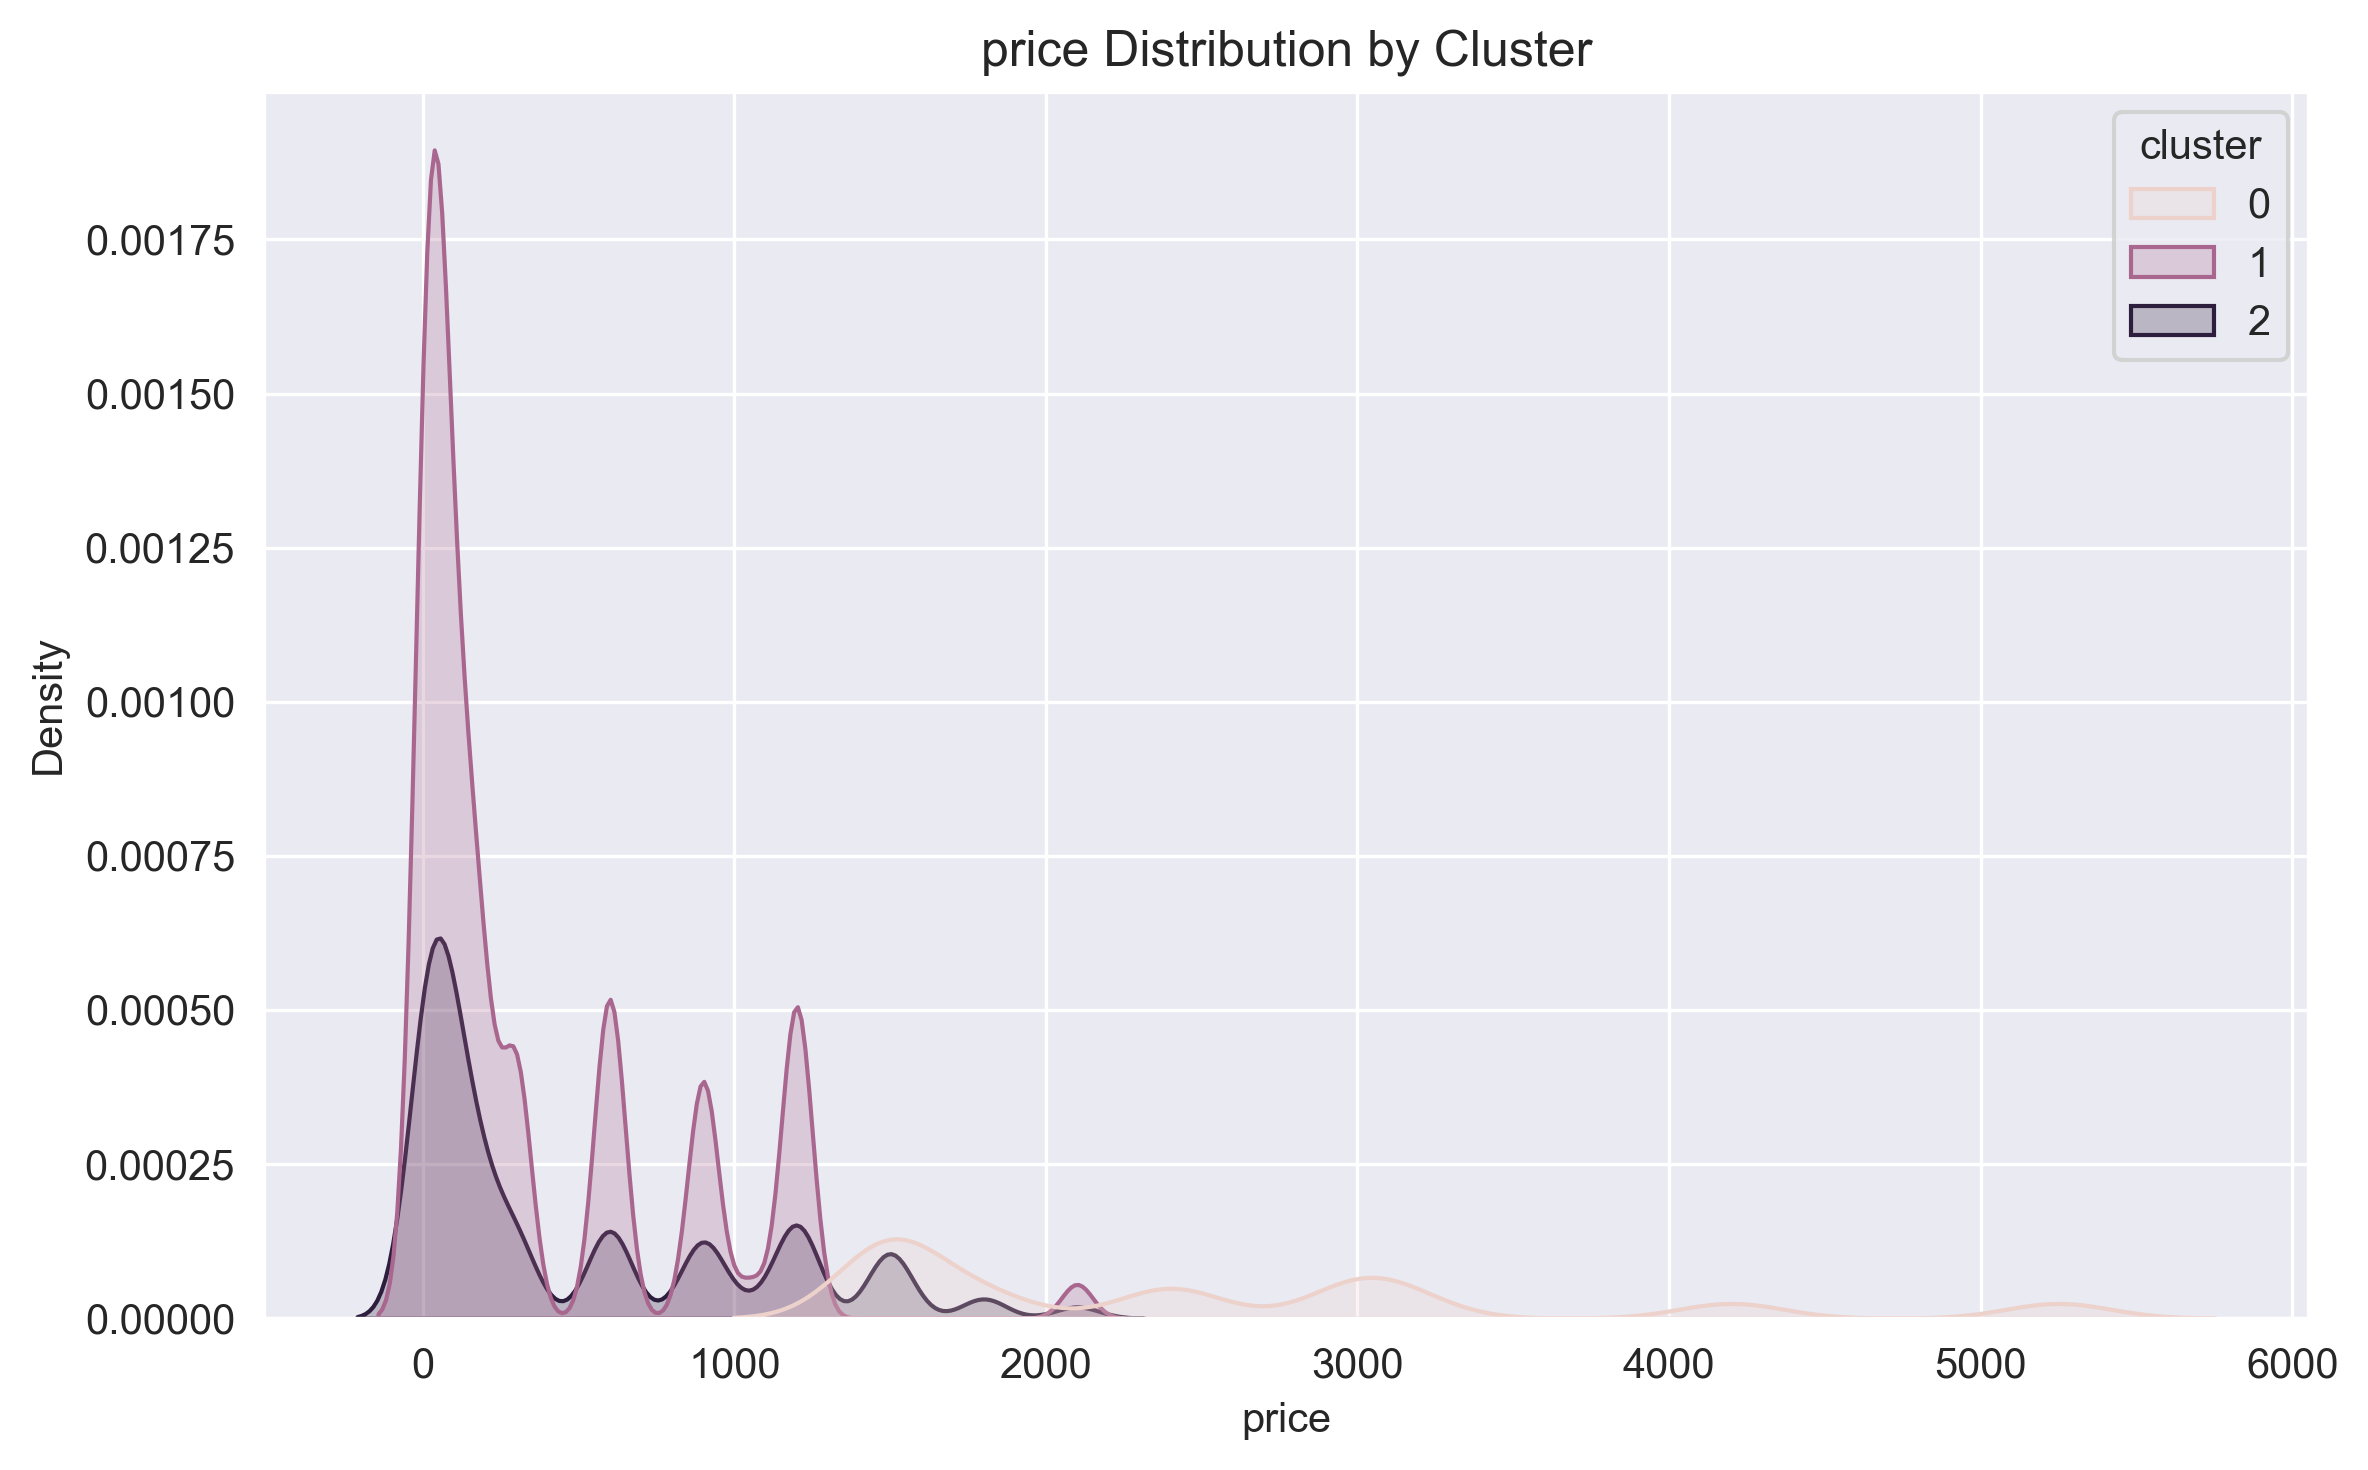

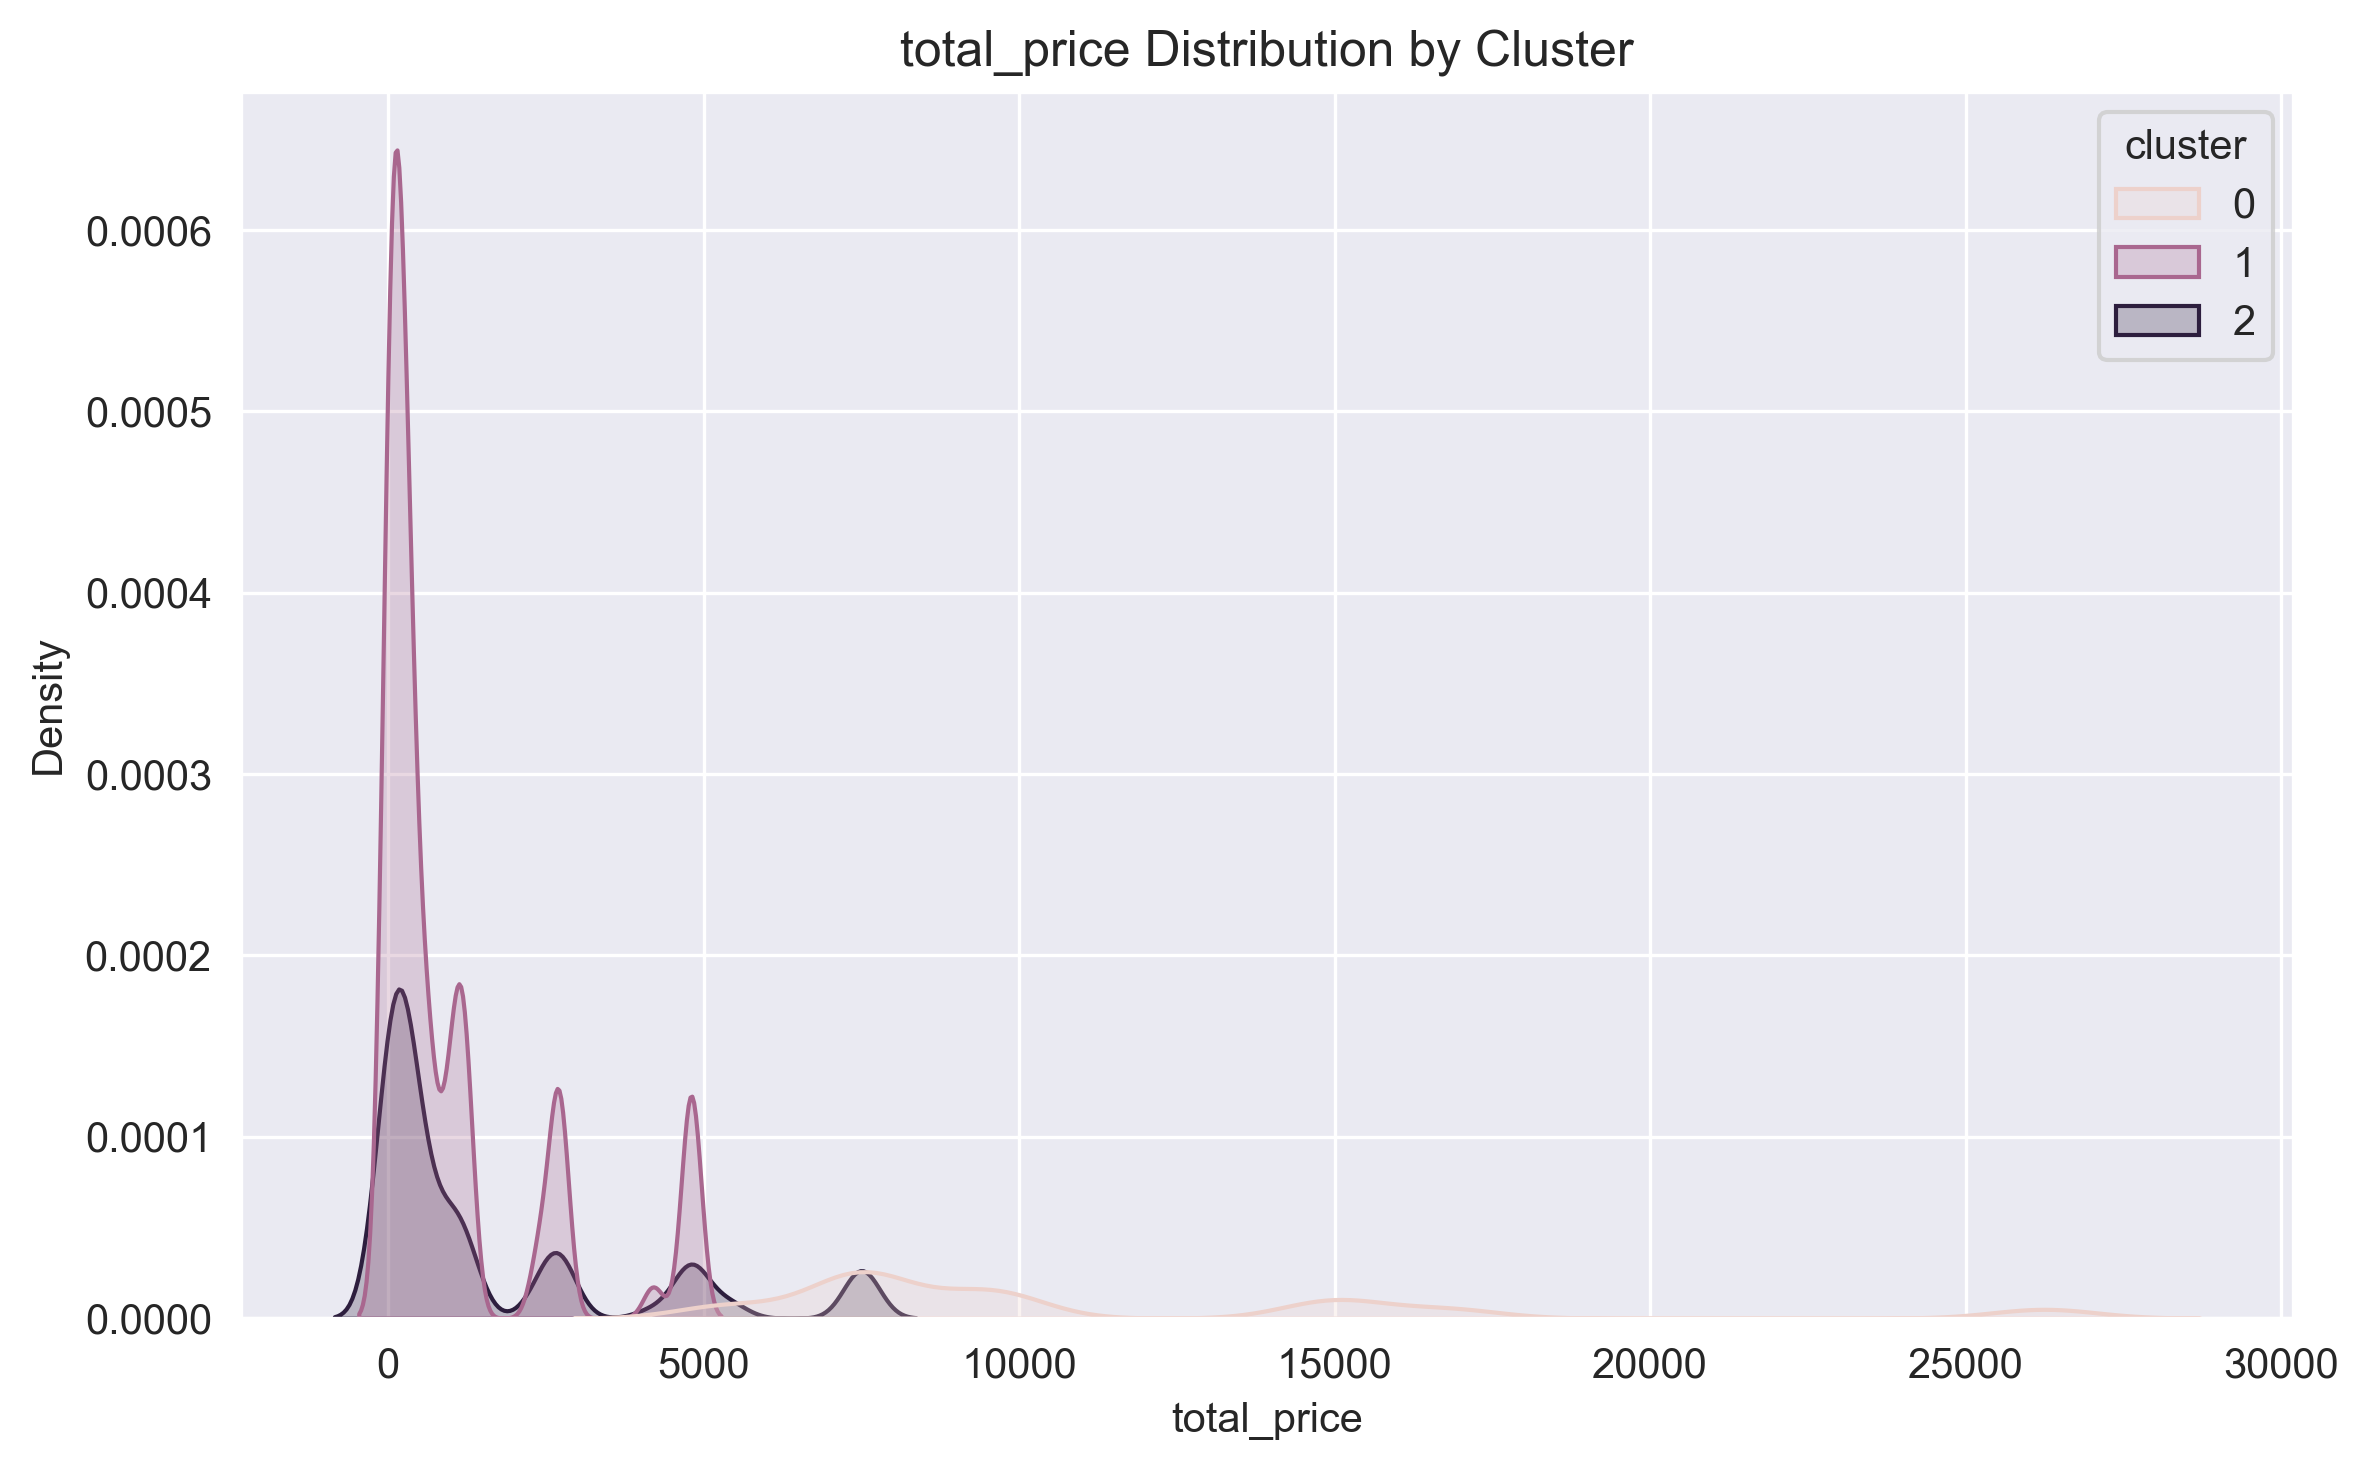

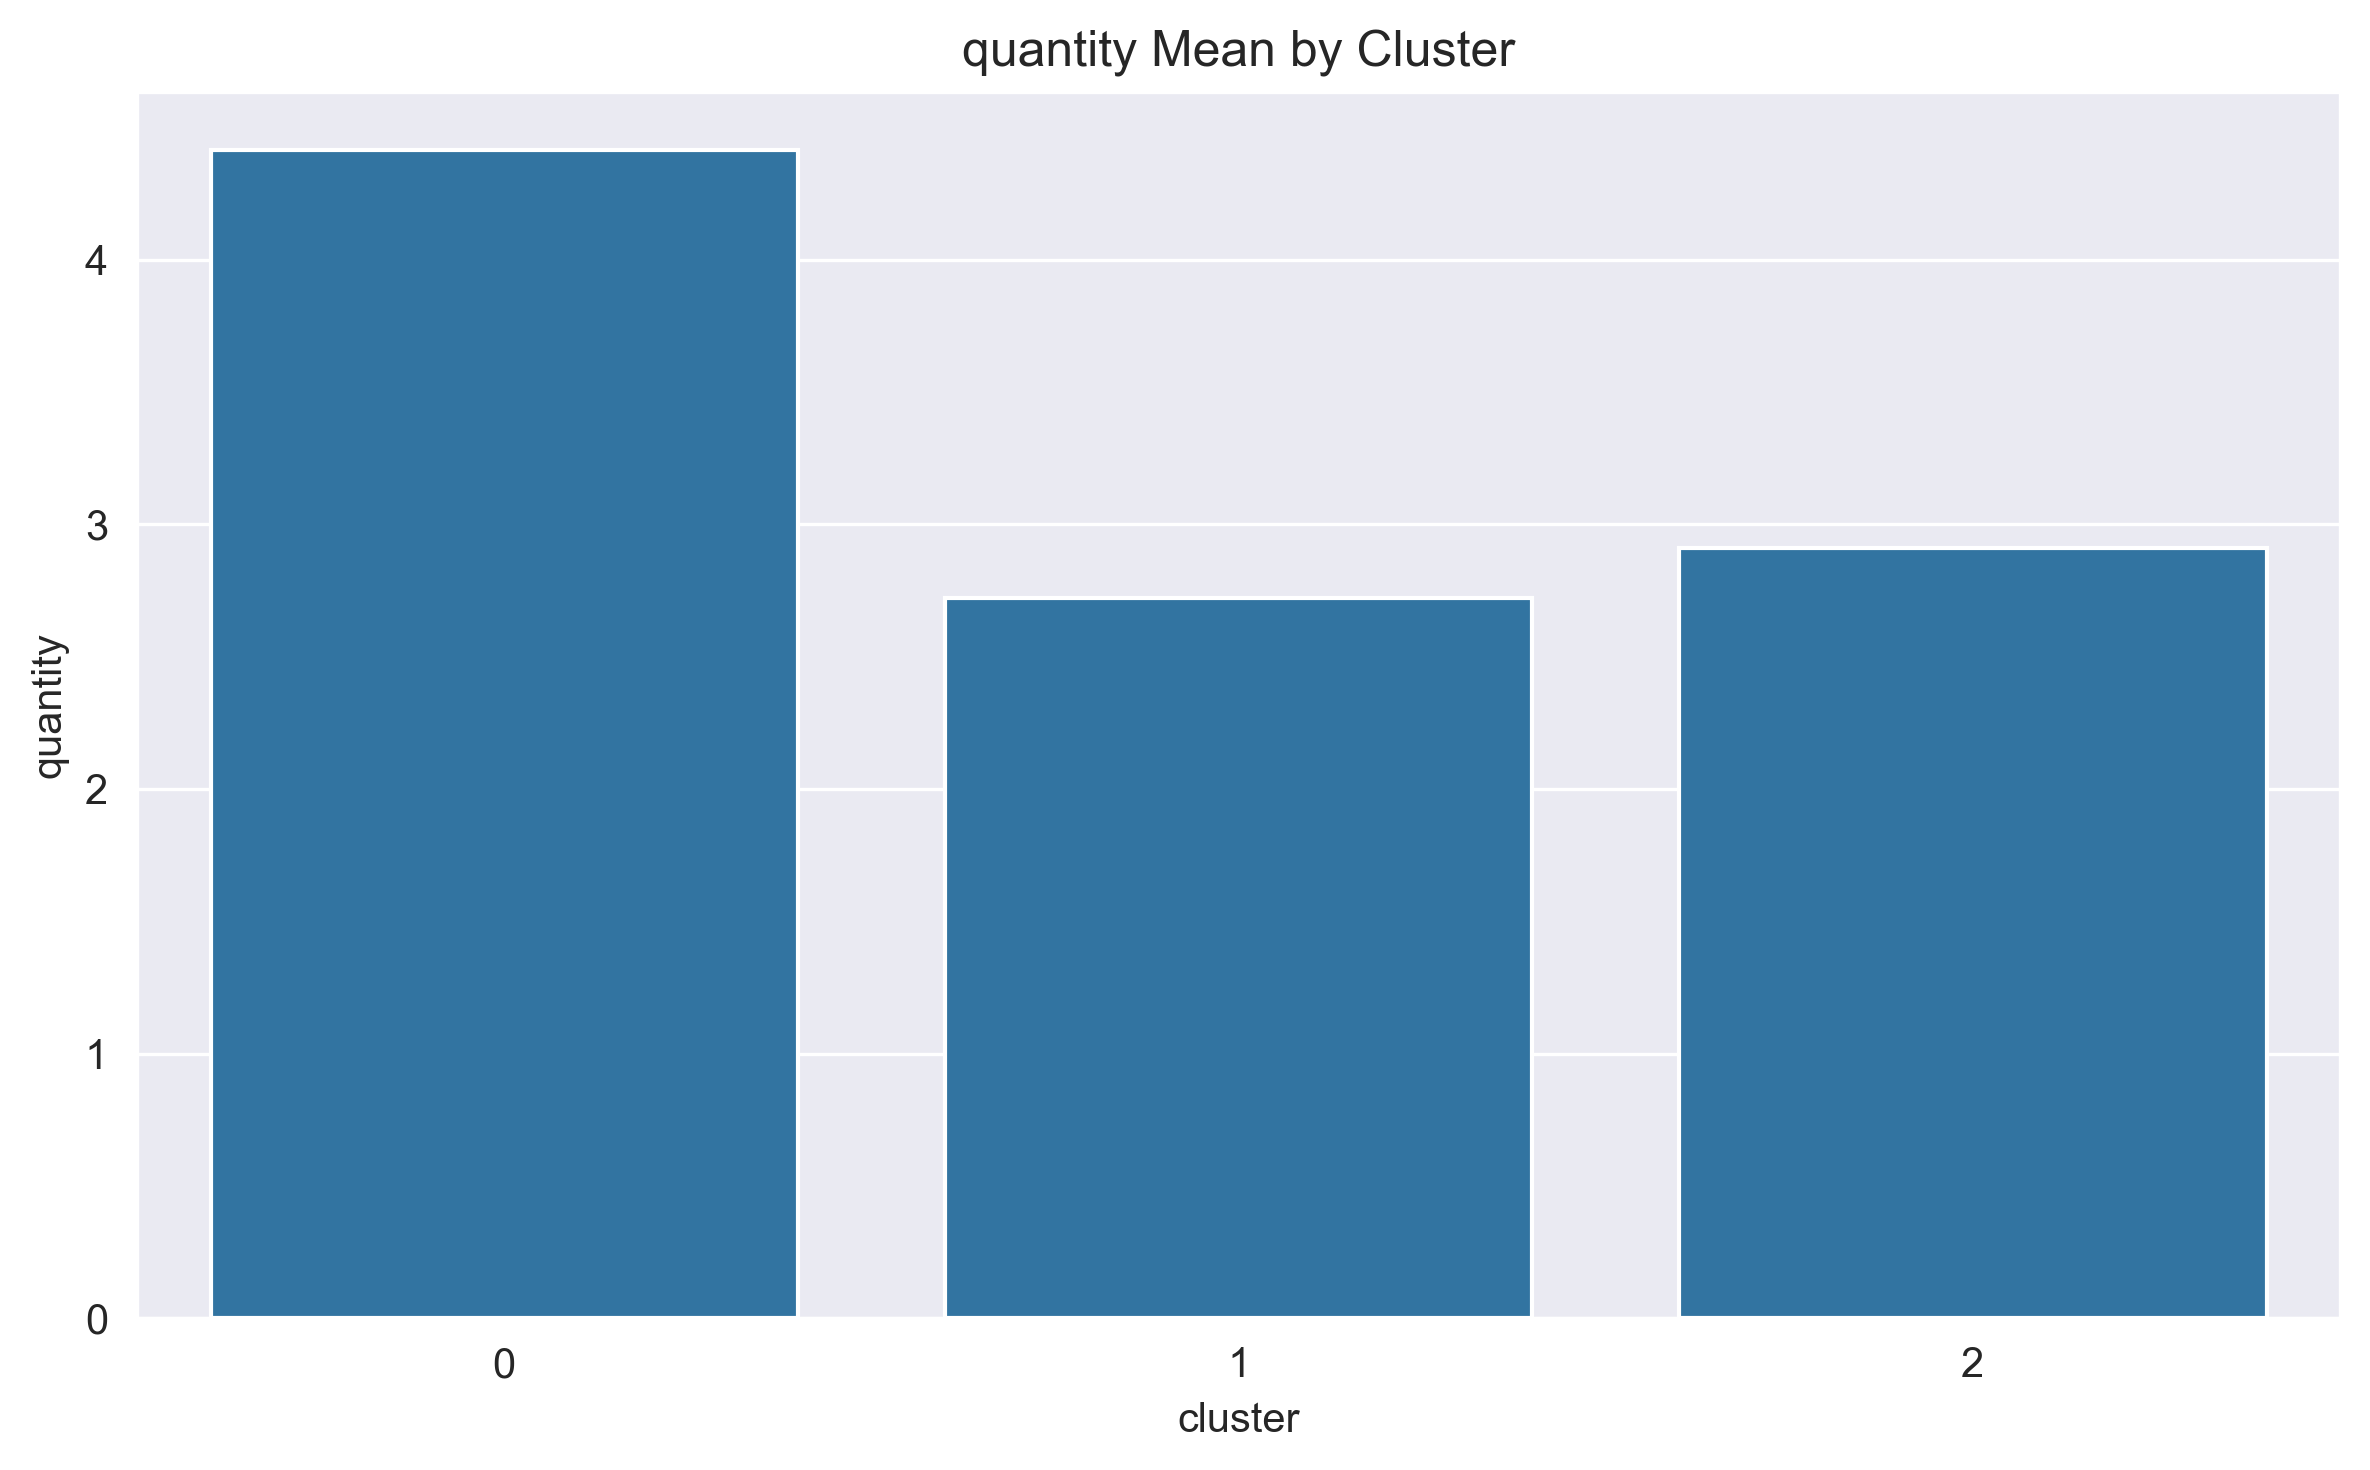

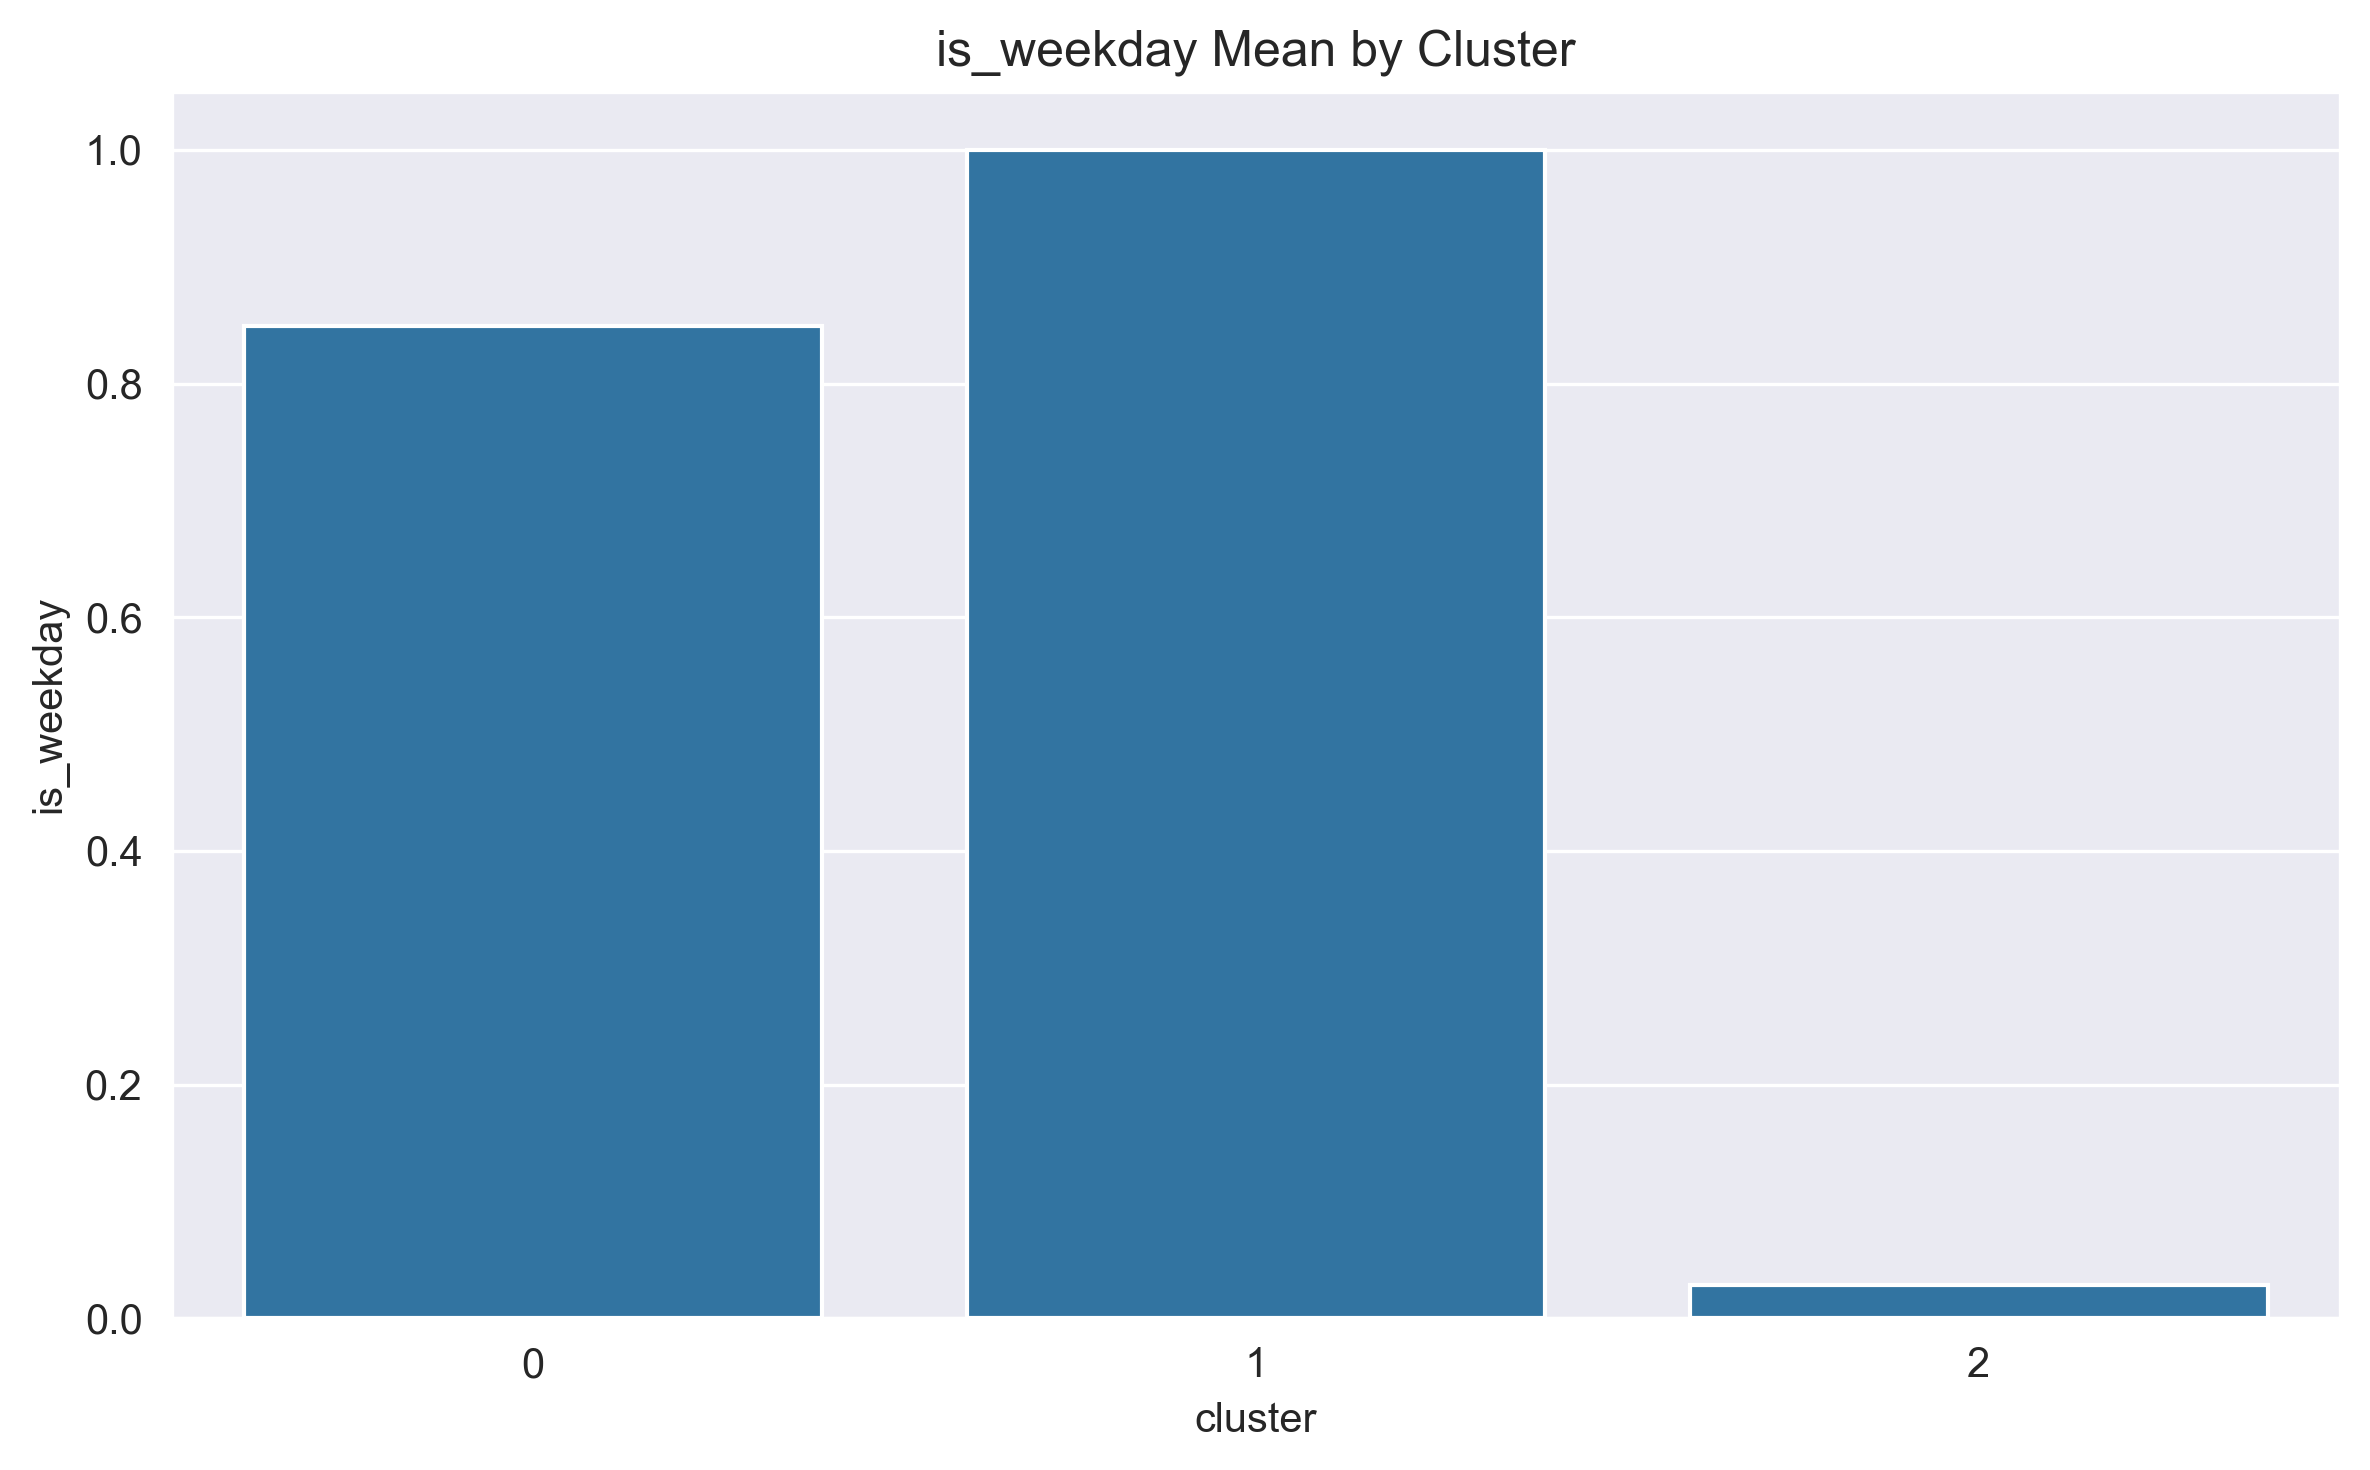

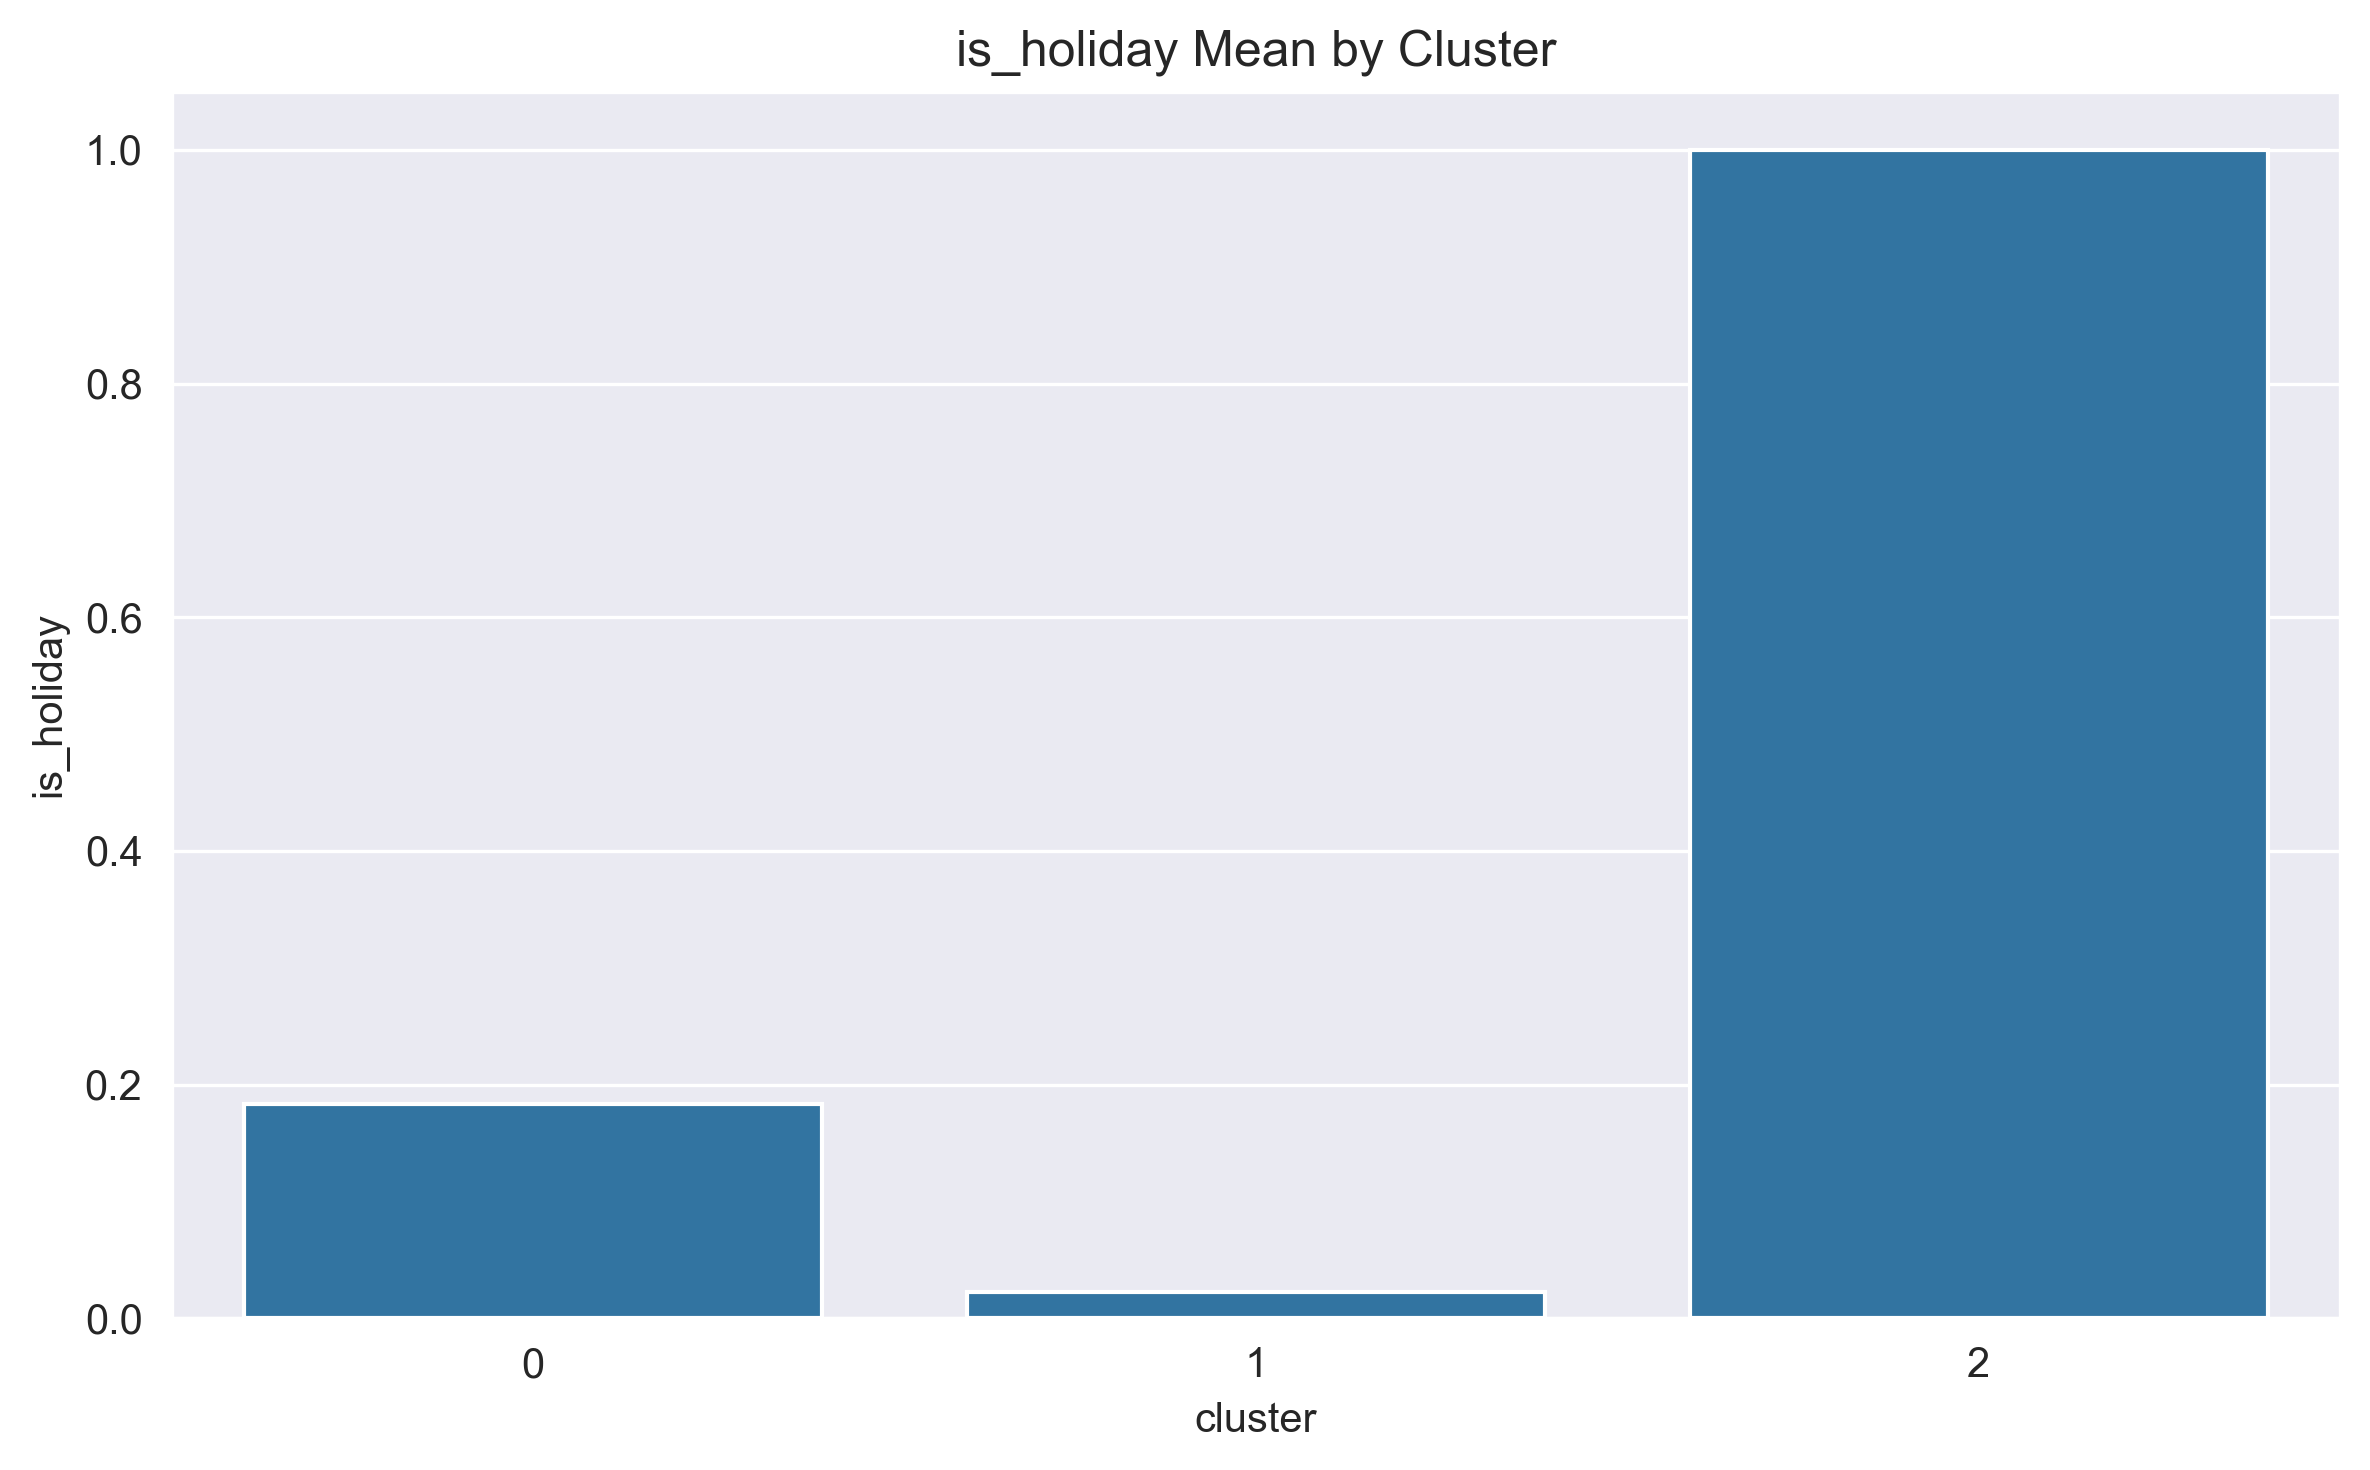

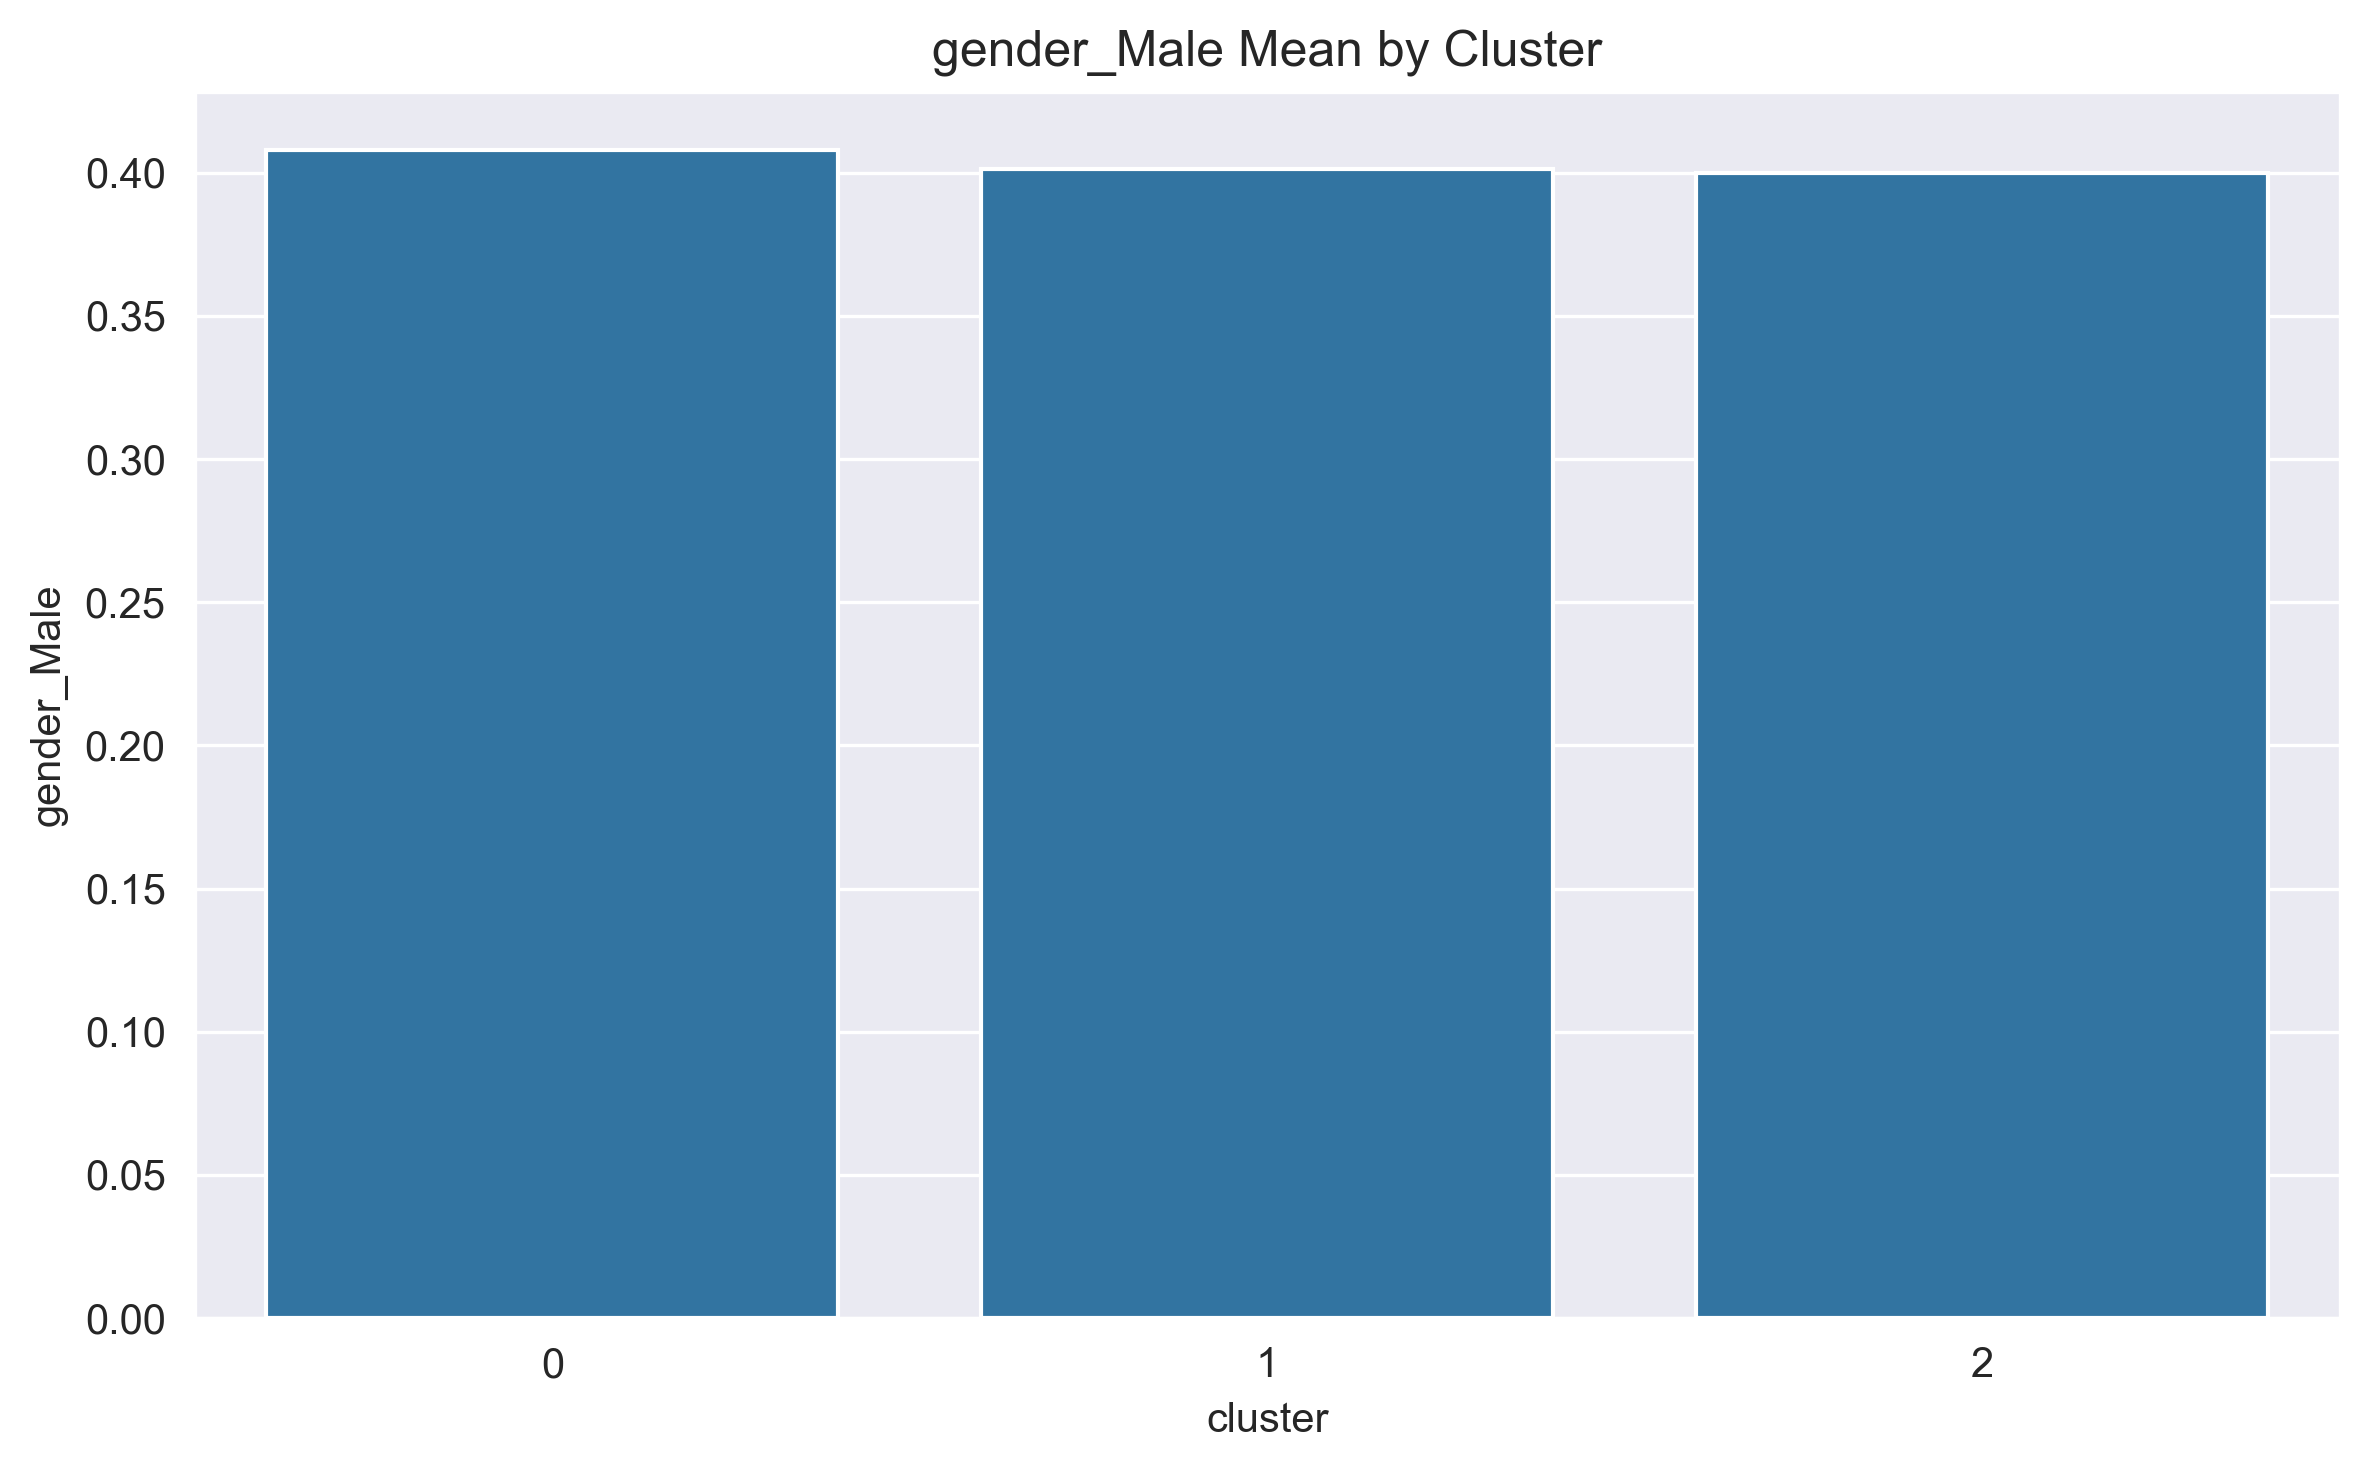

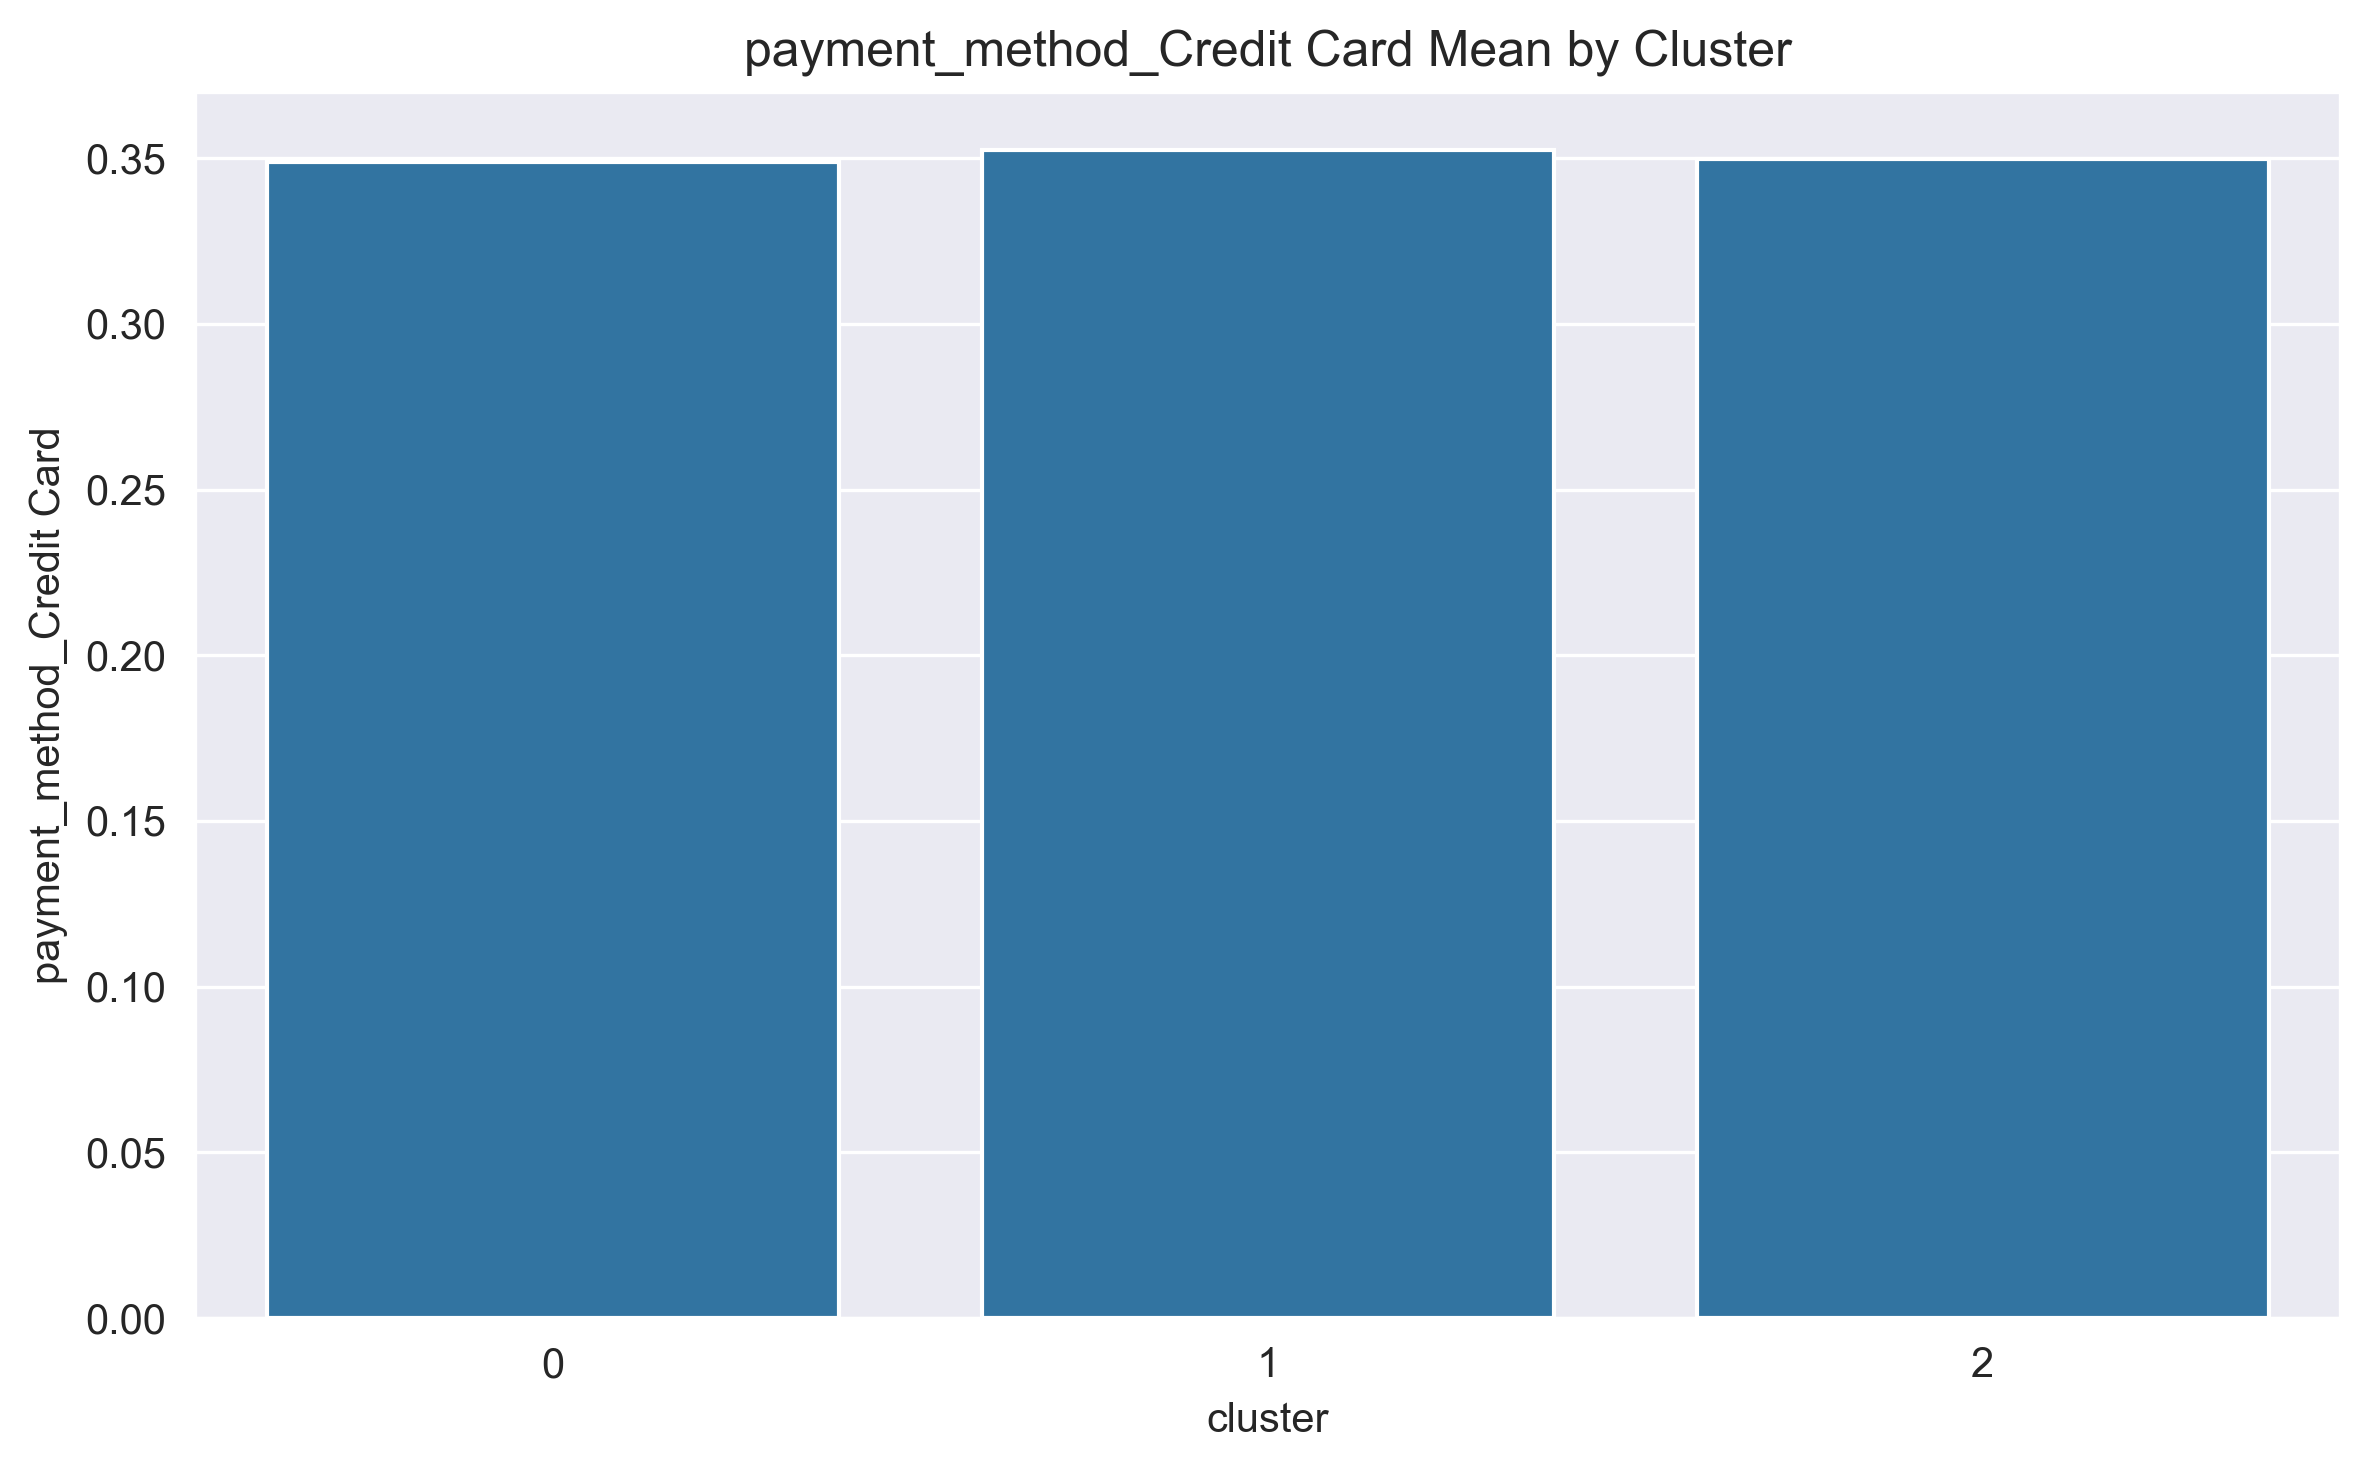

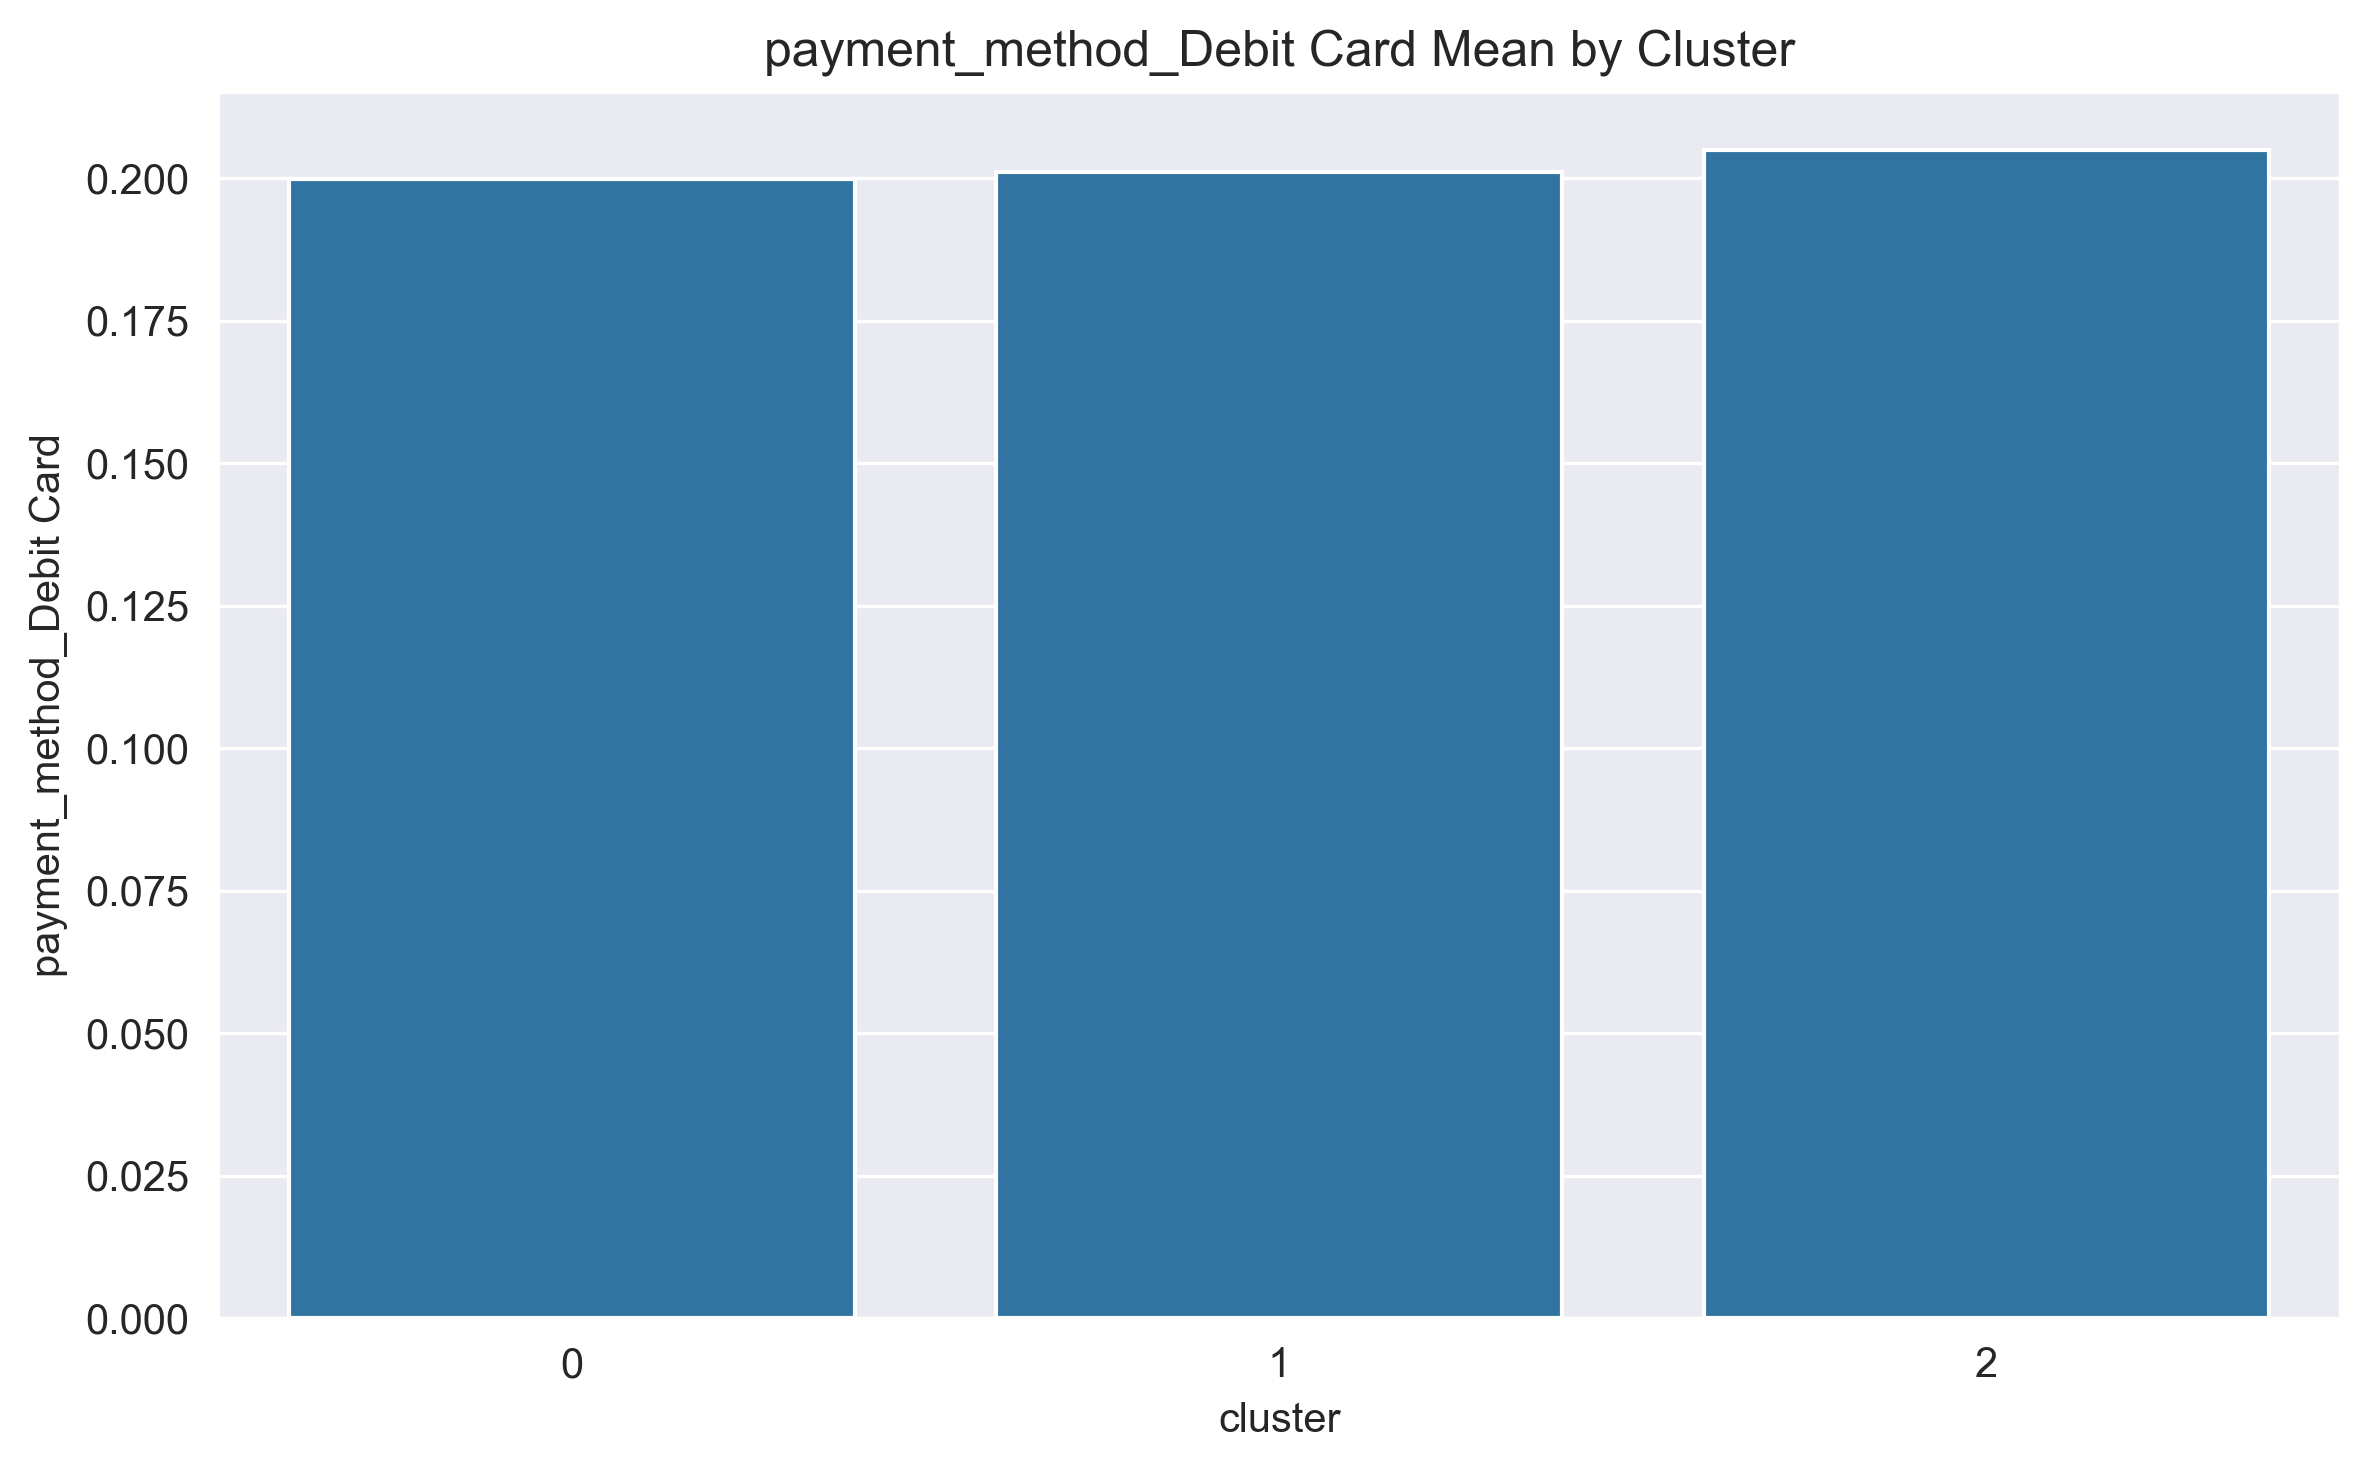

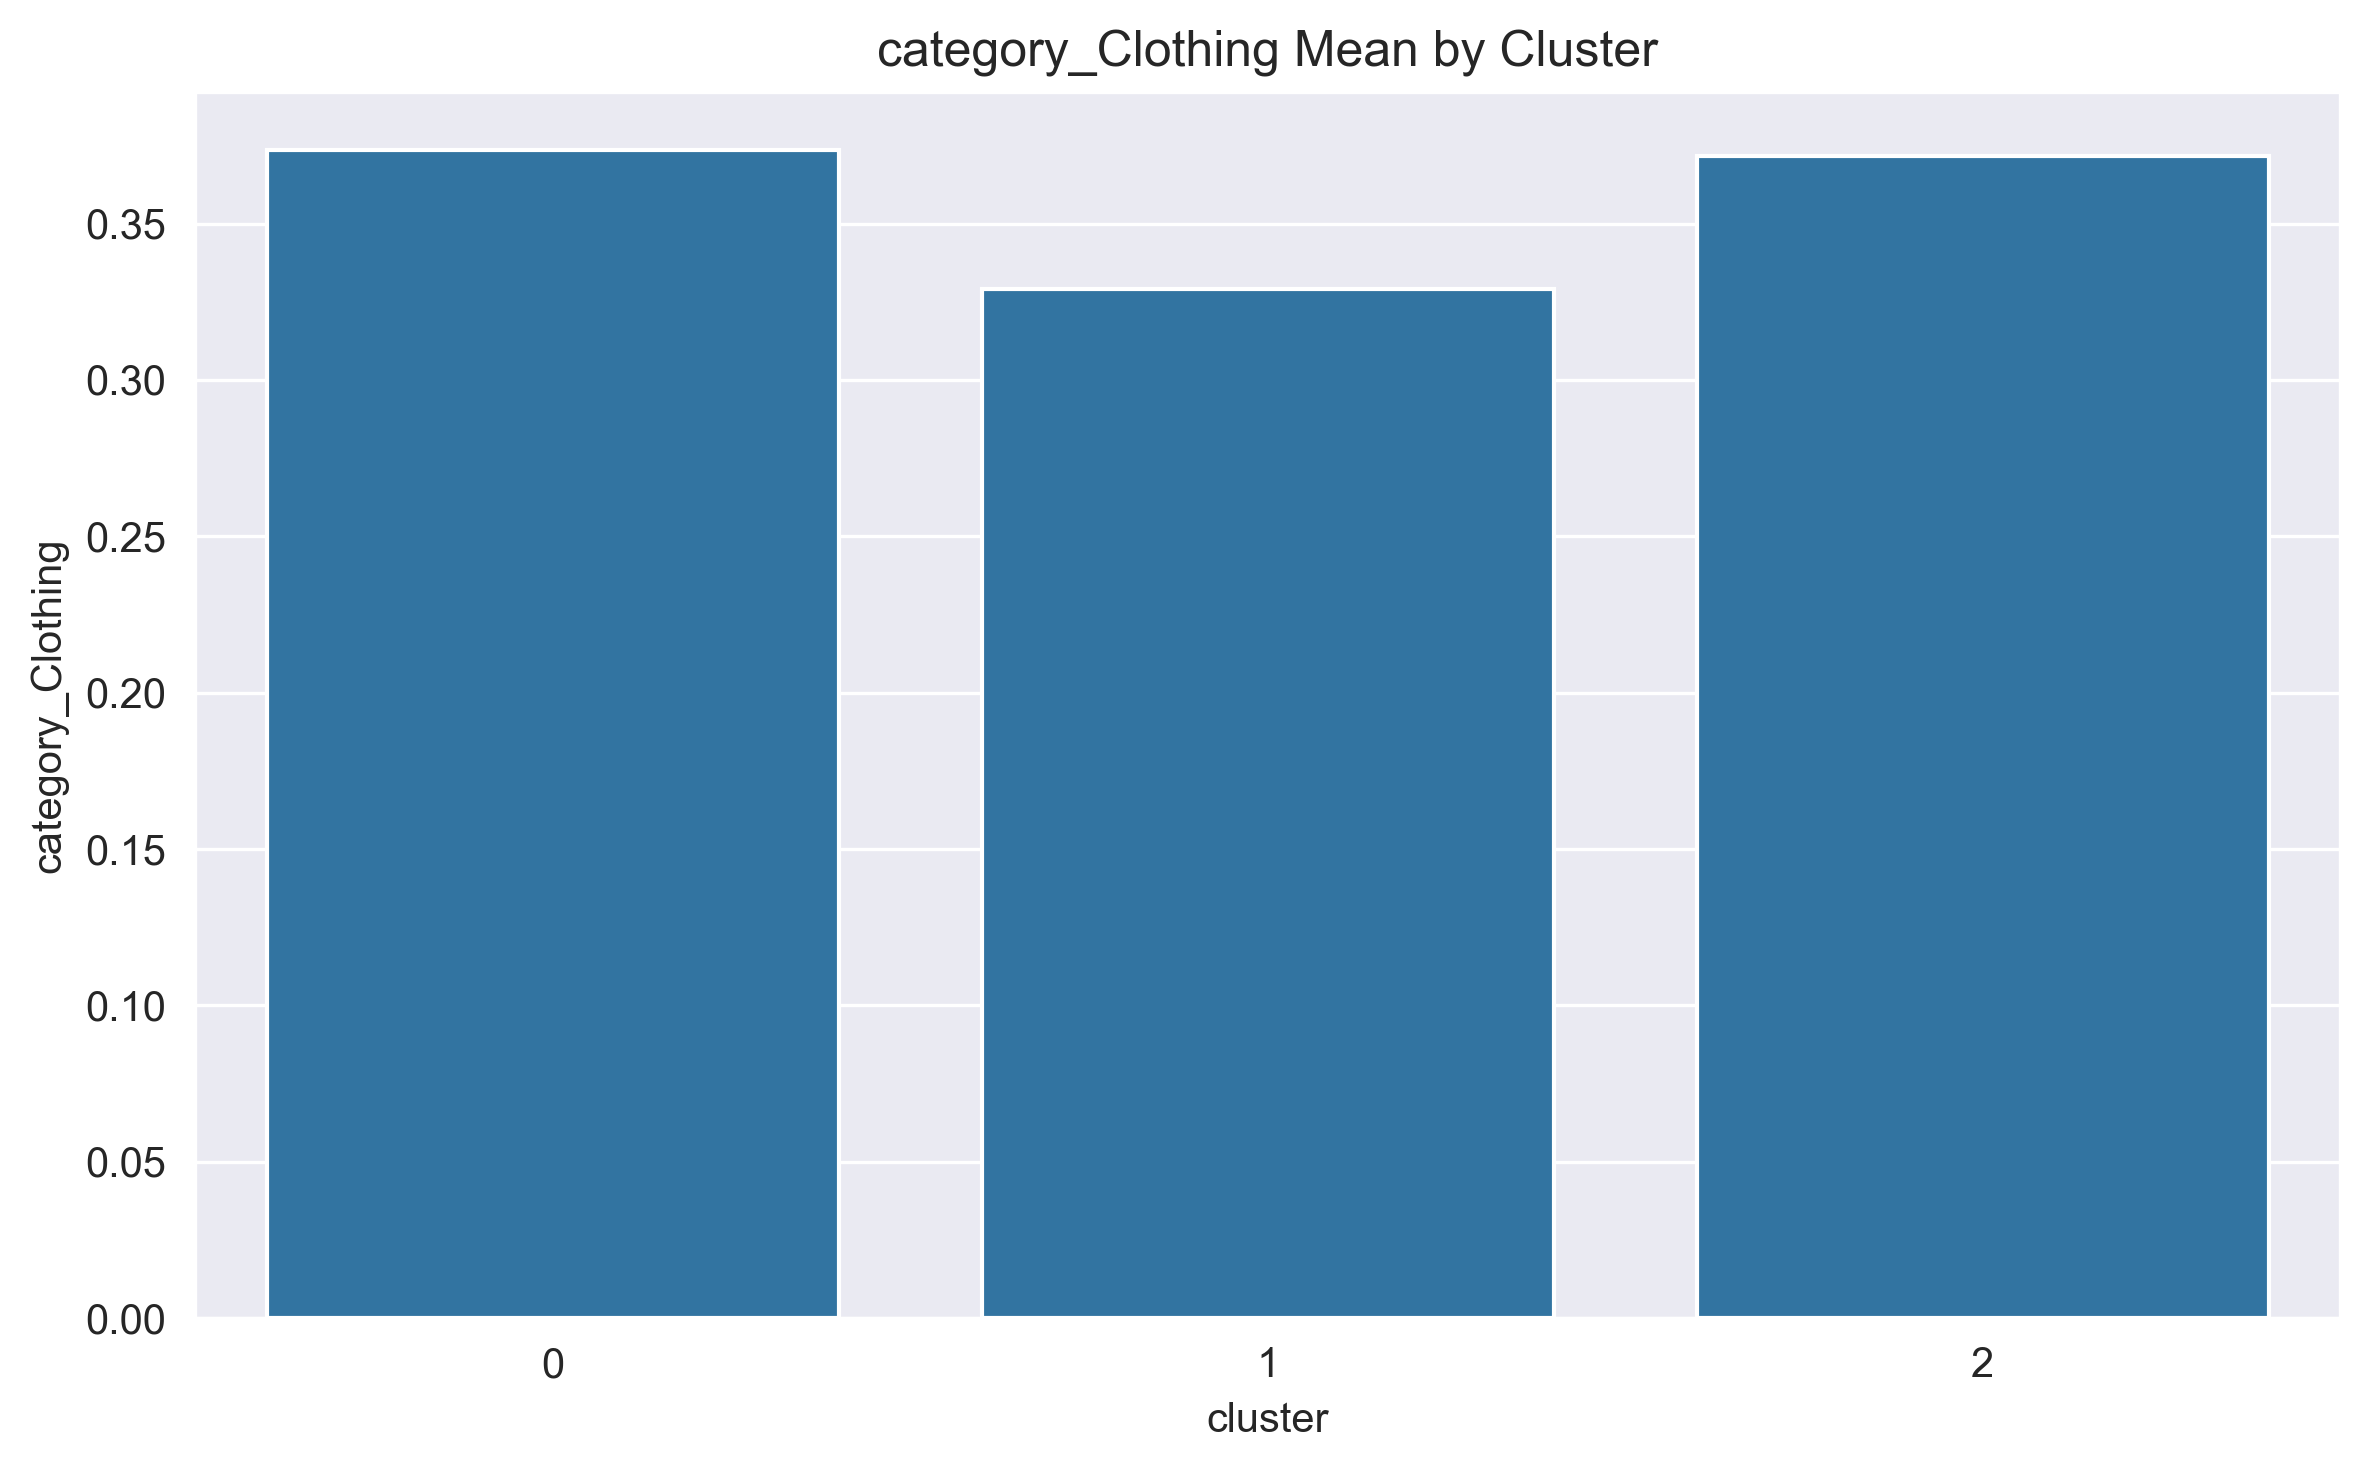

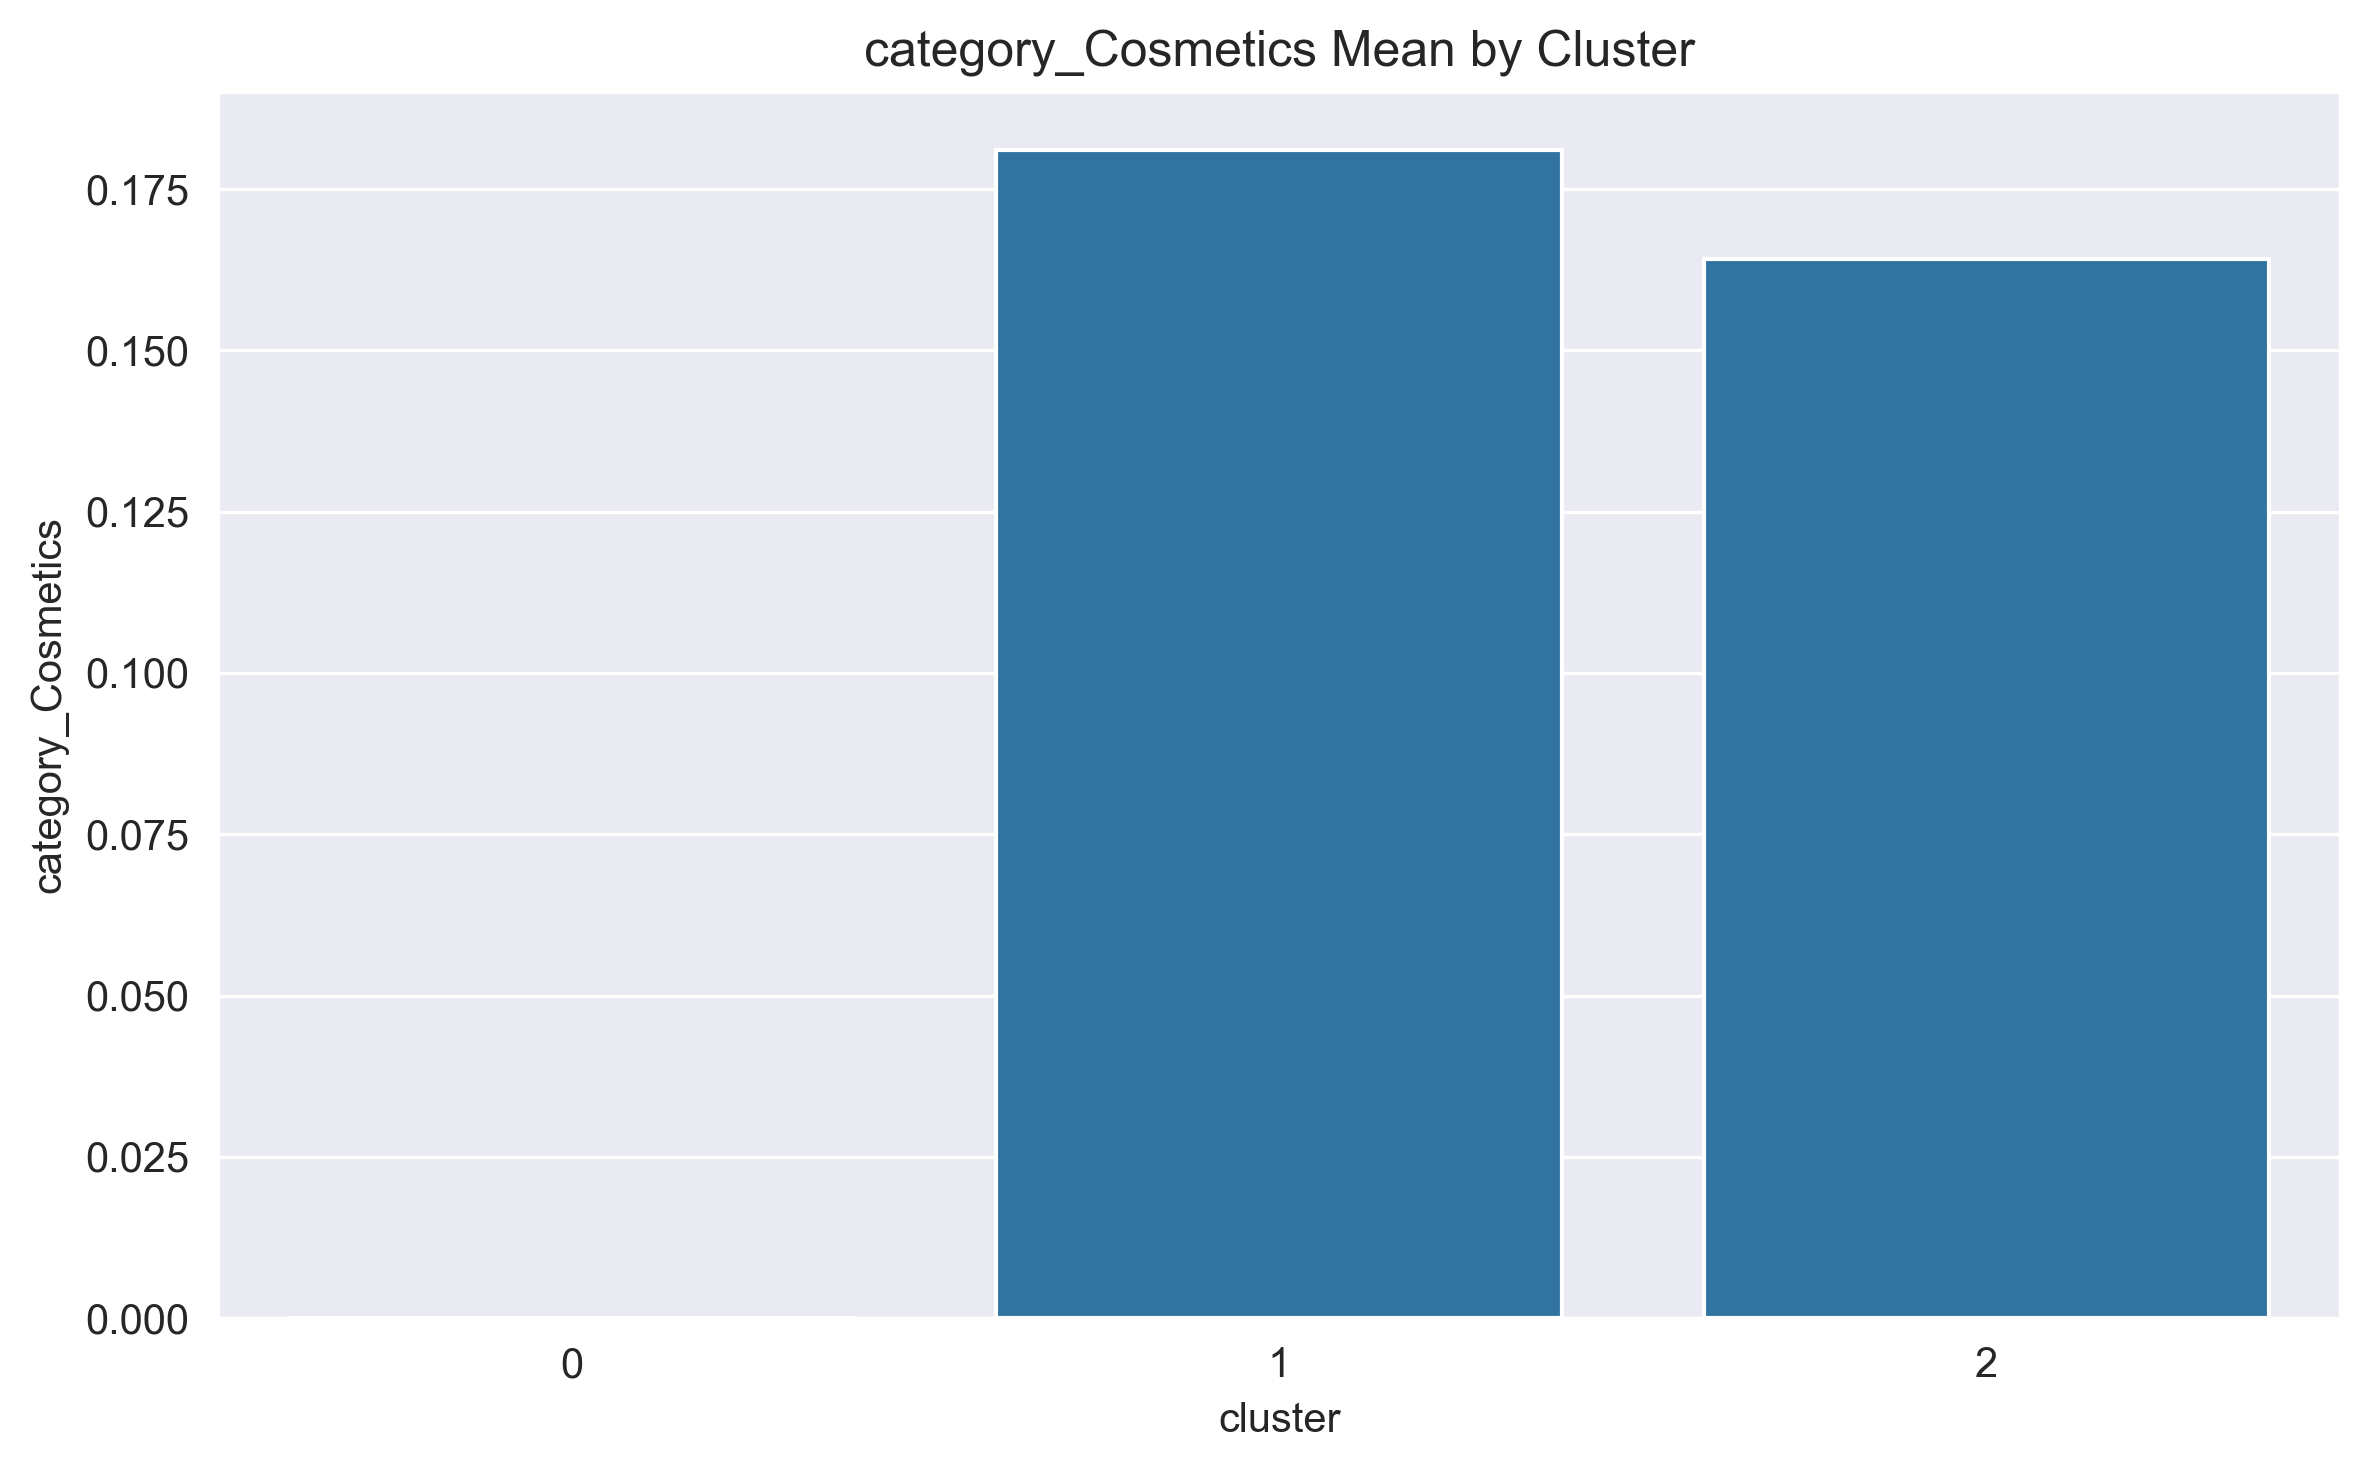

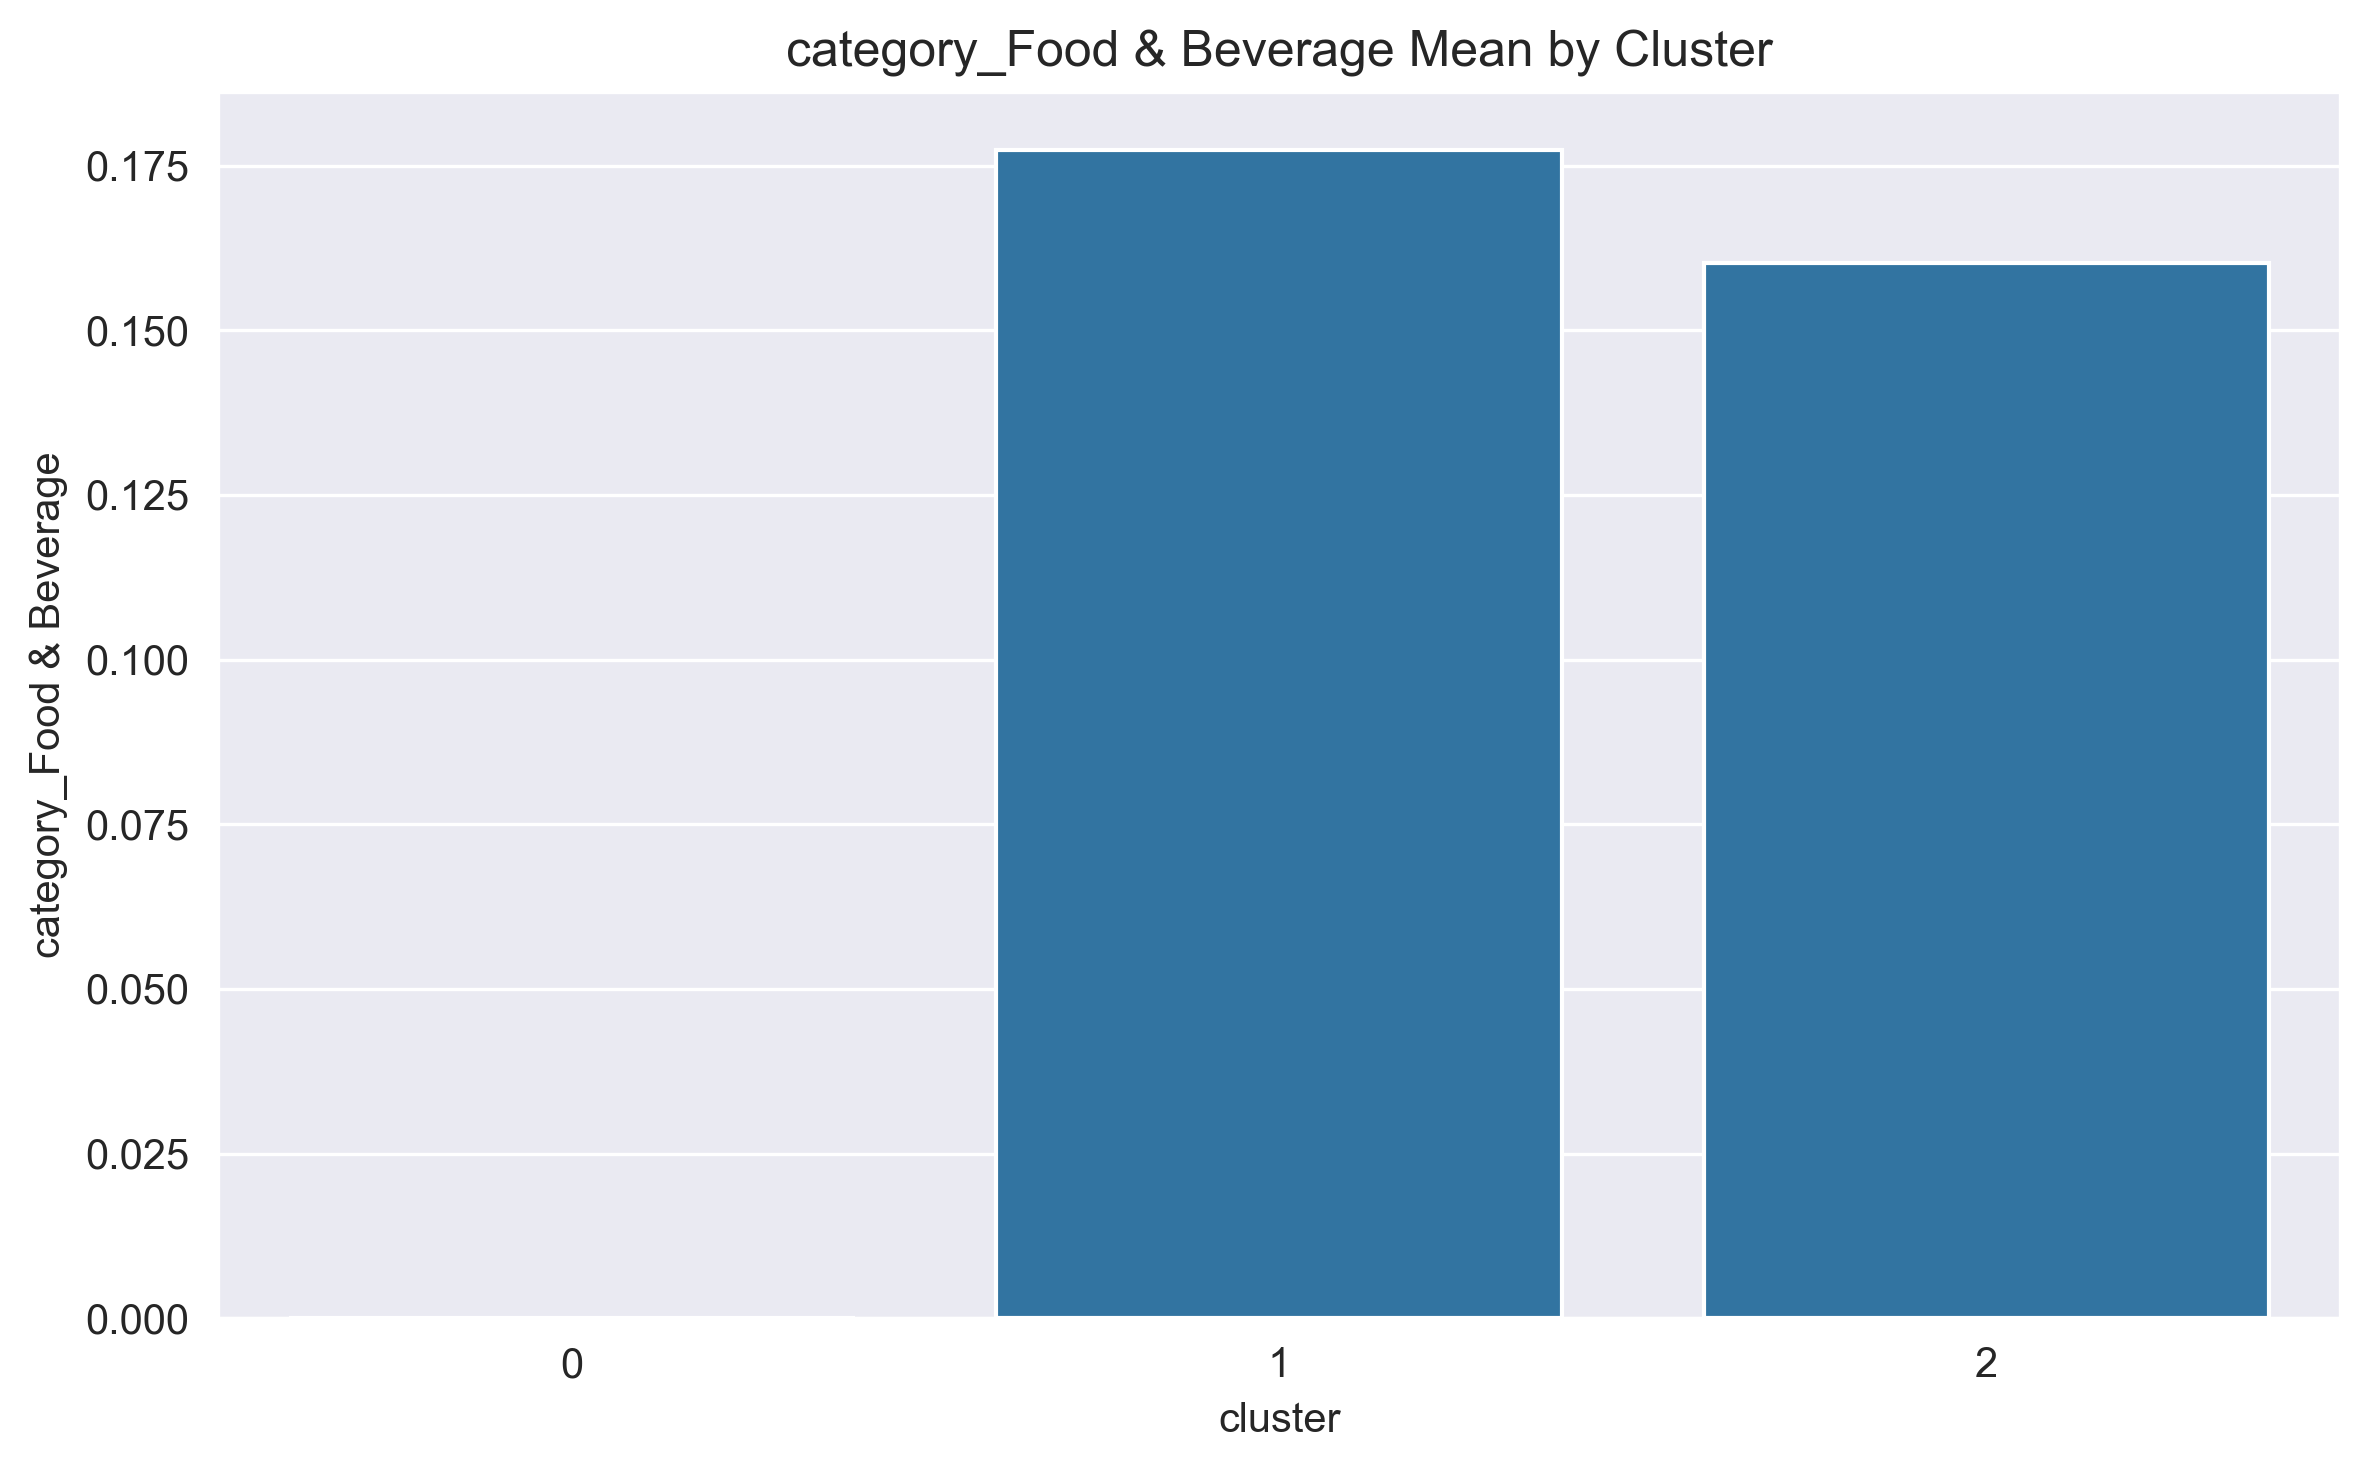

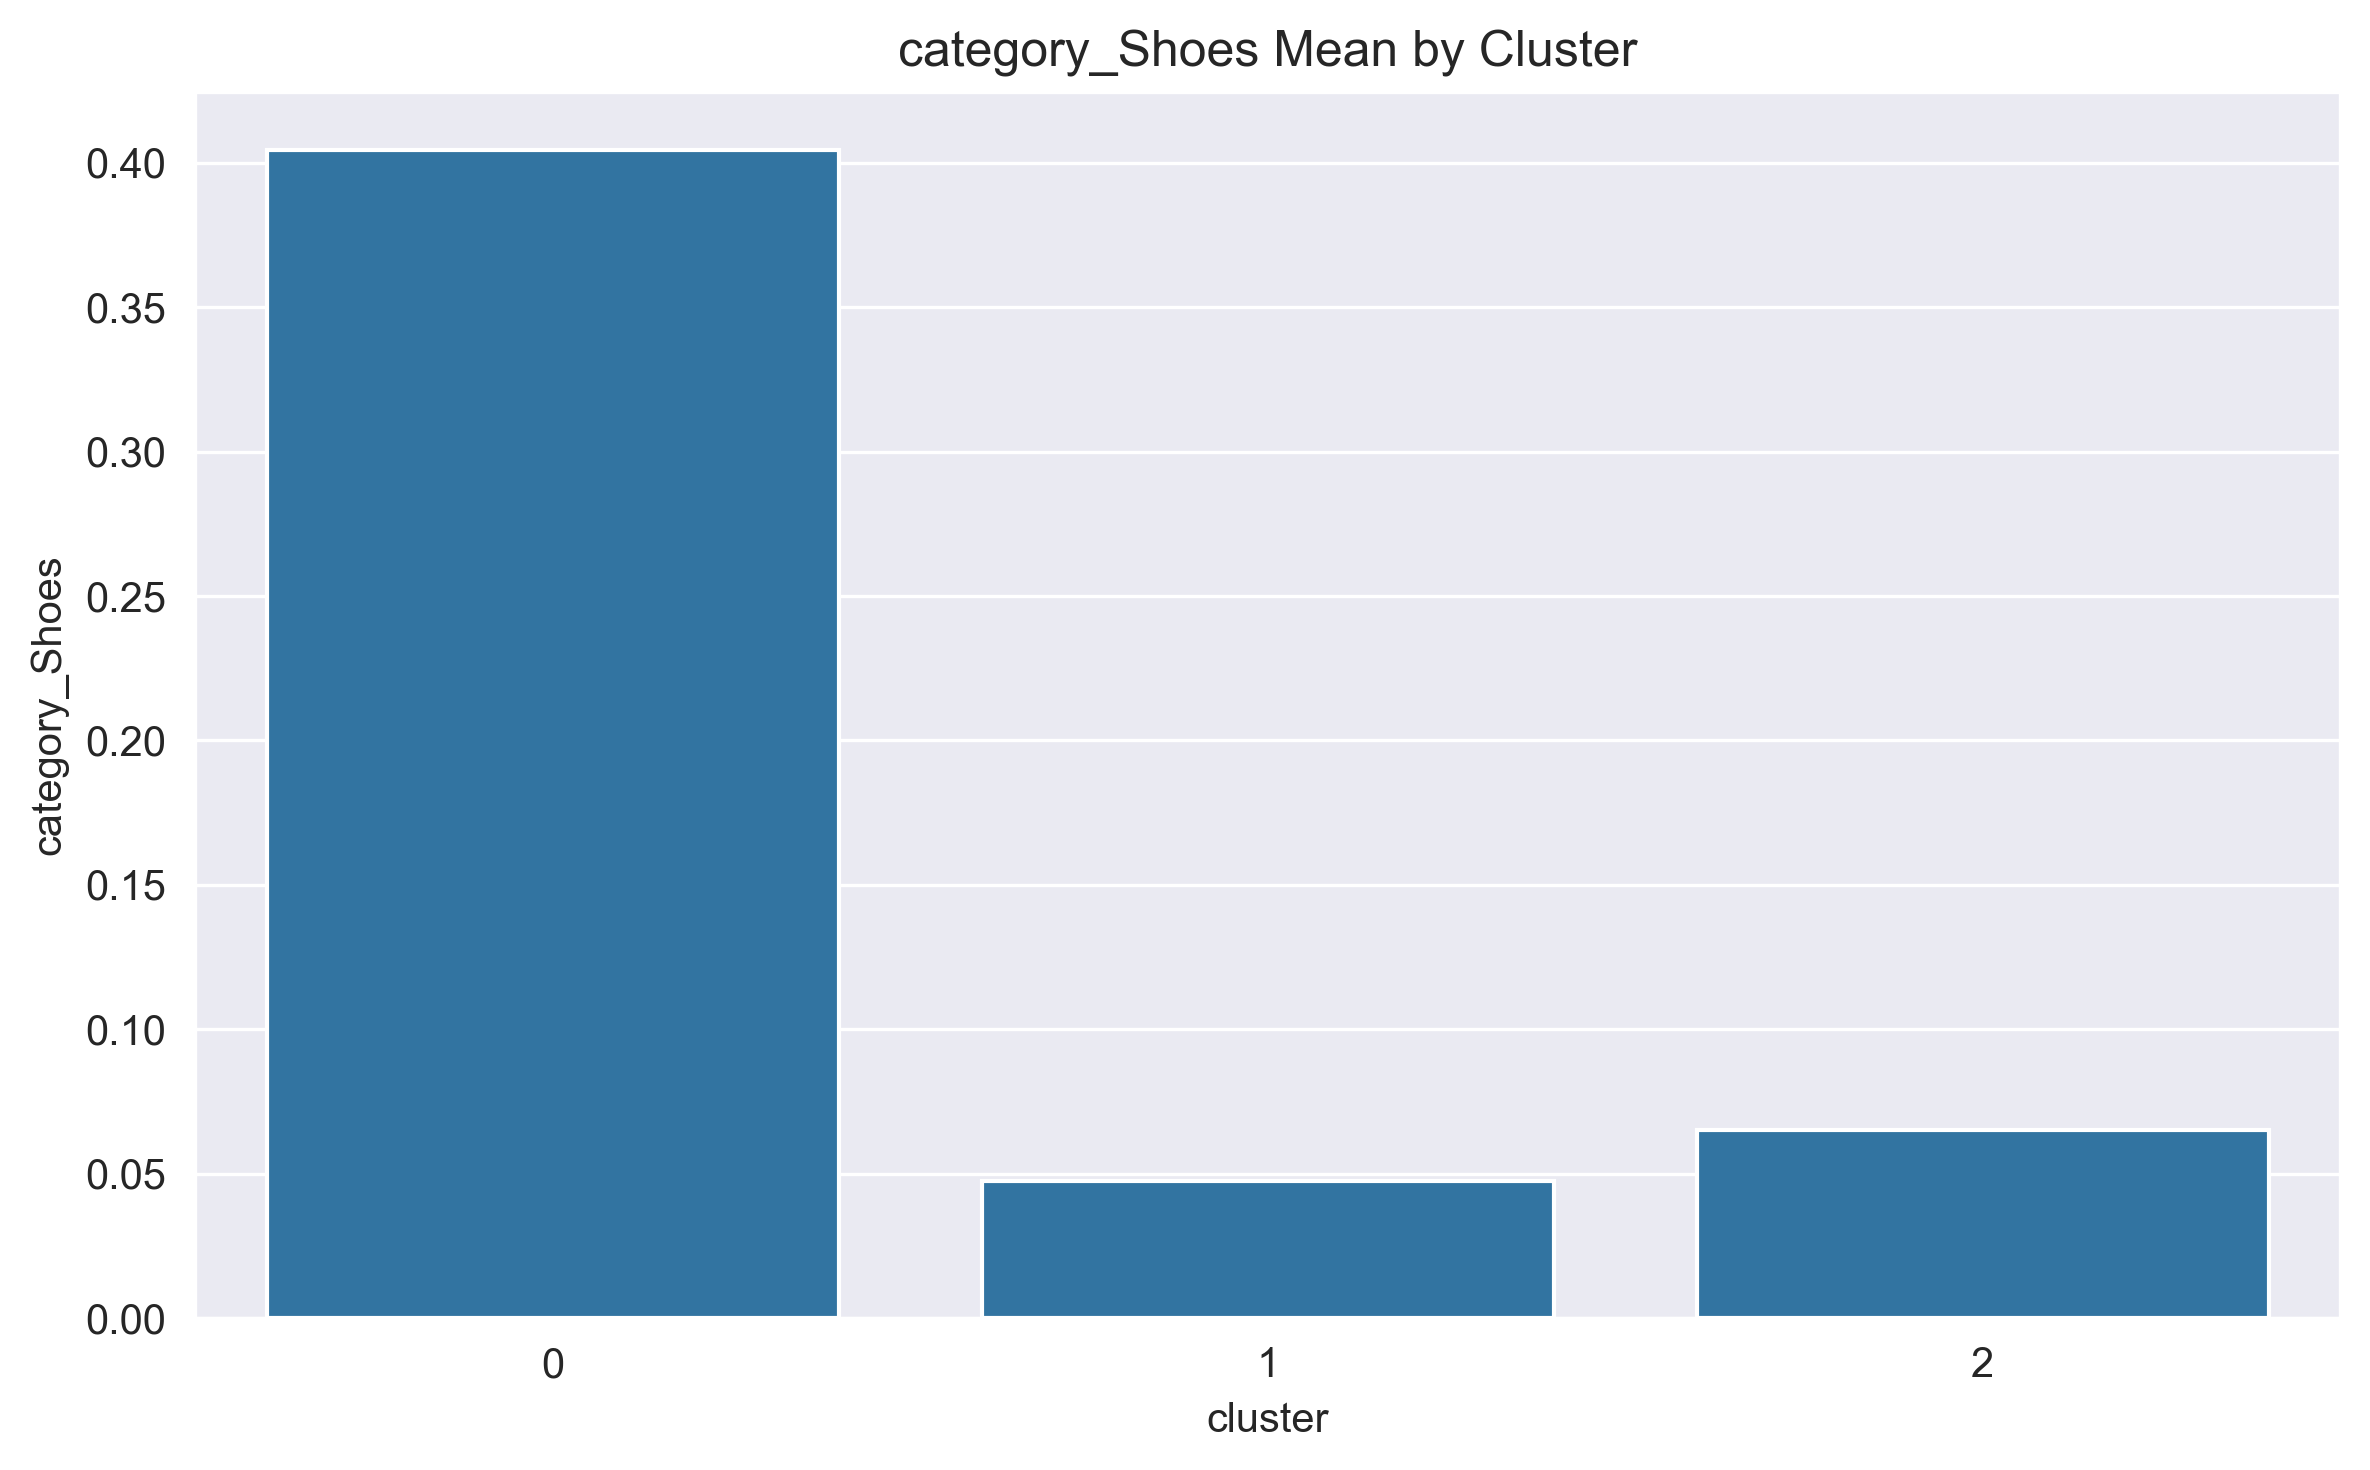

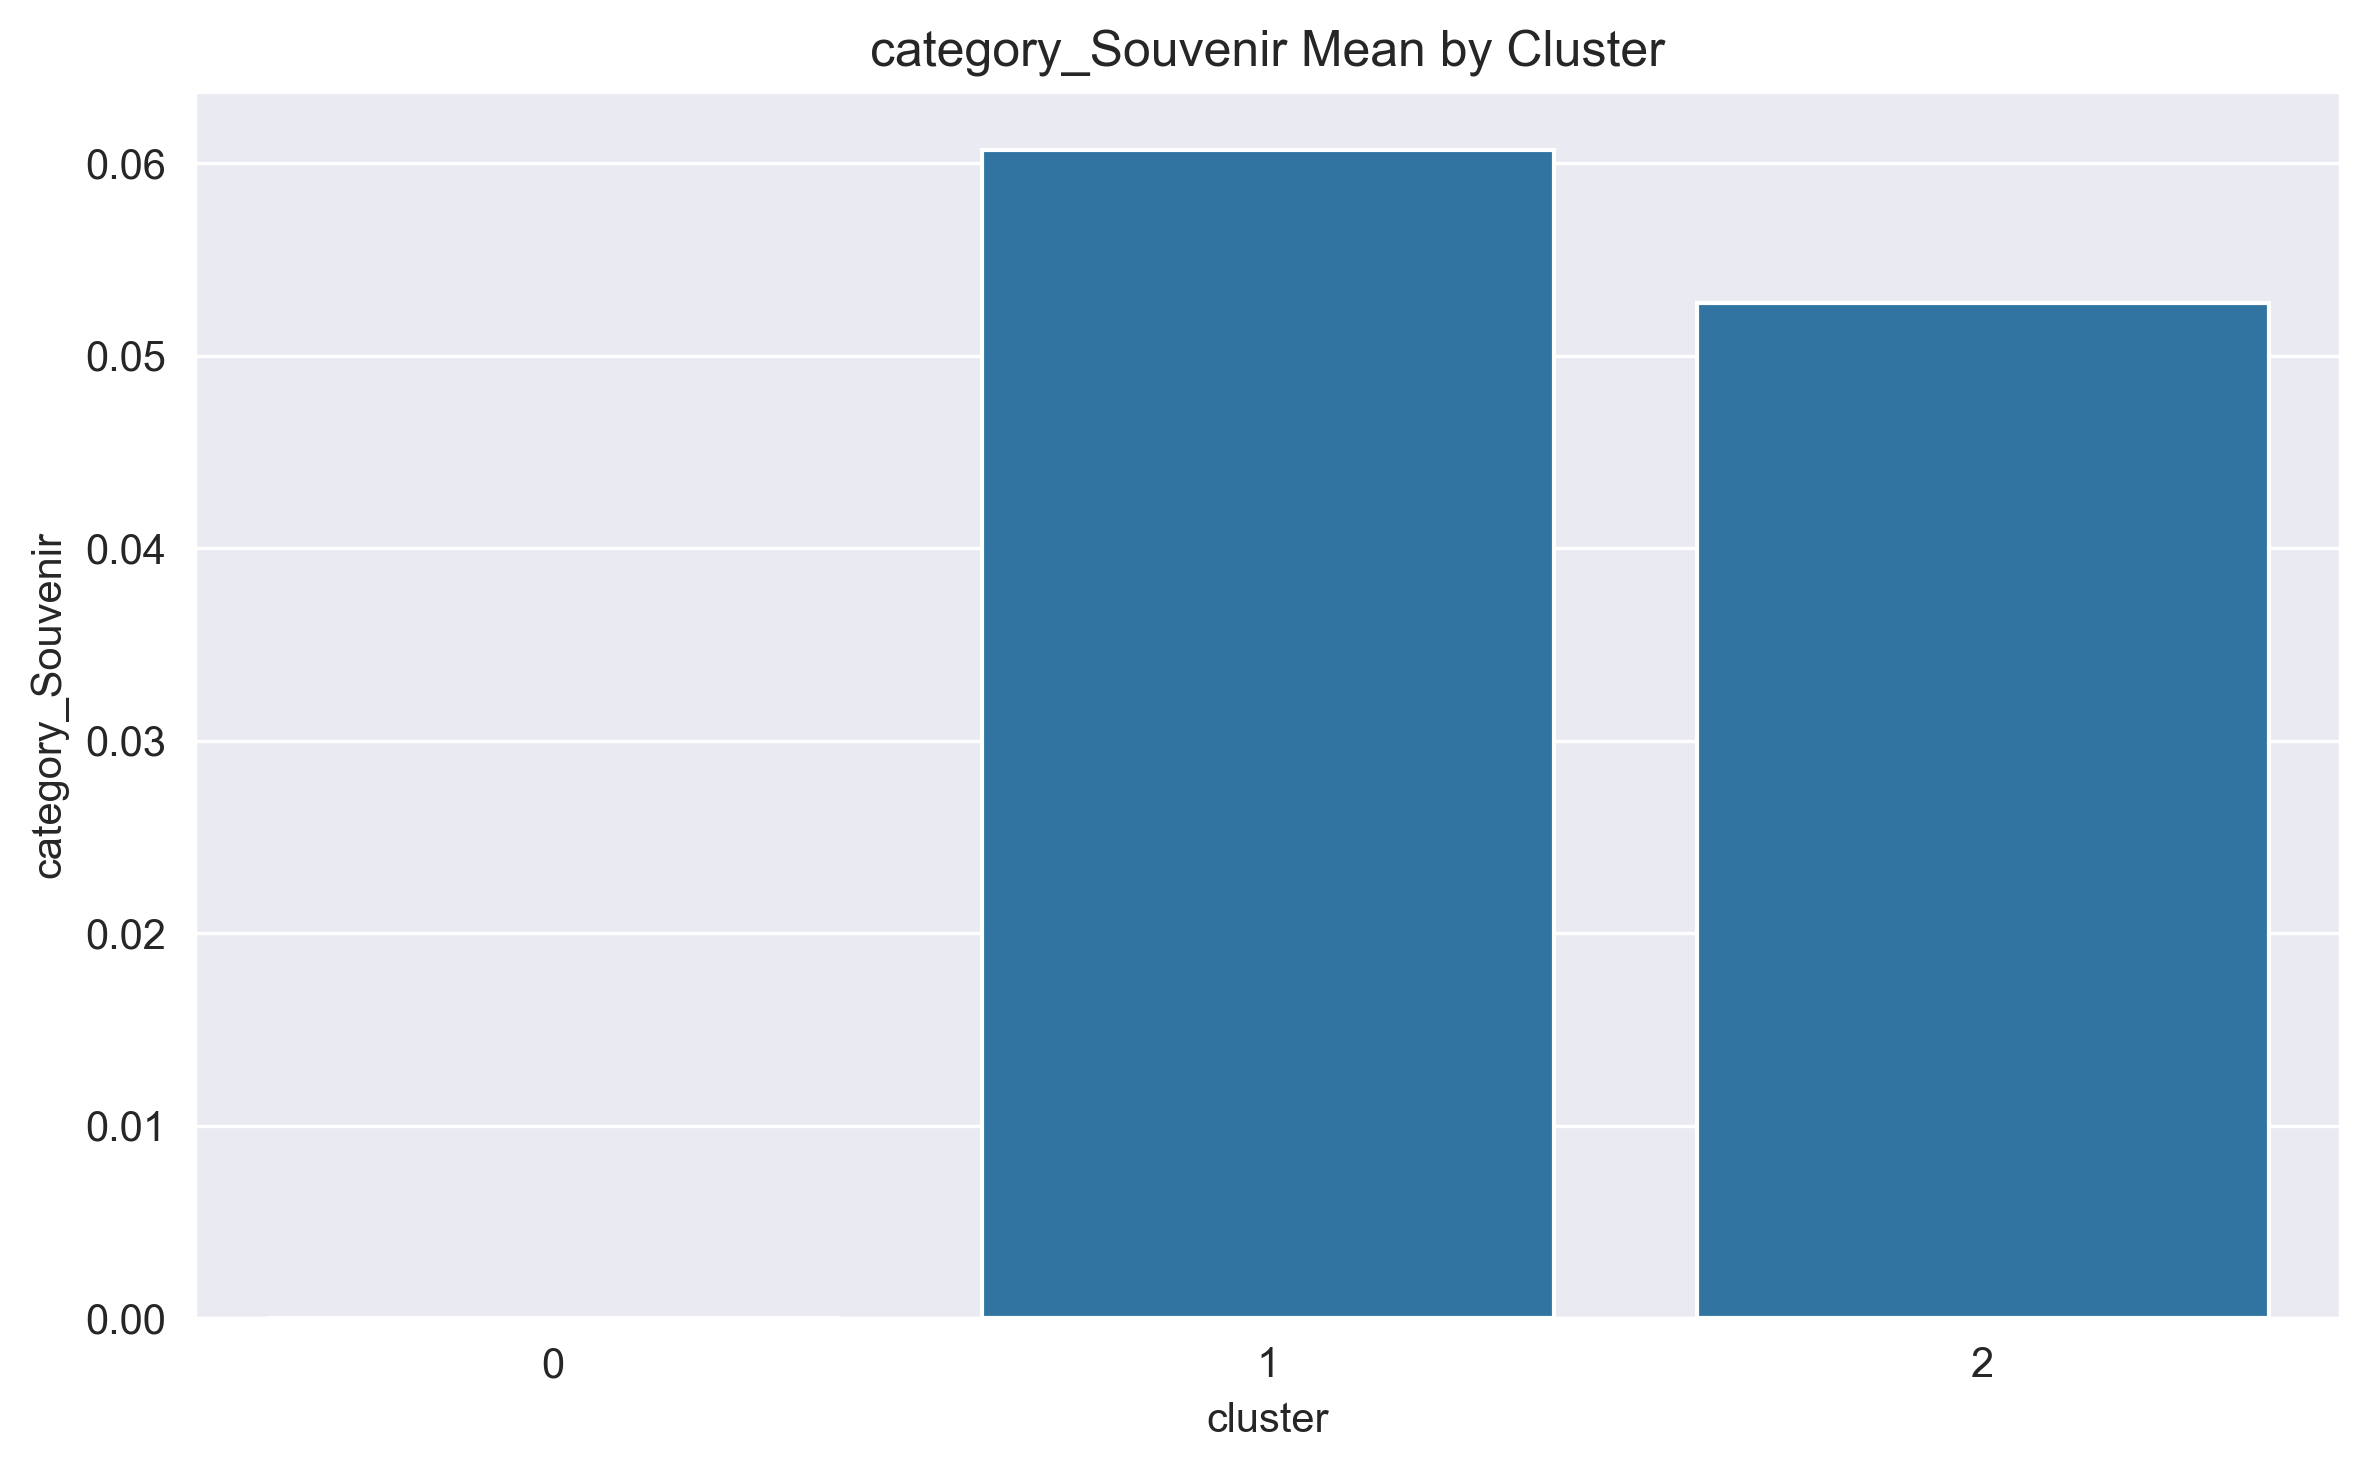

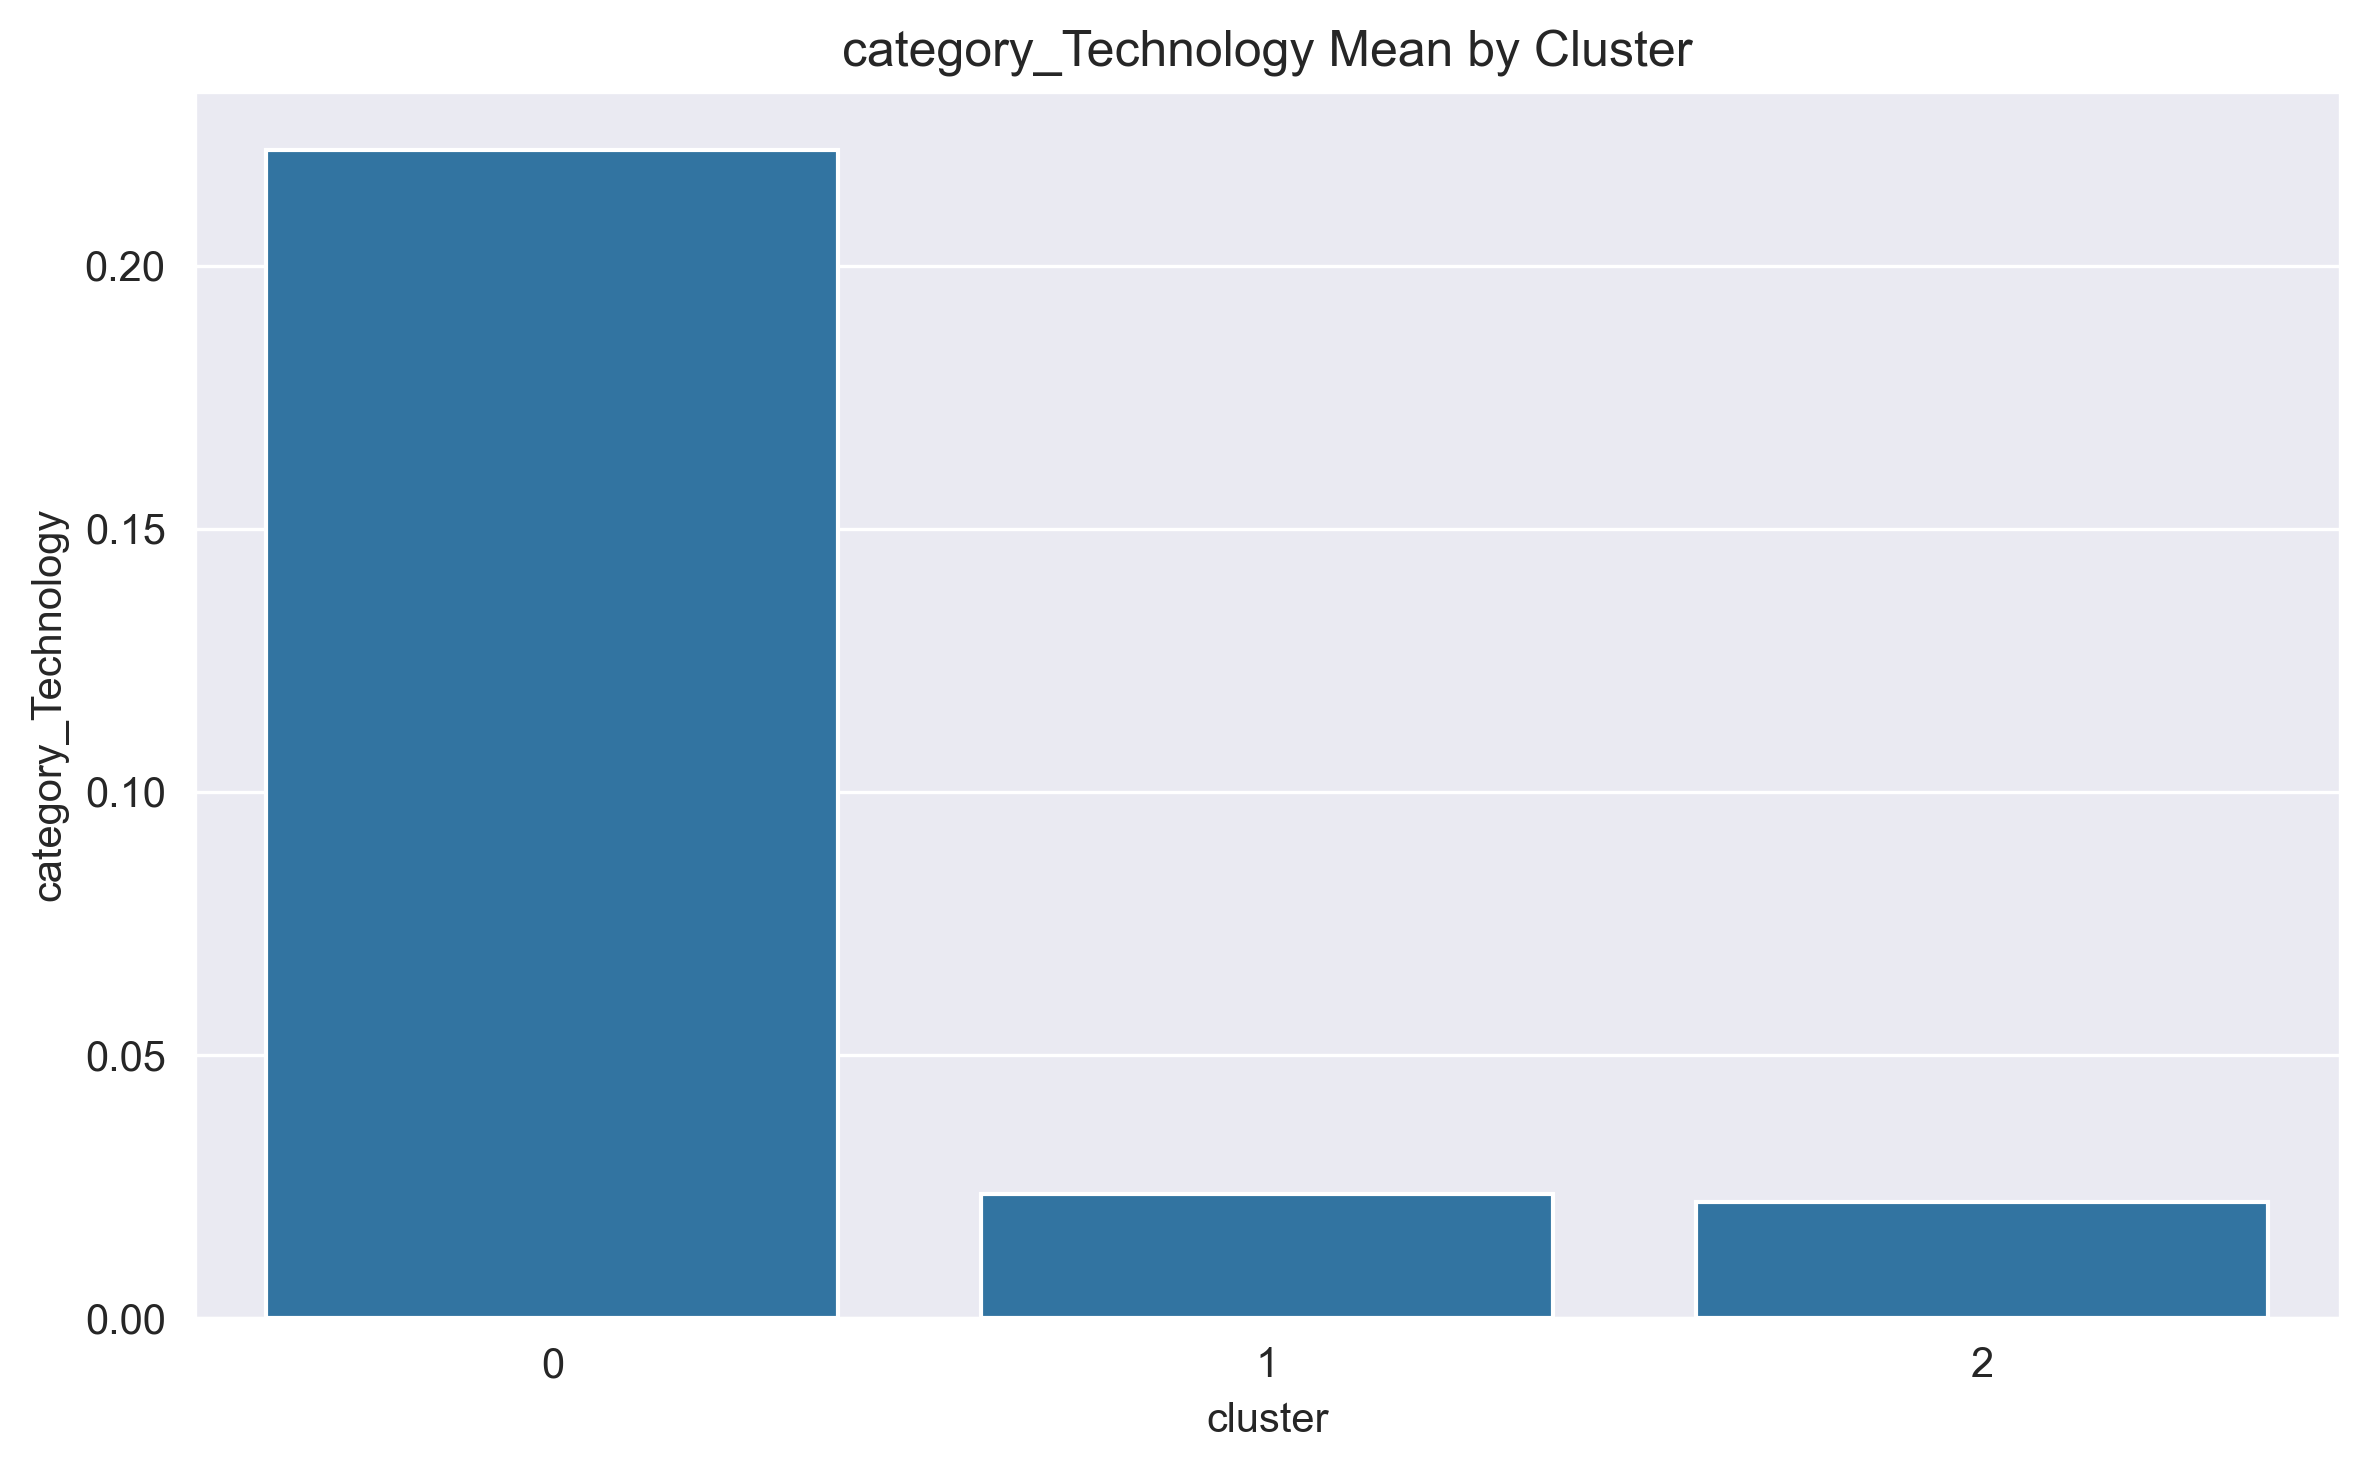

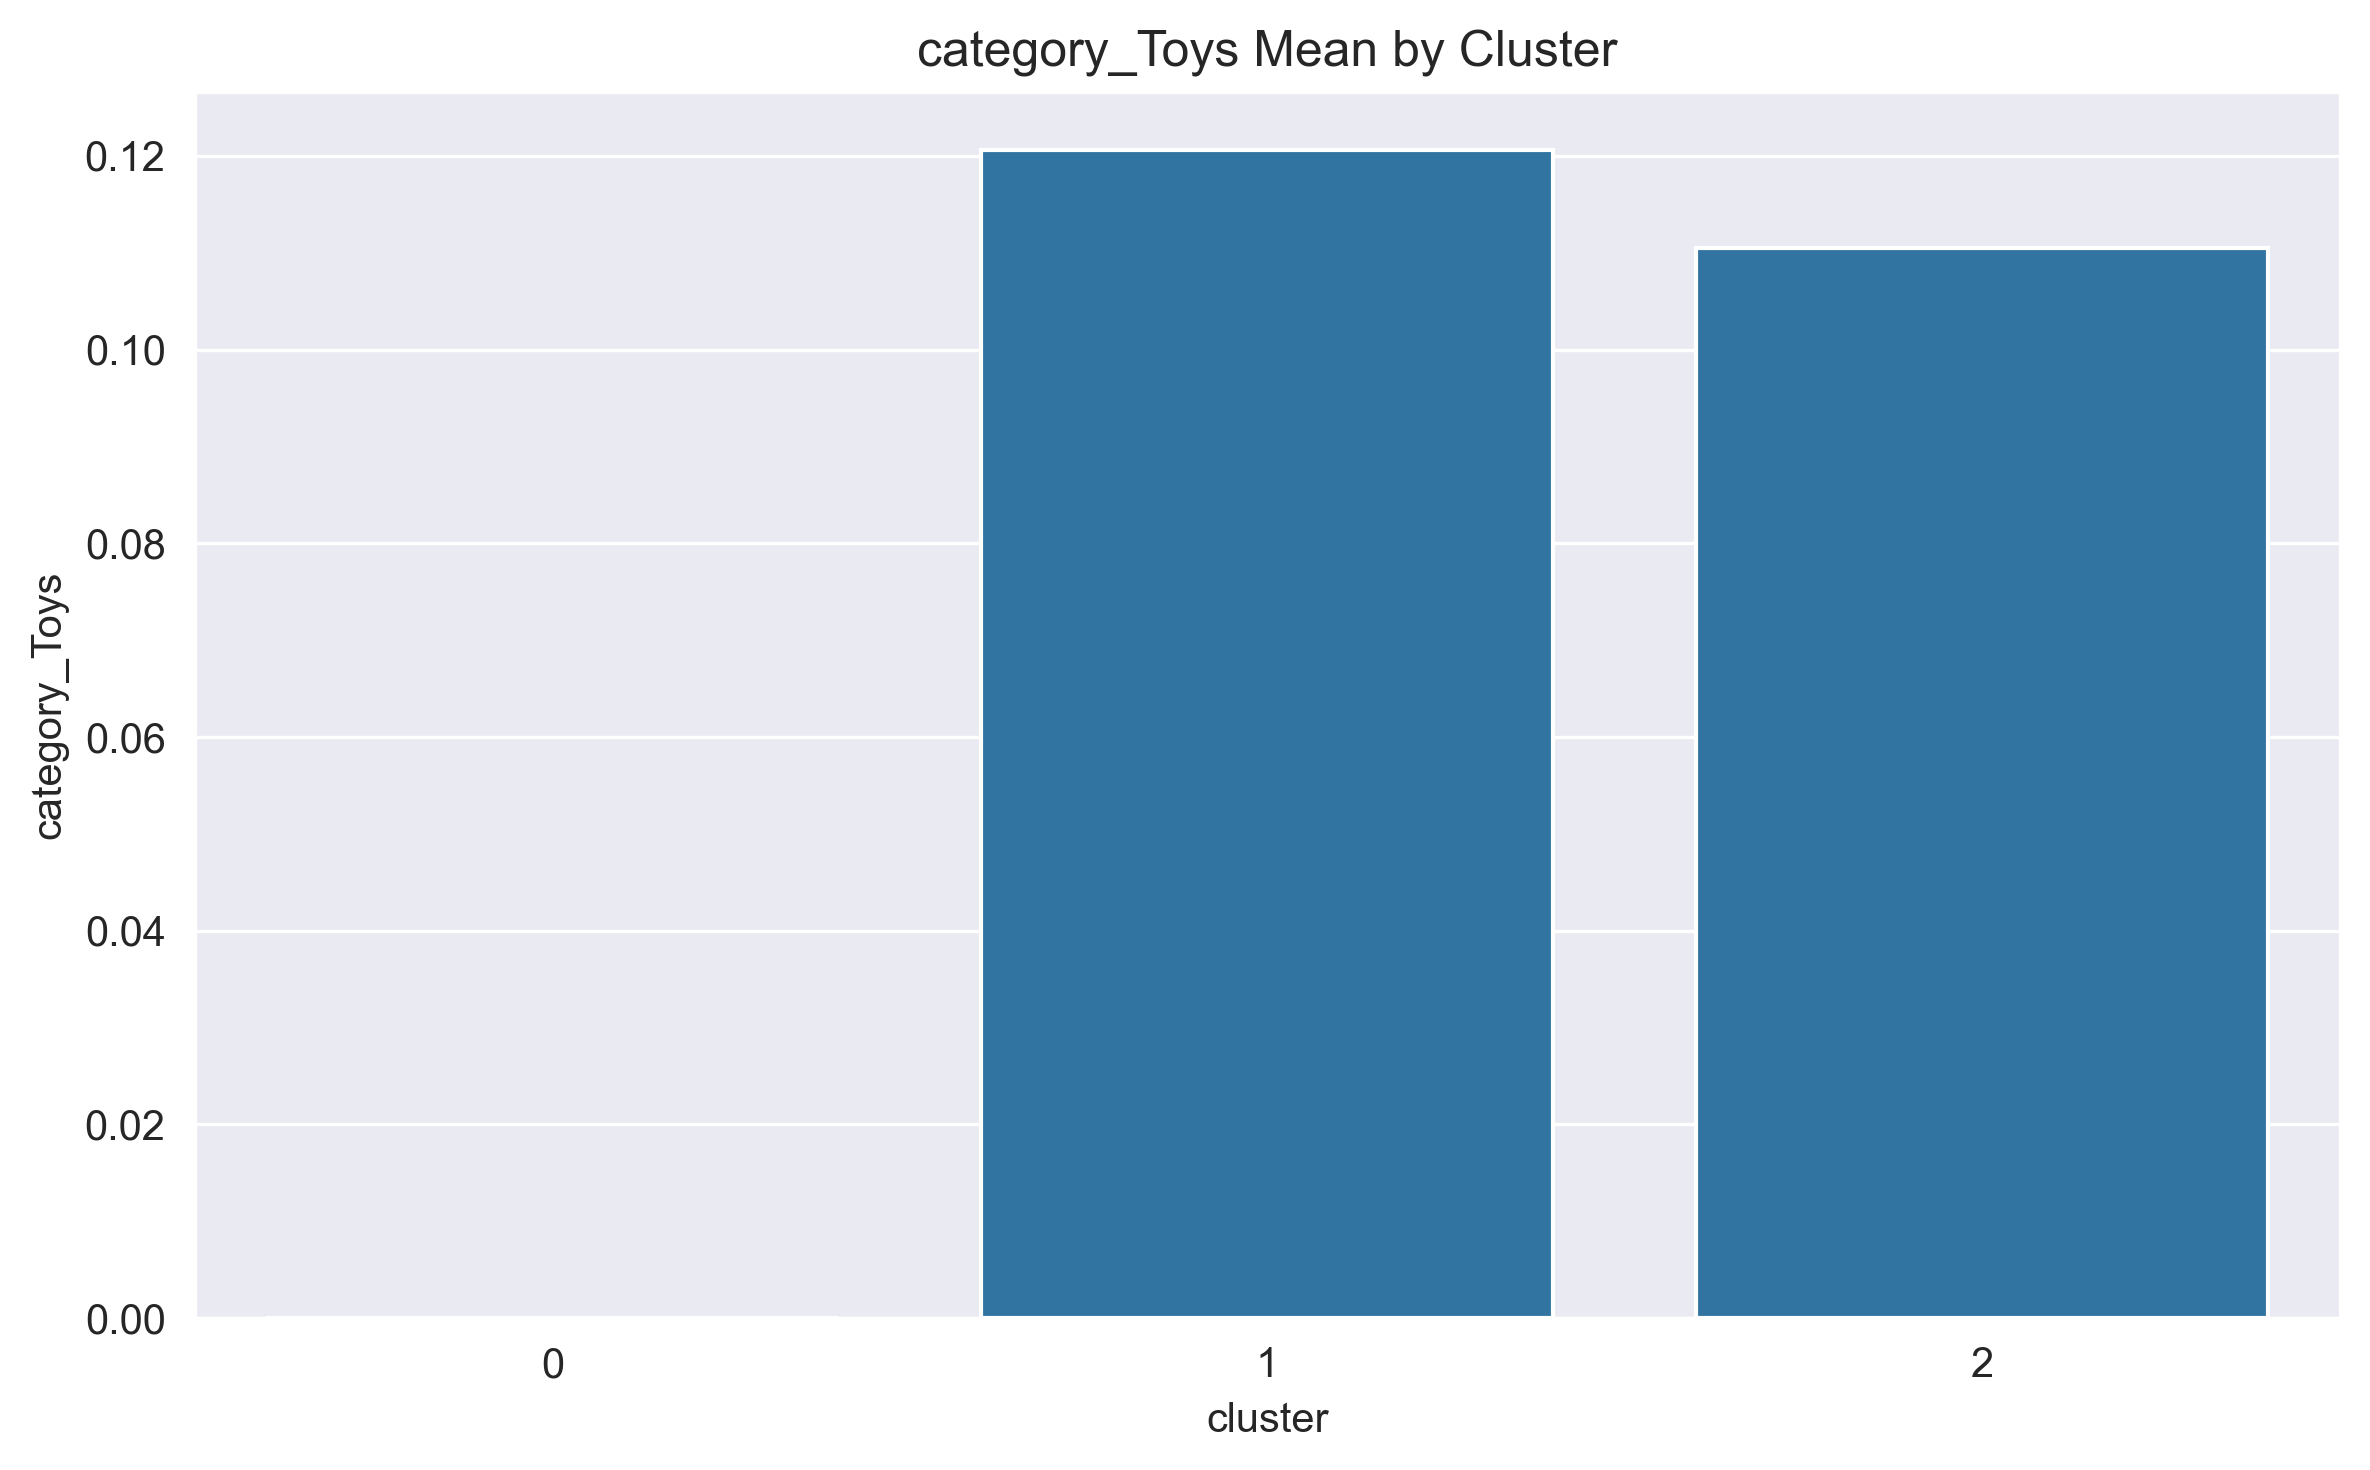

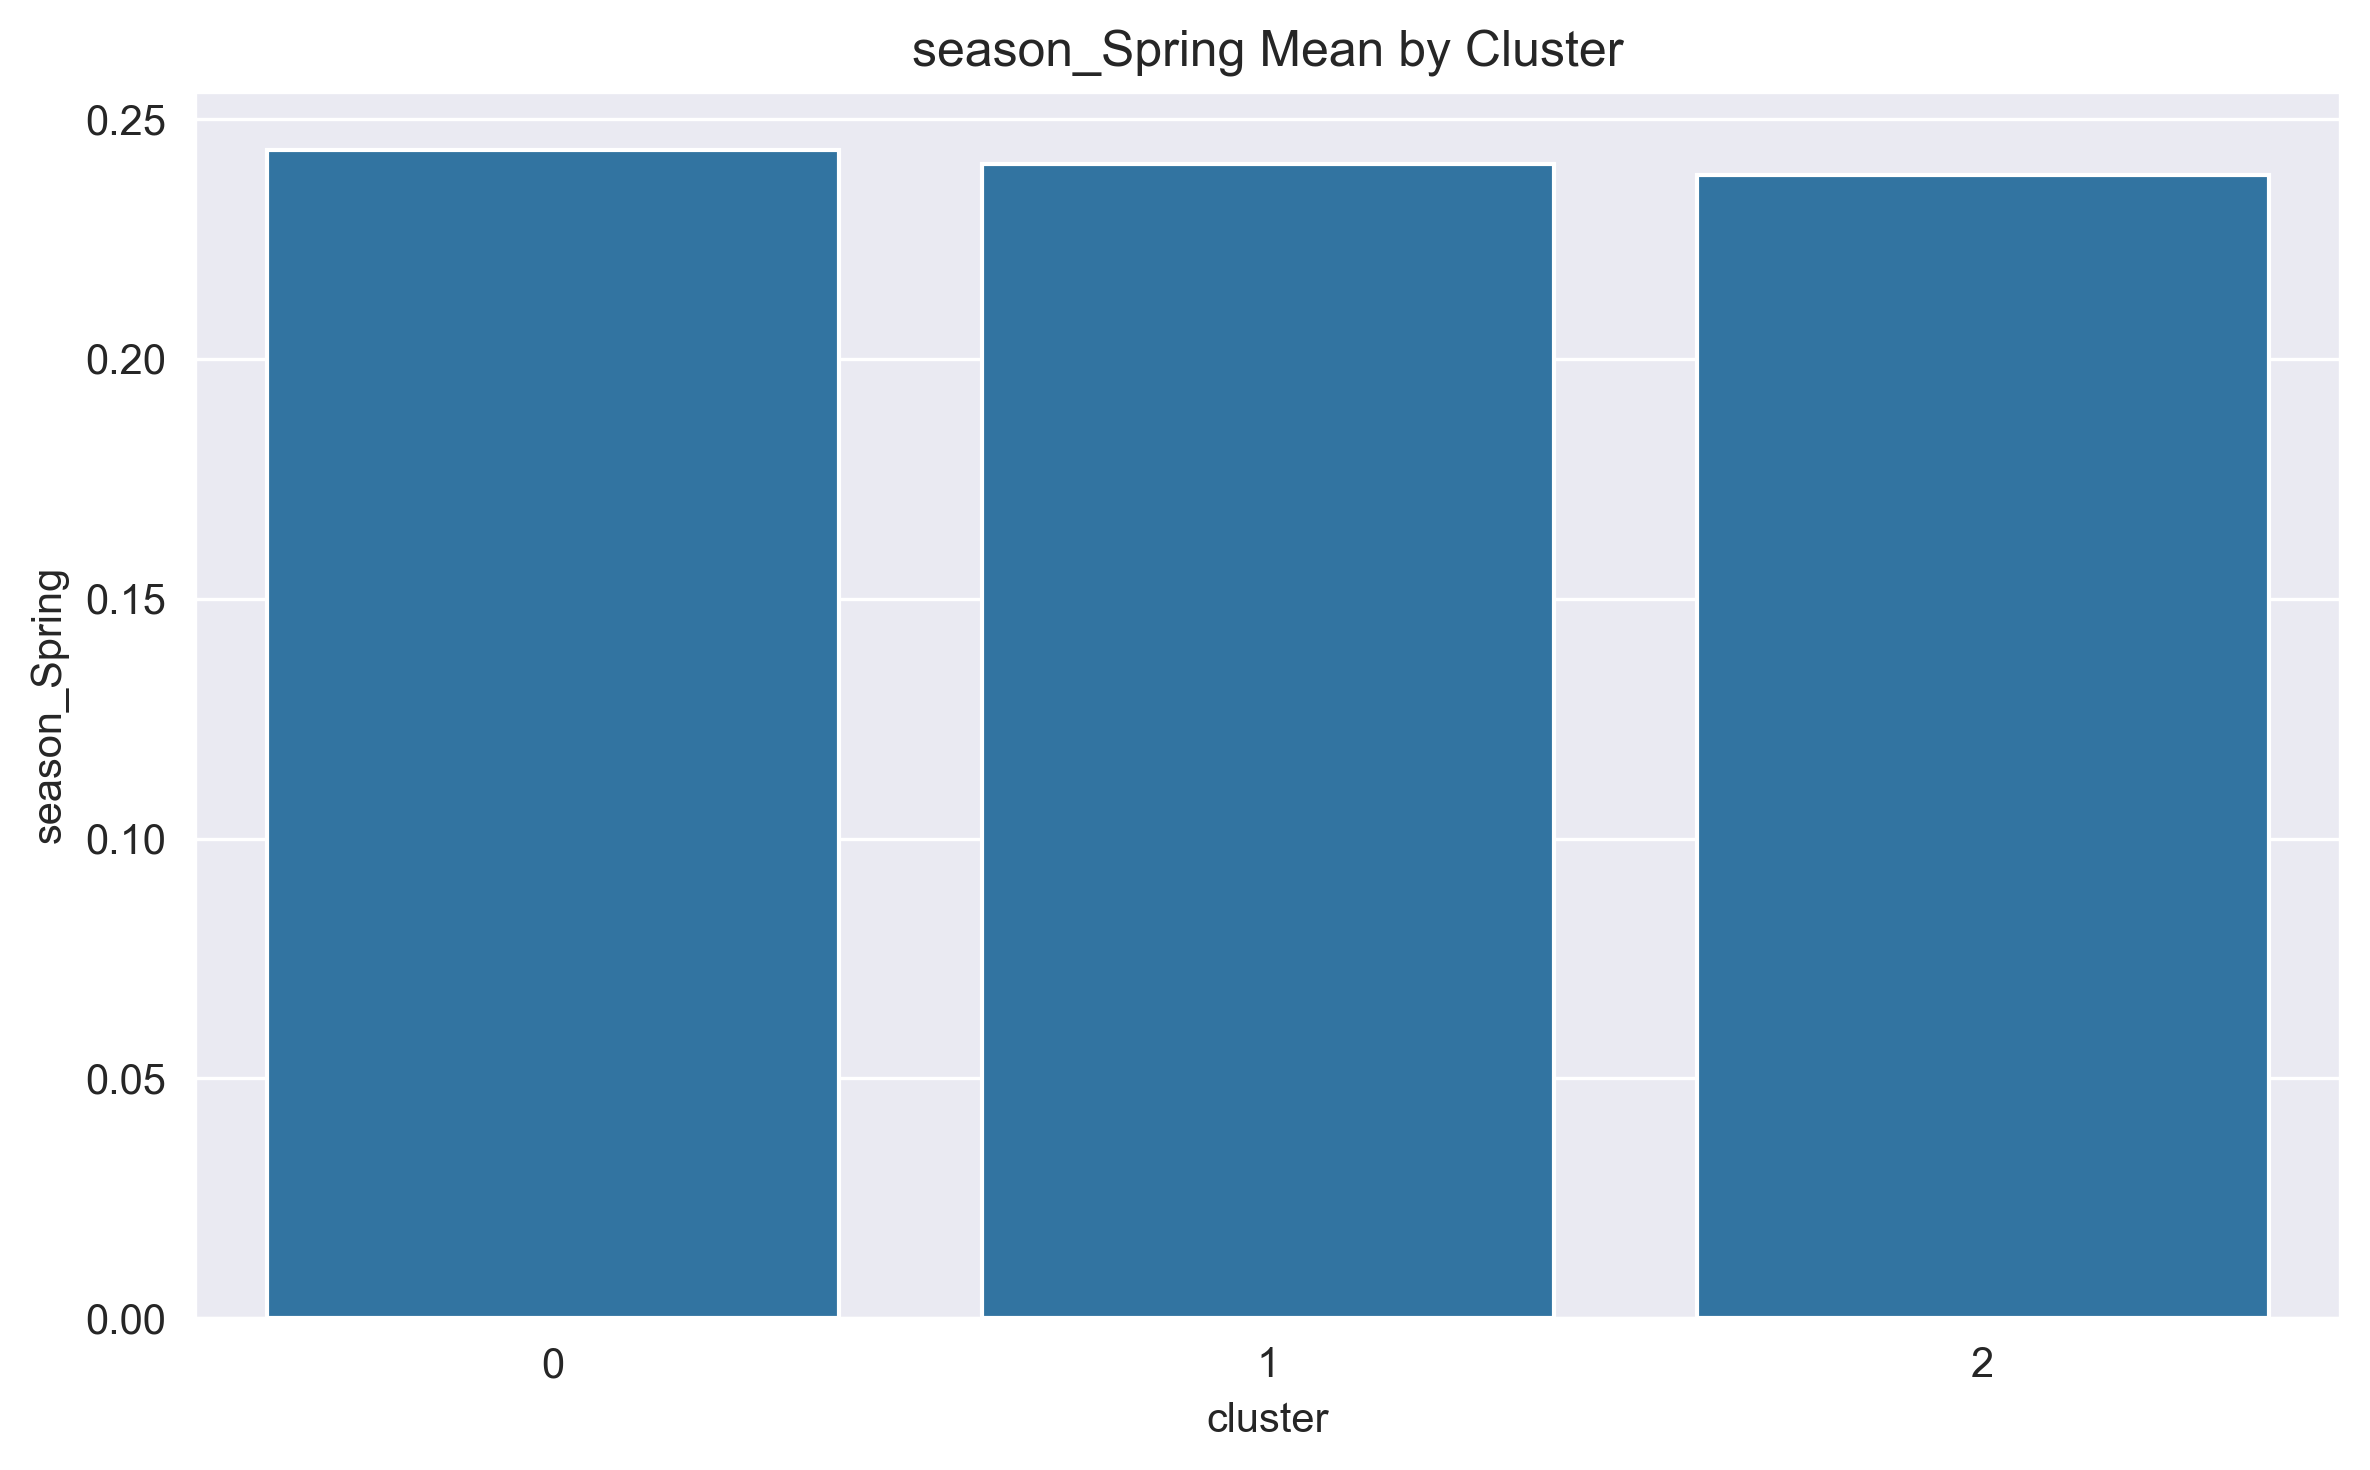

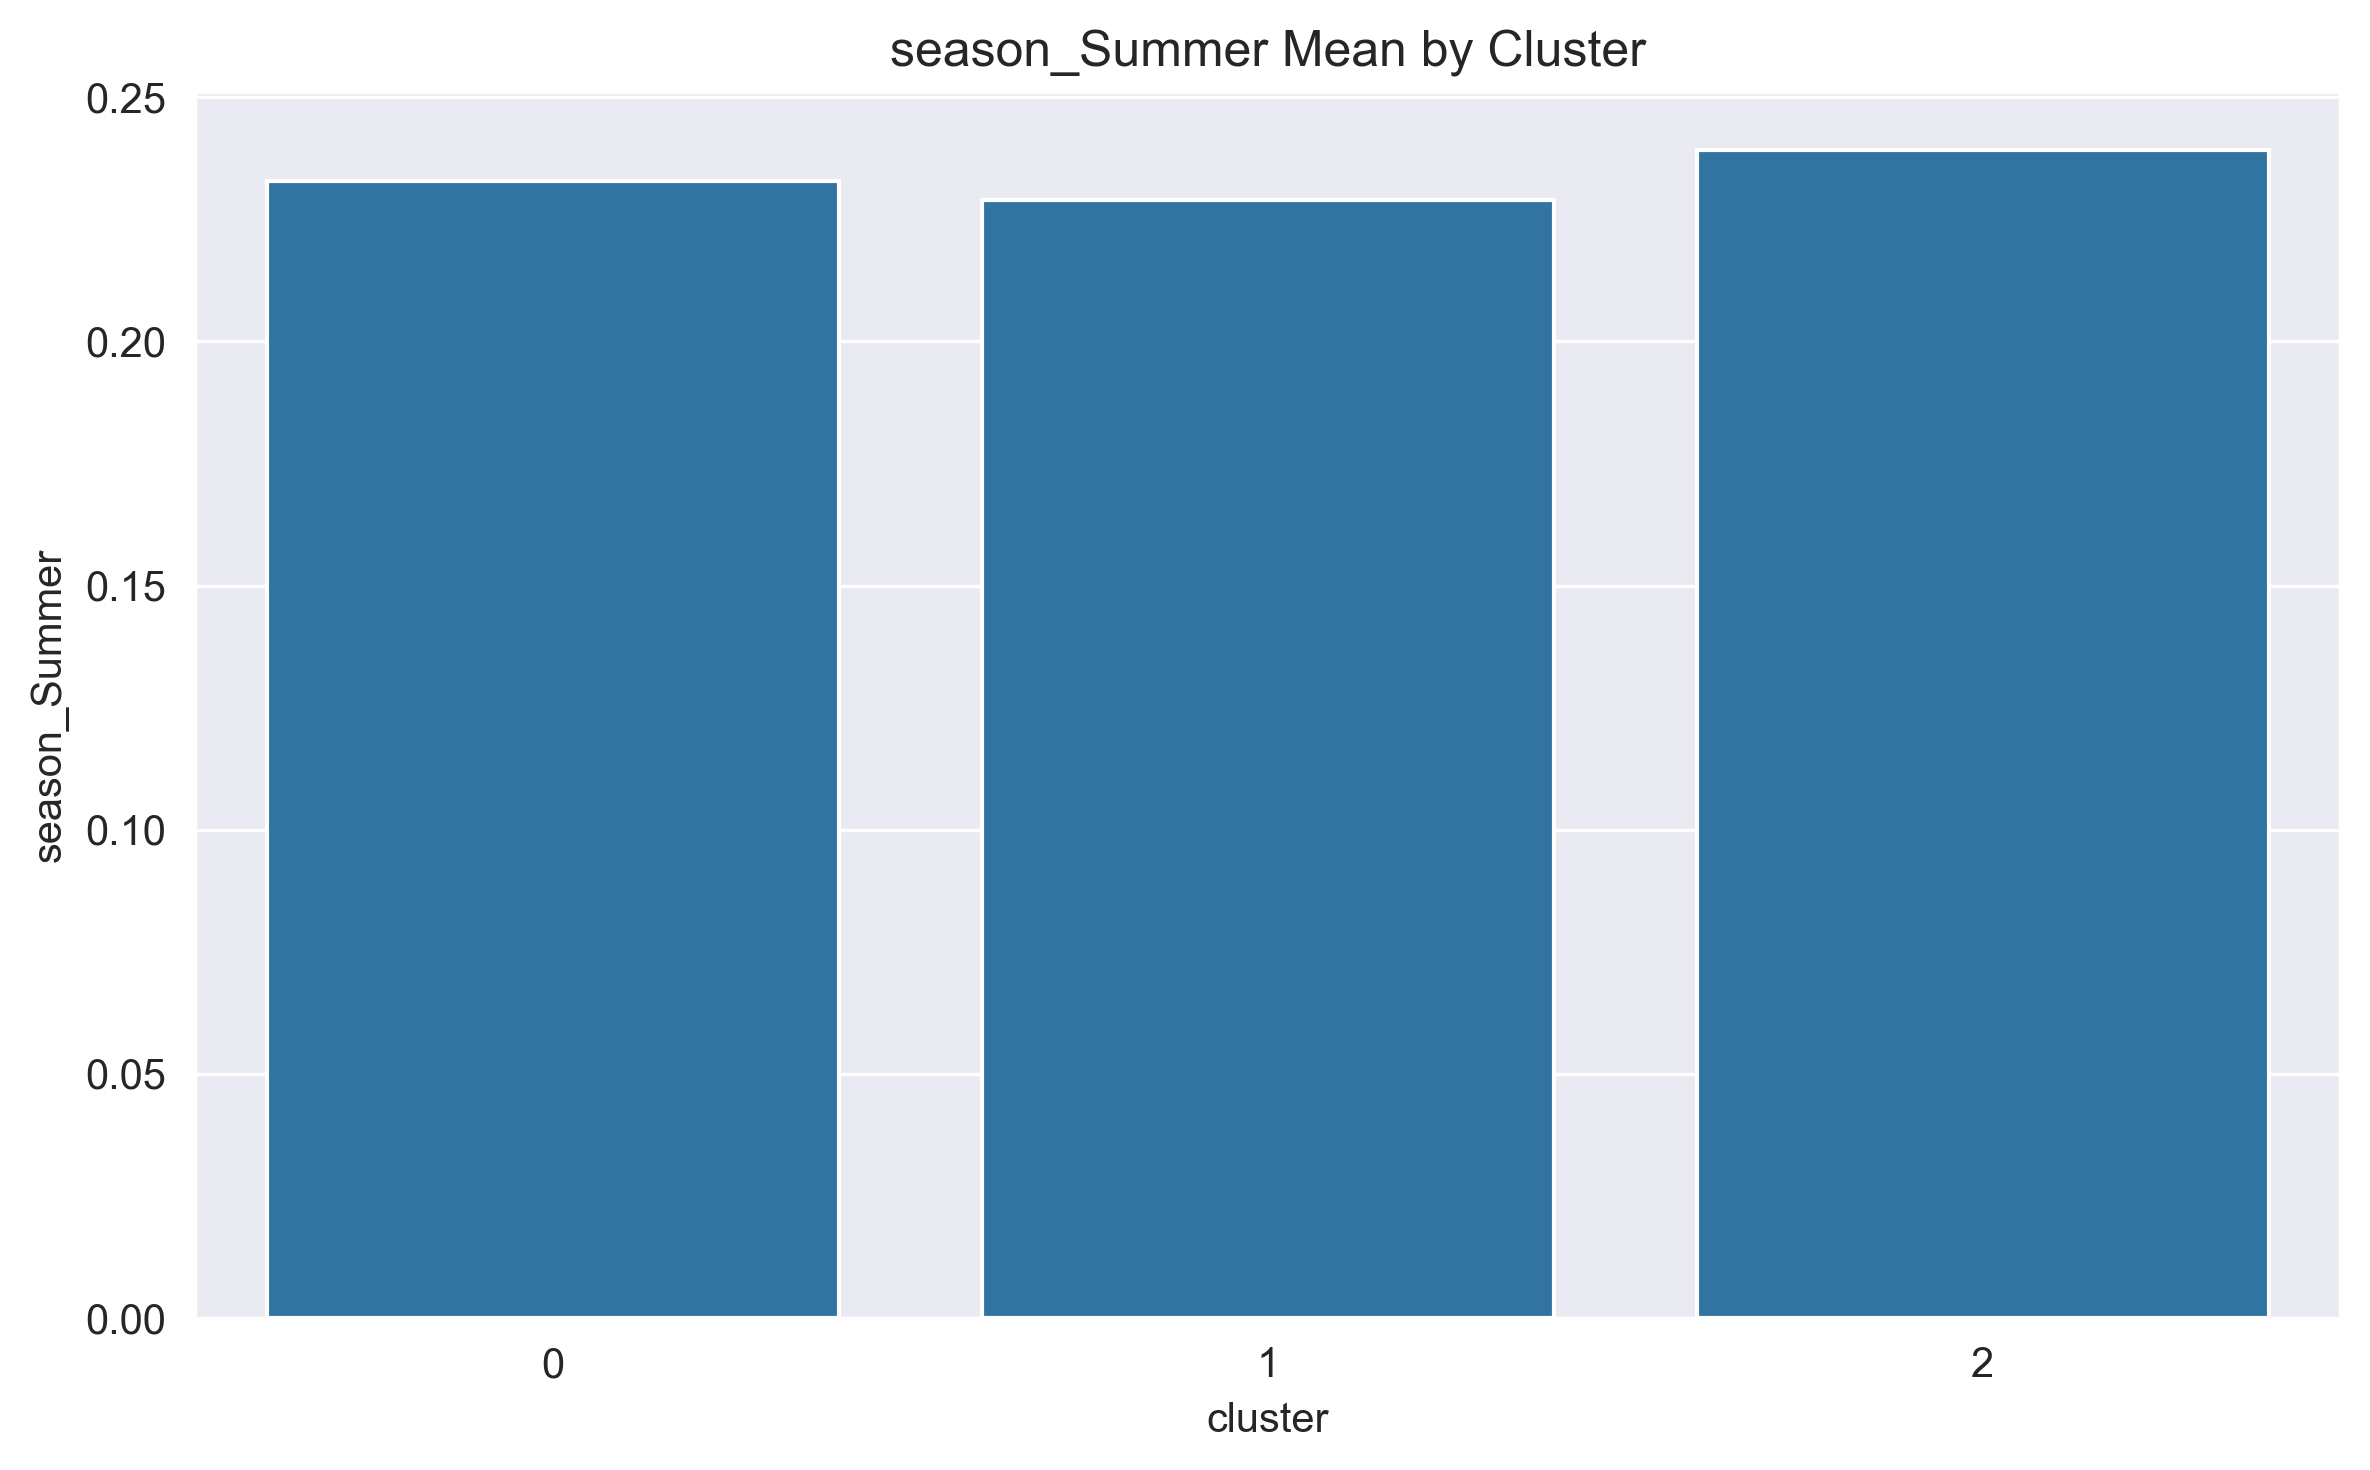

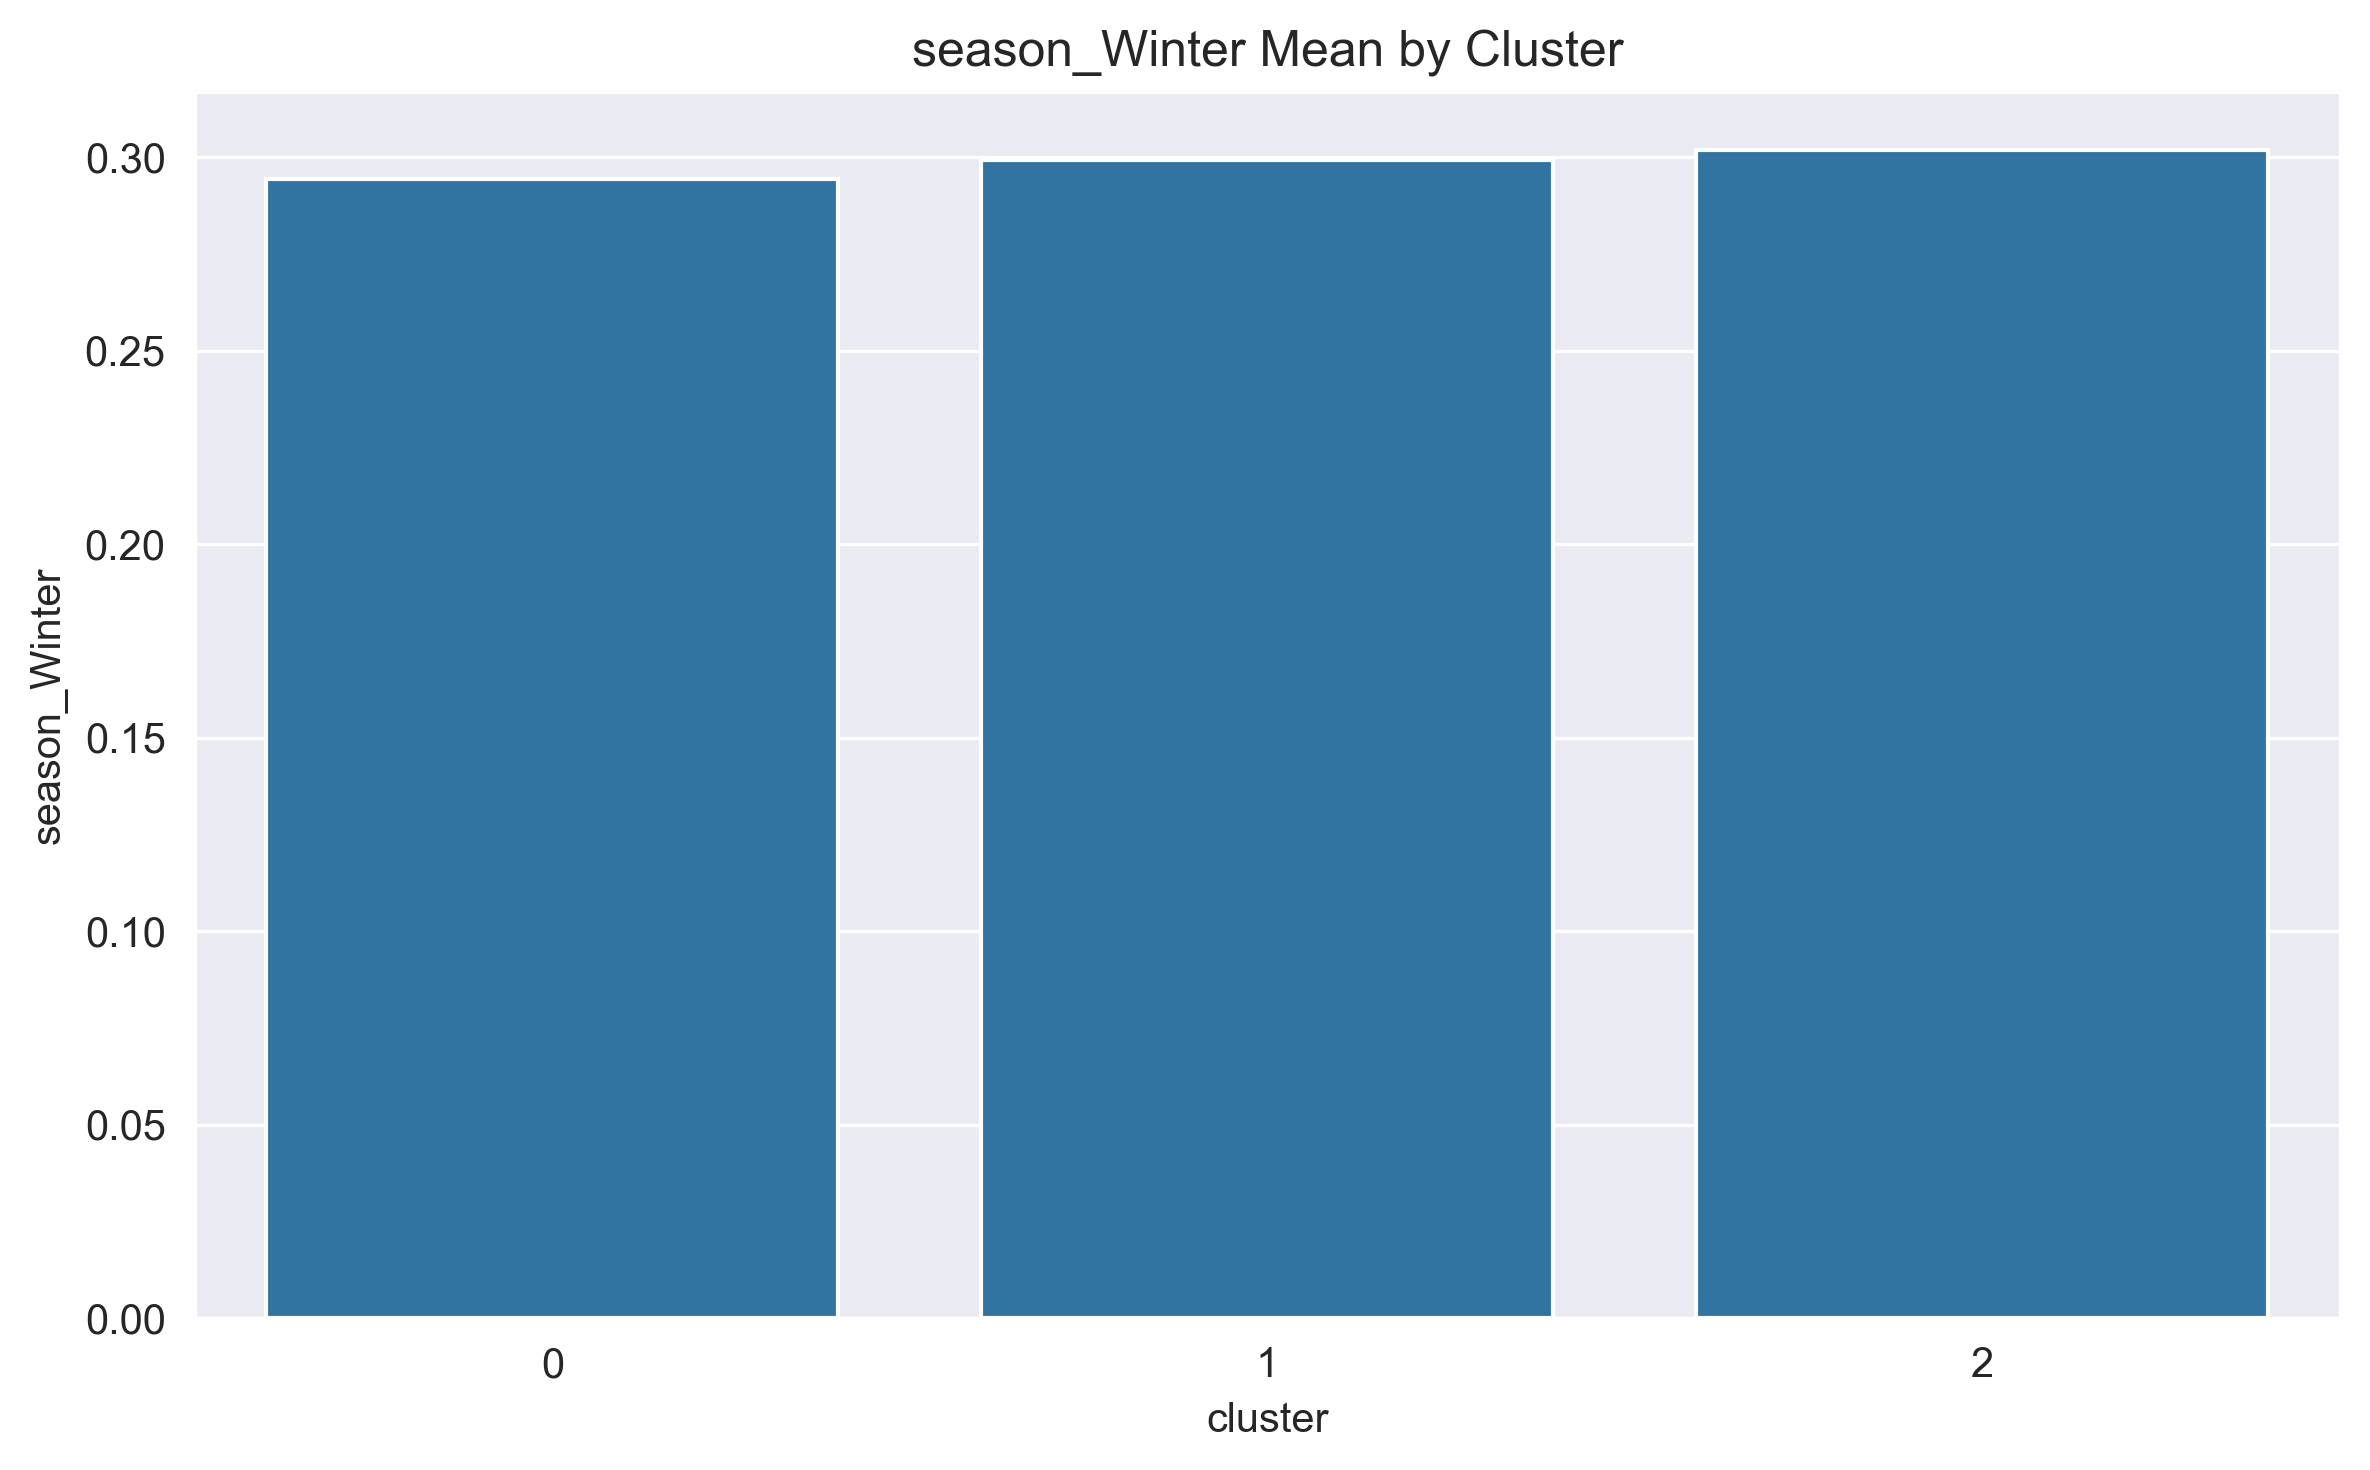

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load the dataset
df = pd.read_csv("../datasets/customer_shopping_data_v23.csv")

# Drop non-numeric columns if any
df = df.select_dtypes(include=["number"])

# Define feature groups
continuous_features = [col for col in df.columns if col != "cluster" and df[col].nunique() > 10]
binary_features = [col for col in df.columns if col != "cluster" and 1 < df[col].nunique() <= 5]

# Create directories
kde_dir = "dataset_clustering_figures/feature_distributions/kde"
bar_dir = "dataset_clustering_figures/feature_distributions/bar"
os.makedirs(kde_dir, exist_ok=True)
os.makedirs(bar_dir, exist_ok=True)

# KDE plots for continuous features
for col in continuous_features:
    try:
        plt.figure(figsize=(8, 5), dpi=300)
        sns.kdeplot(data=df, x=col, hue="cluster", fill=True)
        plt.title(f"{col} Distribution by Cluster")
        plt.tight_layout()
        plt.savefig(f"{kde_dir}/{col}_by_cluster.png", dpi=300)
        plt.show()
        plt.close()
    except Exception as e:
        print(f"Skipping {col} (KDE error): {e}")

# Bar plots for binary features
for col in binary_features:
    try:
        plt.figure(figsize=(8, 5), dpi=300)
        sns.barplot(data=df, x="cluster", y=col, errorbar=None)
        plt.title(f"{col} Mean by Cluster")
        plt.tight_layout()
        plt.savefig(f"{bar_dir}/{col}_by_cluster.png", dpi=300)
        plt.show()
        plt.close()
    except Exception as e:
        print(f"Skipping {col} (Barplot error): {e}")
